# External modules

In [2]:
library(tidyverse)

In [3]:
library(scatterplot3d)

In [4]:
library(DataExplorer)

In [5]:
library(DescTools)

In [6]:
options(repr.plot.width=19, repr.plot.height=12)

# Internal modules

In [7]:
path <- ".."

In [8]:
xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))

# Used dataset

In [9]:
source <- "./applications/final_dataset.csv"

In [10]:
data <- xfun::in_dir(dir = path, expr = read.csv(file = source, sep = ","))

In [11]:
str(data)

'data.frame':	22847 obs. of  59 variables:
 $ timestamp             : int  17207386 17241310 17274219 17308103 17343083 17374951 17408808 17440764 17474667 17508571 ...
 $ latitude              : num  48.8 48.8 48.8 48.8 48.8 ...
 $ longitude             : num  2.46 2.46 2.46 2.46 2.46 ...
 $ velocity_latitude     : num  NA -4.91e-11 -3.82e-11 -3.73e-11 -4.86e-11 ...
 $ velocity_longitude    : num  NA 9.48e-12 7.09e-12 6.72e-12 8.41e-12 ...
 $ velocity              : num  NA 5.00e-11 3.89e-11 3.79e-11 4.93e-11 ...
 $ lateral_error         : num  -0.589 -0.571 -0.566 -0.56 -0.592 ...
 $ longitudinal_error    : num  0.0639 0.0775 0.0832 0.0979 0.1043 ...
 $ haversine_error       : num  0.592 0.576 0.572 0.569 0.6 ...
 $ latitude_error        : num  4.91e-06 4.77e-06 4.73e-06 5.57e-06 4.96e-06 ...
 $ longitude_error       : num  -1.22e-07 1.33e-07 2.49e-07 3.92e-07 5.62e-07 ...
 $ heading_error         : num  1.94 1.95 1.97 2.15 2.08 ...
 $ lateral_error_abs     : num  0.589 0.571 0.566 0

# Outlier detection

In [13]:
coefficient_iqr <- 3
method <- c("interpolate", "mode", "median", "mean")[1]

## lateral_error

In [14]:
data_lateral_error_object <- impute_outliers(x = data$lateral_error, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = method)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [15]:
print(names(data_lateral_error_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [17]:
print(data_lateral_error_object$outlier_positions)

  [1]  2344  2345  2346  2347  2348  2349  2350  2351  2352  2353  2354  2355
 [13]  2356  2357  2358  2359  2360  2361  2362  2363  2364  2365  2366  2367
 [25]  2368  2369  2370  2371  2372  2373  2374  2375  2376  2377  2378  2379
 [37]  2380  2381  2382  2383  2384  2385  2386  2387  2388  2389  2390  2391
 [49]  2392  2393  2394  2395  2396  2397  2398  2399  2400  2401  2402  2403
 [61]  2404  2405  2406  2407  2408  2409  2410  2411  2412  2413  2414  2415
 [73]  2416  2417  4811  4812  4813  4814  4815  4816  4817  4818  4819  4820
 [85]  4821  4822  4823  4824  4825  4826  4827  4828  4829  4830  4831  4832
 [97]  4833  4834 13507 16571 16572 16573 16574 16575 16576 16577 16578 16579
[109] 16580 16581 16582 16583 16599 16600 16601 16602 16603 16604 16605 16606
[121] 16607 16608 16609 16610 16611 16612 16613 16614 16615 16616 16617 16618
[133] 16619 16620 16621 16622 16623 16624 16625 16626 16627 16628 16629 16630
[145] 16631 16632 16633 16634 16635 16636 16637 16638 16639 1664

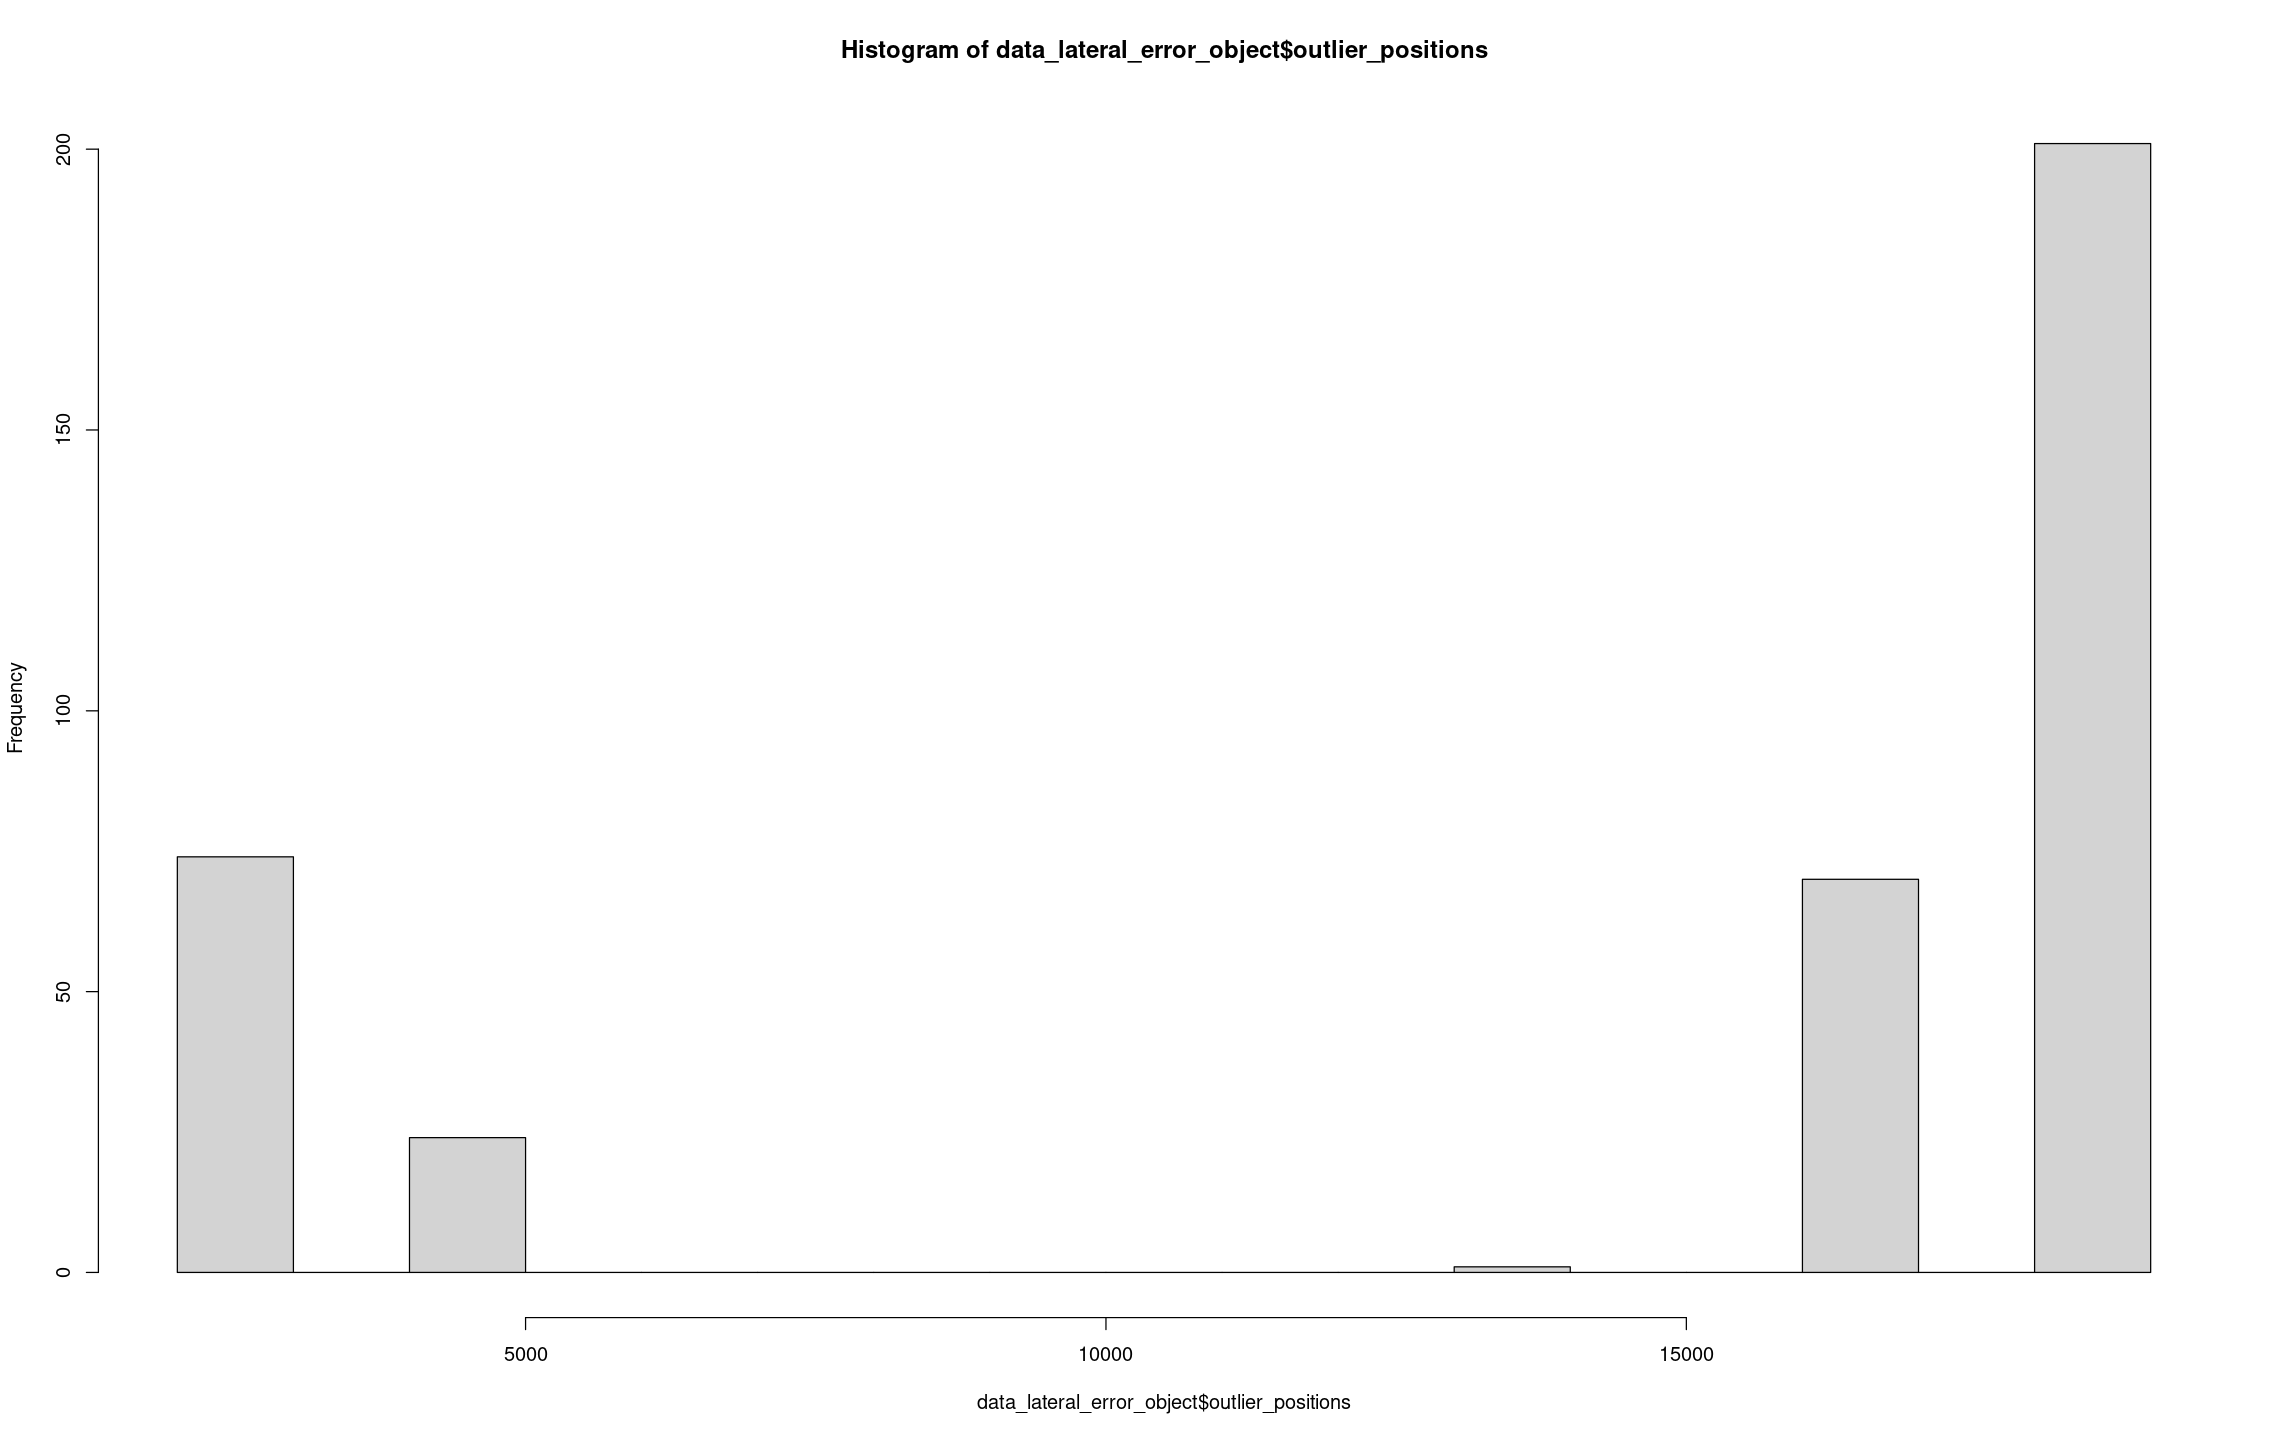

In [18]:
hist(data_lateral_error_object$outlier_positions, nclass = 20)

------------------------------------------------------------------------------ 
data_lateral_error_object$imputed_data (numeric)

       length            n         NAs      unique          0s        mean'
       22'847       22'847           0      22'583           0  0.37736415
                    100.0%        0.0%                    0.0%            
                                                                          
          .05          .10         .25      median         .75         .90
  -0.21281252  -0.13671891  0.09508434  0.30643409  0.62472773  0.93450800
                                                                          
        range           sd       vcoef         mad         IQR        skew
   3.69135046   0.44122243  1.16922189  0.38233638  0.52964339  0.85432101
                                                                          
      meanCI
  0.37164260
  0.38308571
            
         .95
  1.17453871
            
        kurt
  1.58089680
  

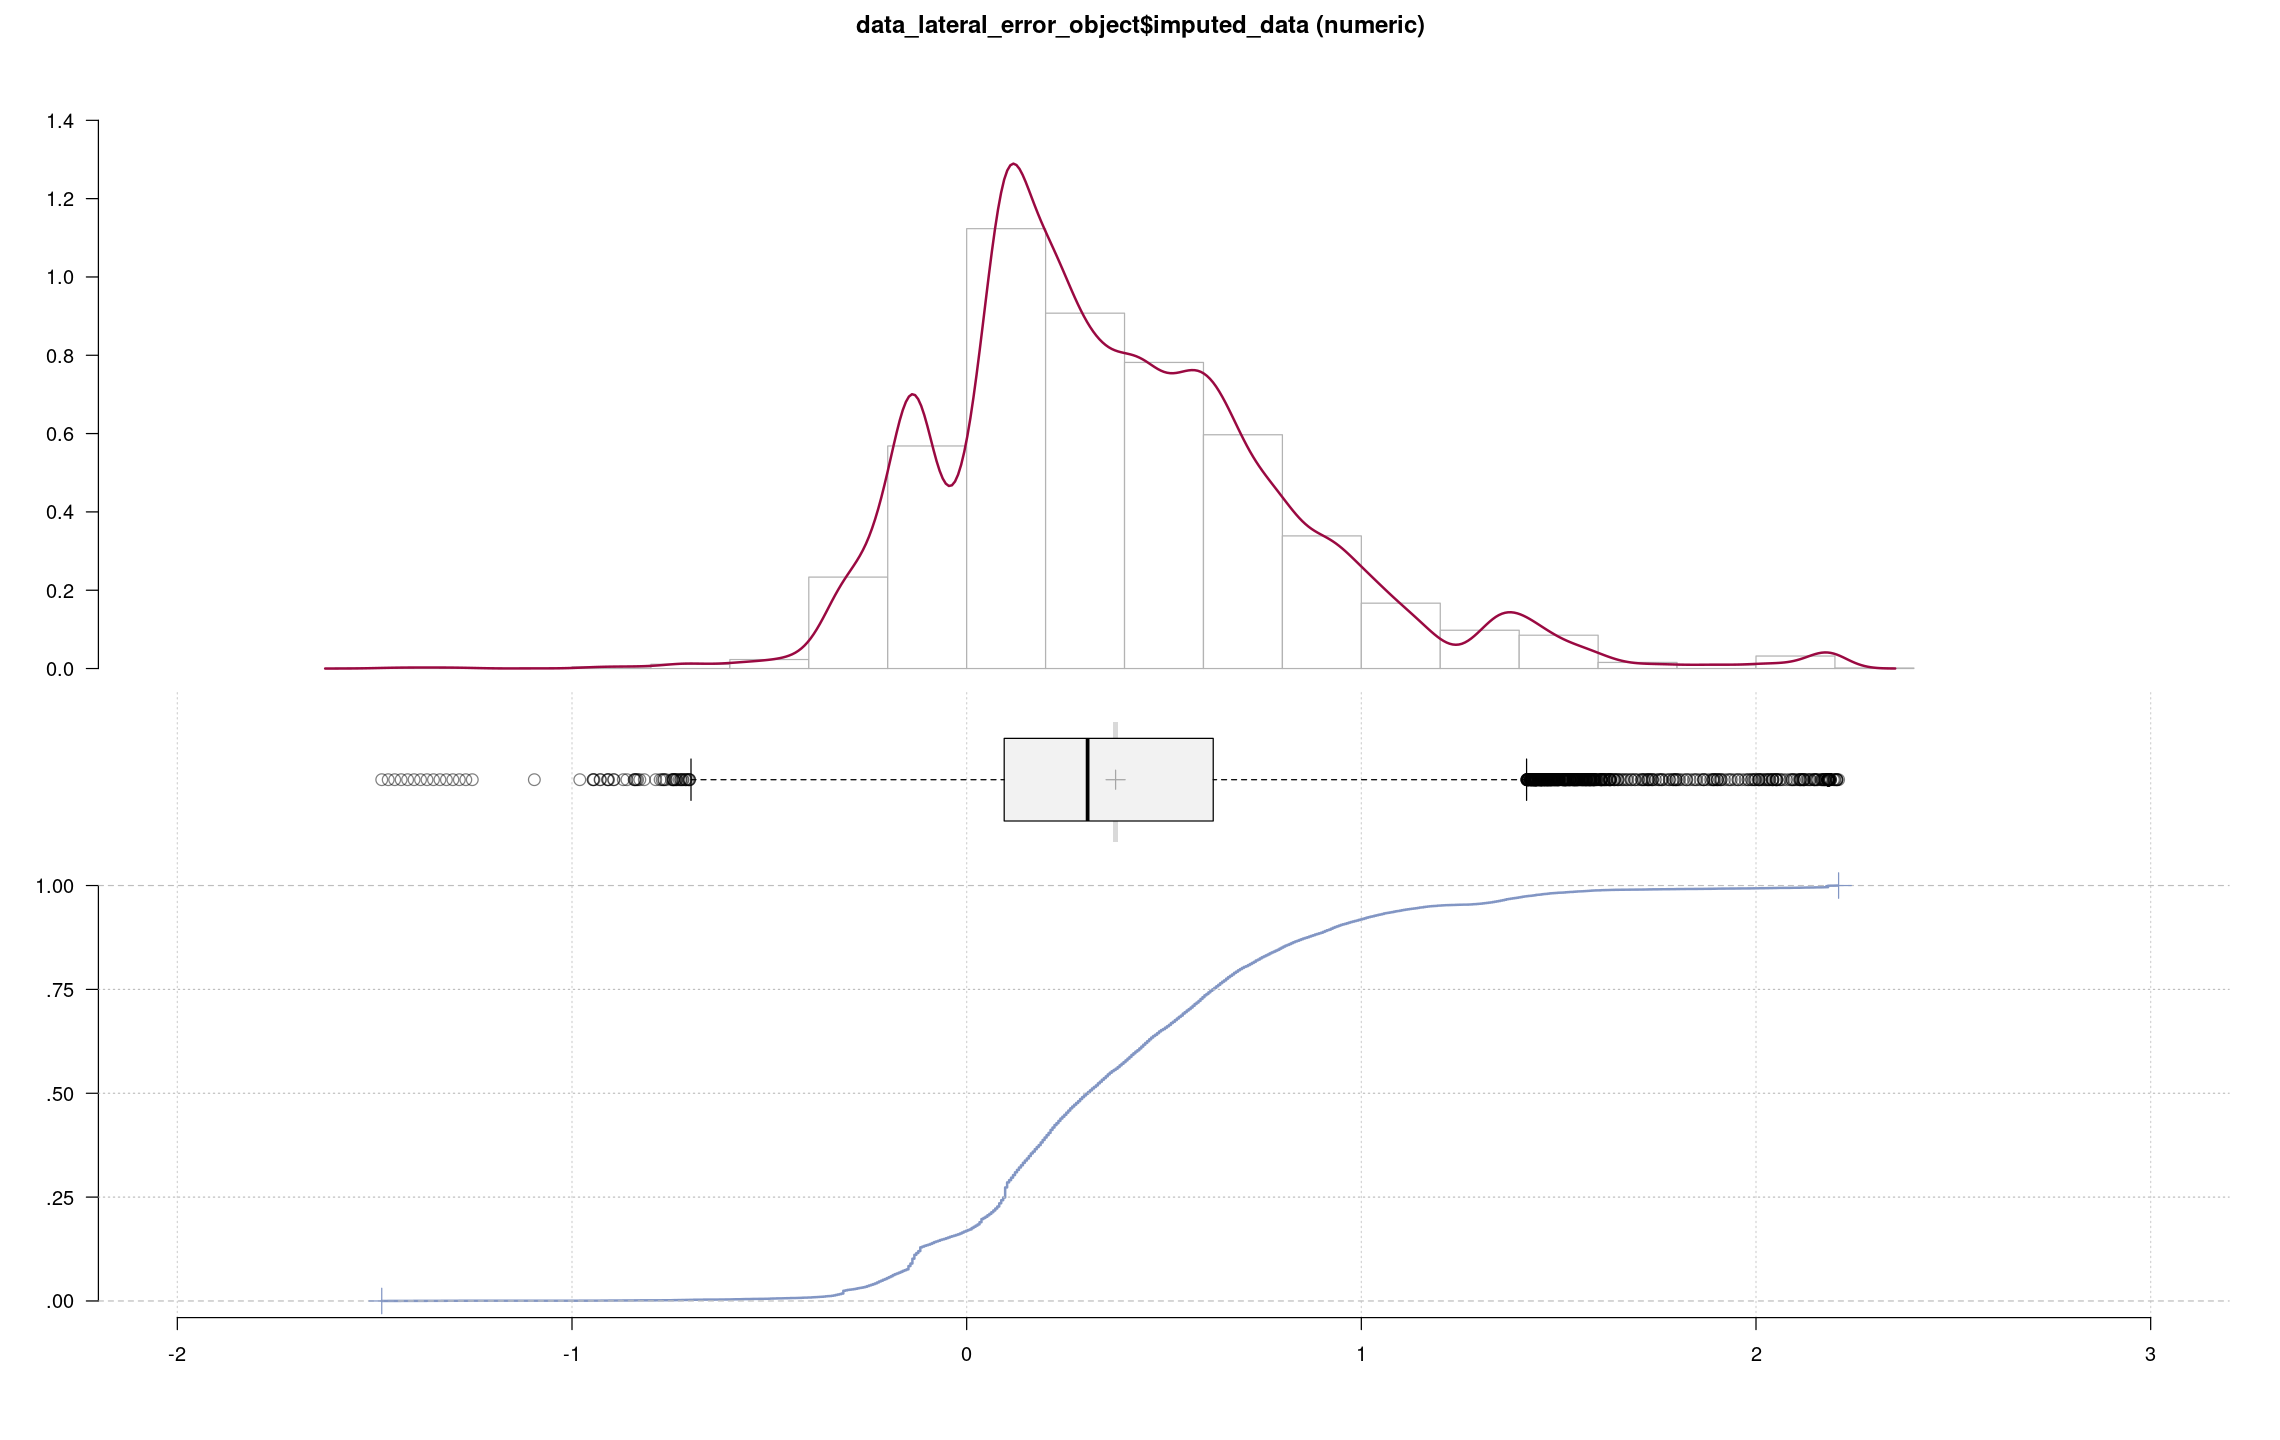

In [16]:
Desc(data_lateral_error_object$imputed_data)

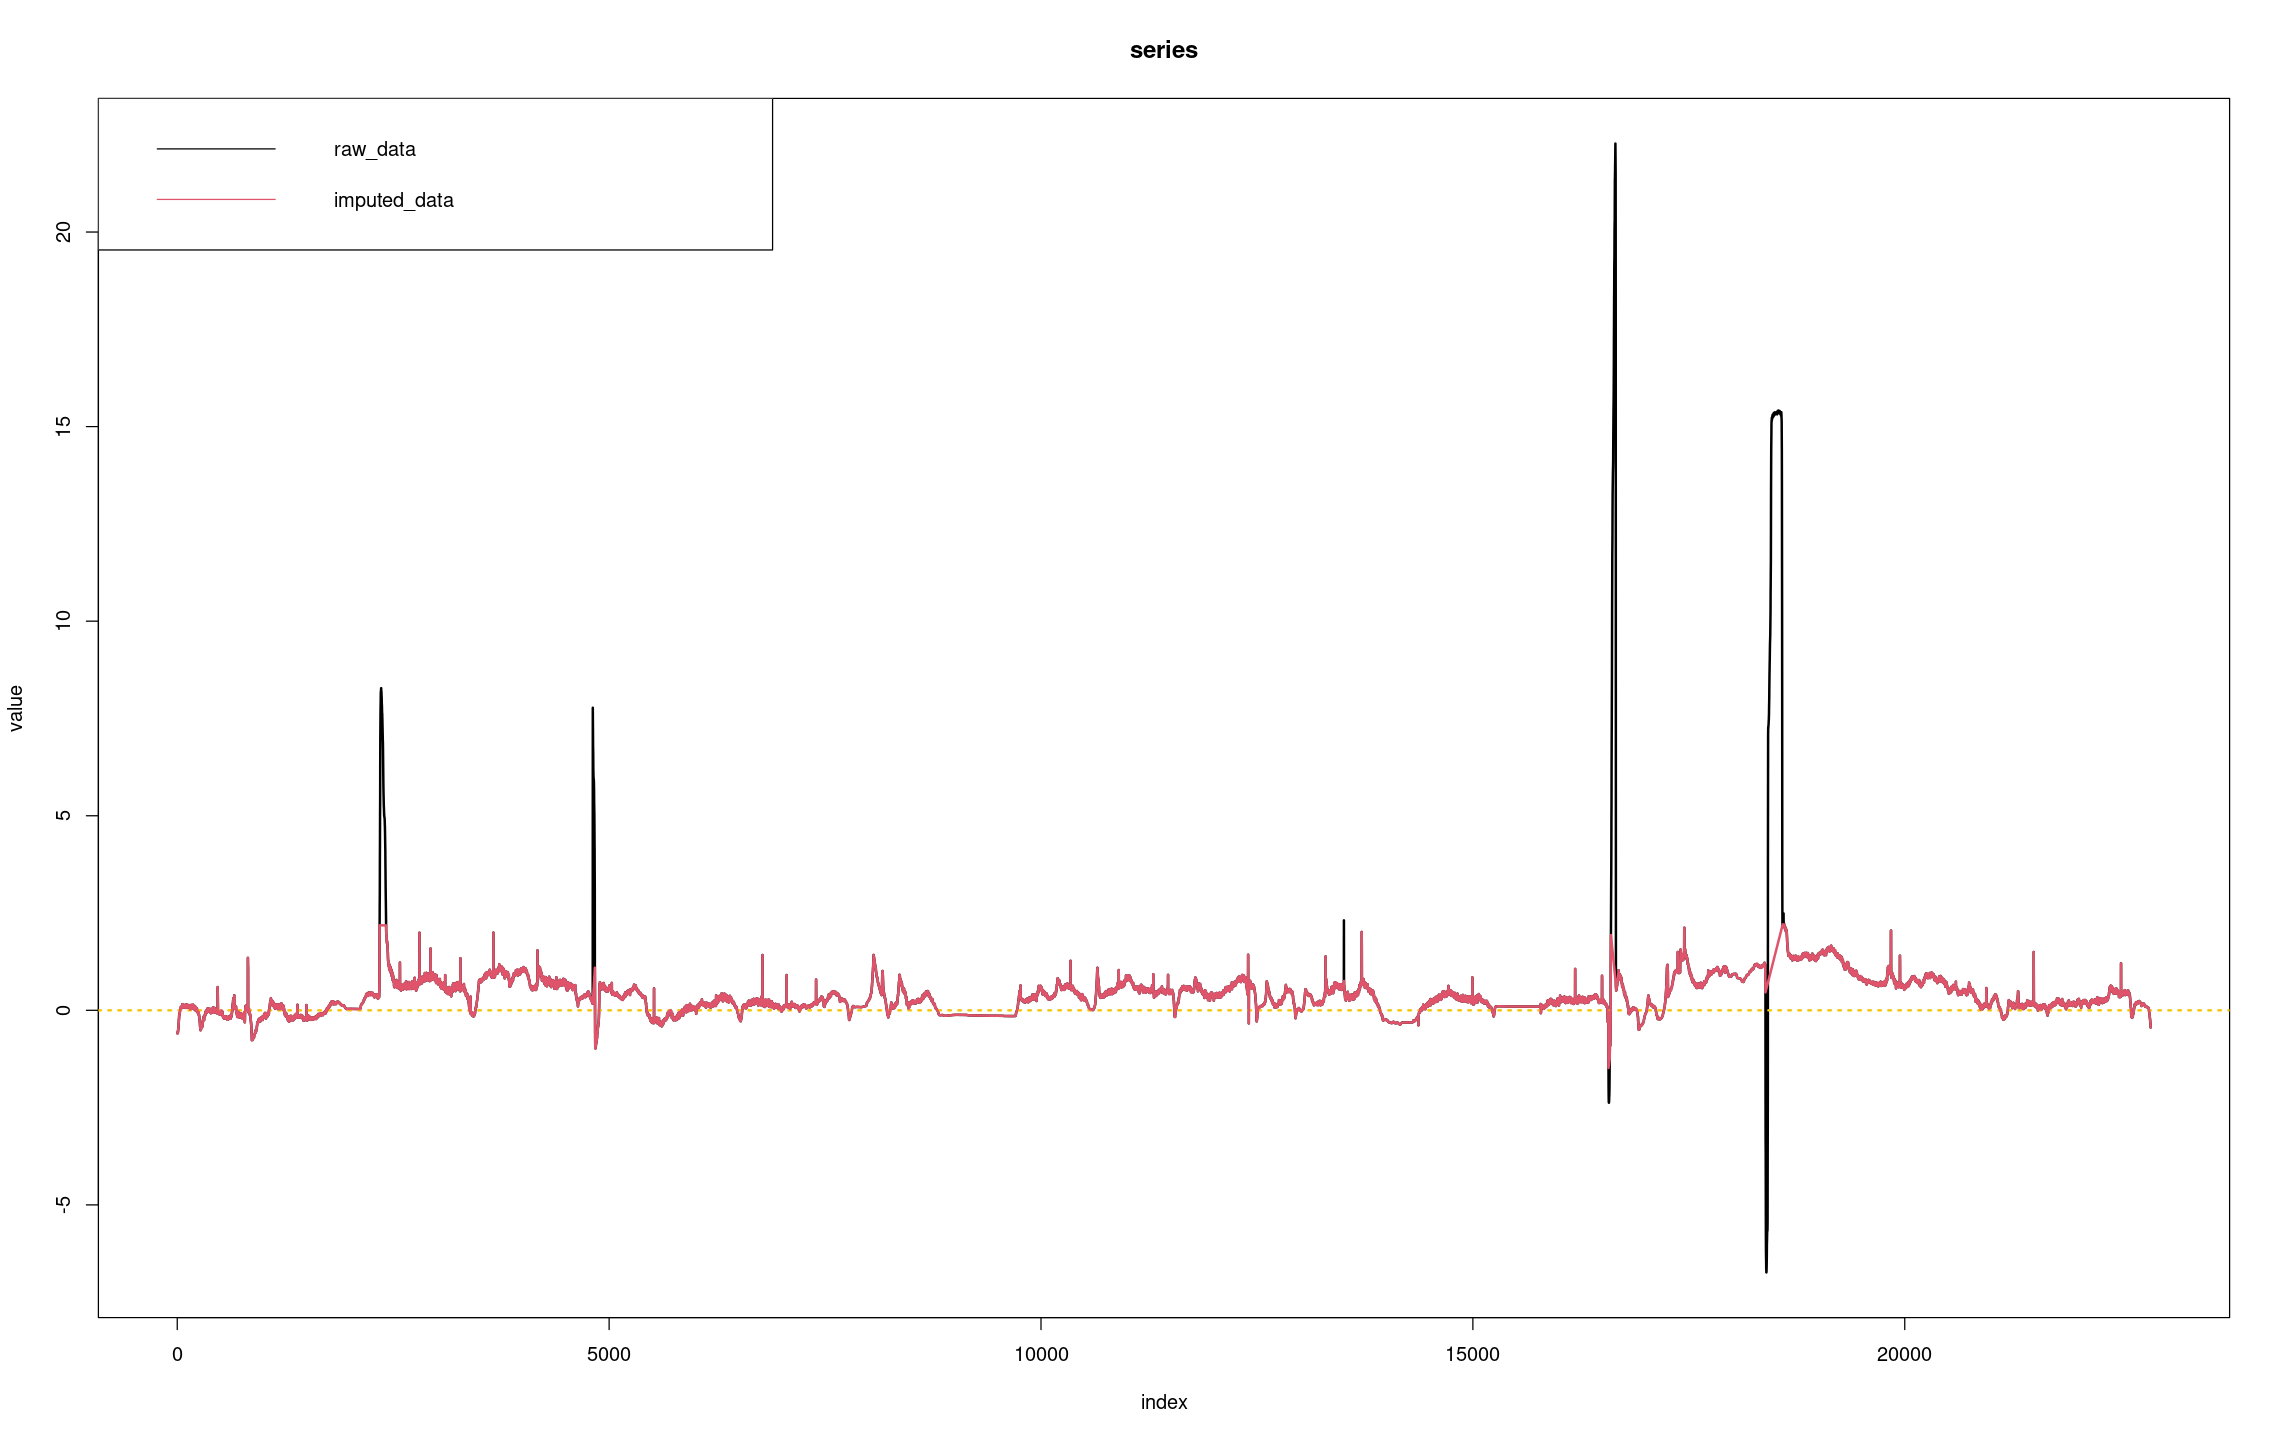

In [17]:
plot(data_lateral_error_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "value", 
     xlab = "index",
    main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(data_lateral_error_object$imputed_data, col = 2, lwd = 2)
legend("topleft", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

## longitudinal_error

In [18]:
data_longitudinal_error_object <- impute_outliers(x = data$longitudinal_error, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = method)

In [19]:
print(names(data_longitudinal_error_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [20]:
print(data_longitudinal_error_object$outlier_positions)

  [1]  2350  2351  2352  2353  2354  2355  2356  2357  2358  2359  2360  2361
 [13]  2362  2363  2364  2365  3278  3279  3322  3323  3324  3325  3326  3327
 [25]  3328  3329  3330  3331  3332  3333  3334  3335  3336  3337  3338  3339
 [37]  3340  3341  3342  3343  3344  3345  3348  3350  3351  3352  3353  3354
 [49]  3355  3356  3357  3358  3362  3363  3364  3365  3366  3367  3368  3369
 [61]  3370  3371  3372  3373  3374  3375  3376  3377  3378  3387  3391  3392
 [73]  3393  3394  3395  3442  3443  3444  3445  3446  3447  3448  3449  3450
 [85]  3451  3452  3453  3454  3455  3456  3457  3458  3459  3460  3461  3462
 [97]  3463  3464  3465  3466  3467  3468  3469  3470  3471  3472  3473  3474
[109]  3475  3476  3477  3478  3479  3480  3481  3482  3483  3484  4811  4812
[121]  4813  4814  4815  4816  4817  4818  4819  4820  4821  4822  4823  4824
[133]  4825  4826  4827  4828  4829  4830  4831  4832  4833  4834  4835  4836
[145]  4837  4838  4839  4840  4841  4842  4843  4844  4845  484

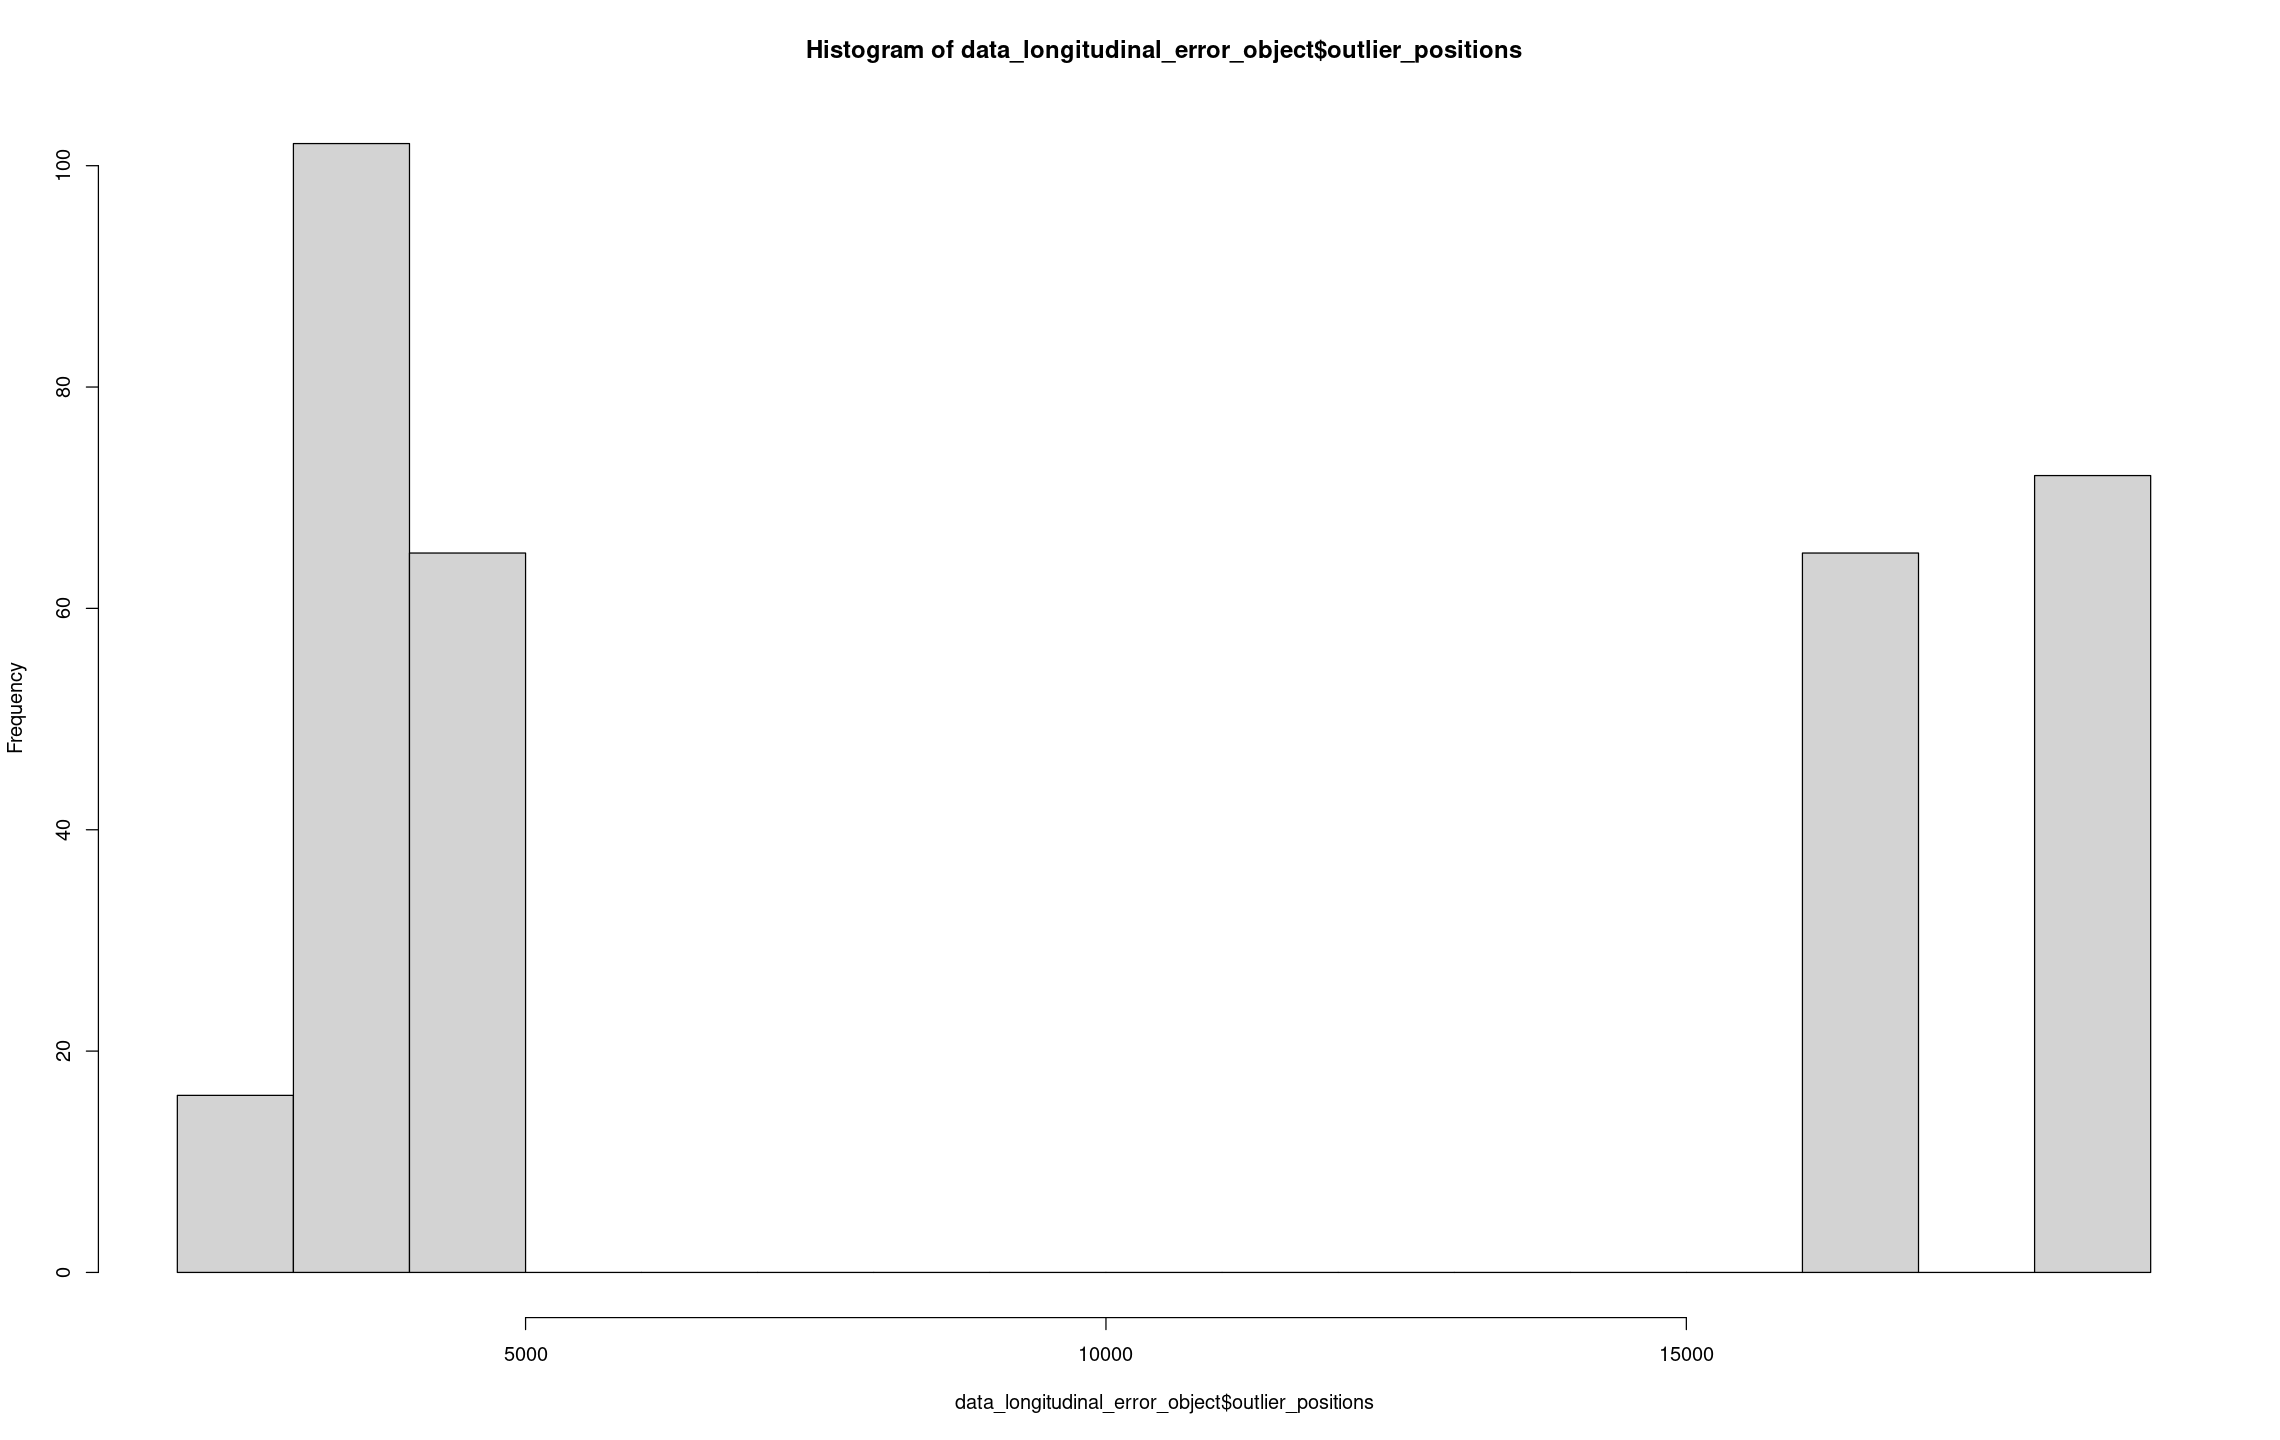

In [21]:
hist(data_longitudinal_error_object$outlier_positions, nclass = 20)

------------------------------------------------------------------------------ 
data_longitudinal_error_object$imputed_data (numeric)

       length            n          NAs      unique          0s         mean'
       22'847       22'847            0      22'584           0   0.03317732
                    100.0%         0.0%                    0.0%             
                                                                            
          .05          .10          .25      median         .75          .90
  -0.46915136  -0.29133043  -0.05749089  0.04145899  0.17950785   0.31280920
                                                                            
        range           sd        vcoef         mad         IQR         skew
   1.65658486   0.25858621   7.79406529  0.17679065  0.23699874  -0.43339853
                                                                            
      meanCI
  0.02982410
  0.03653054
            
         .95
  0.45752030
            
   

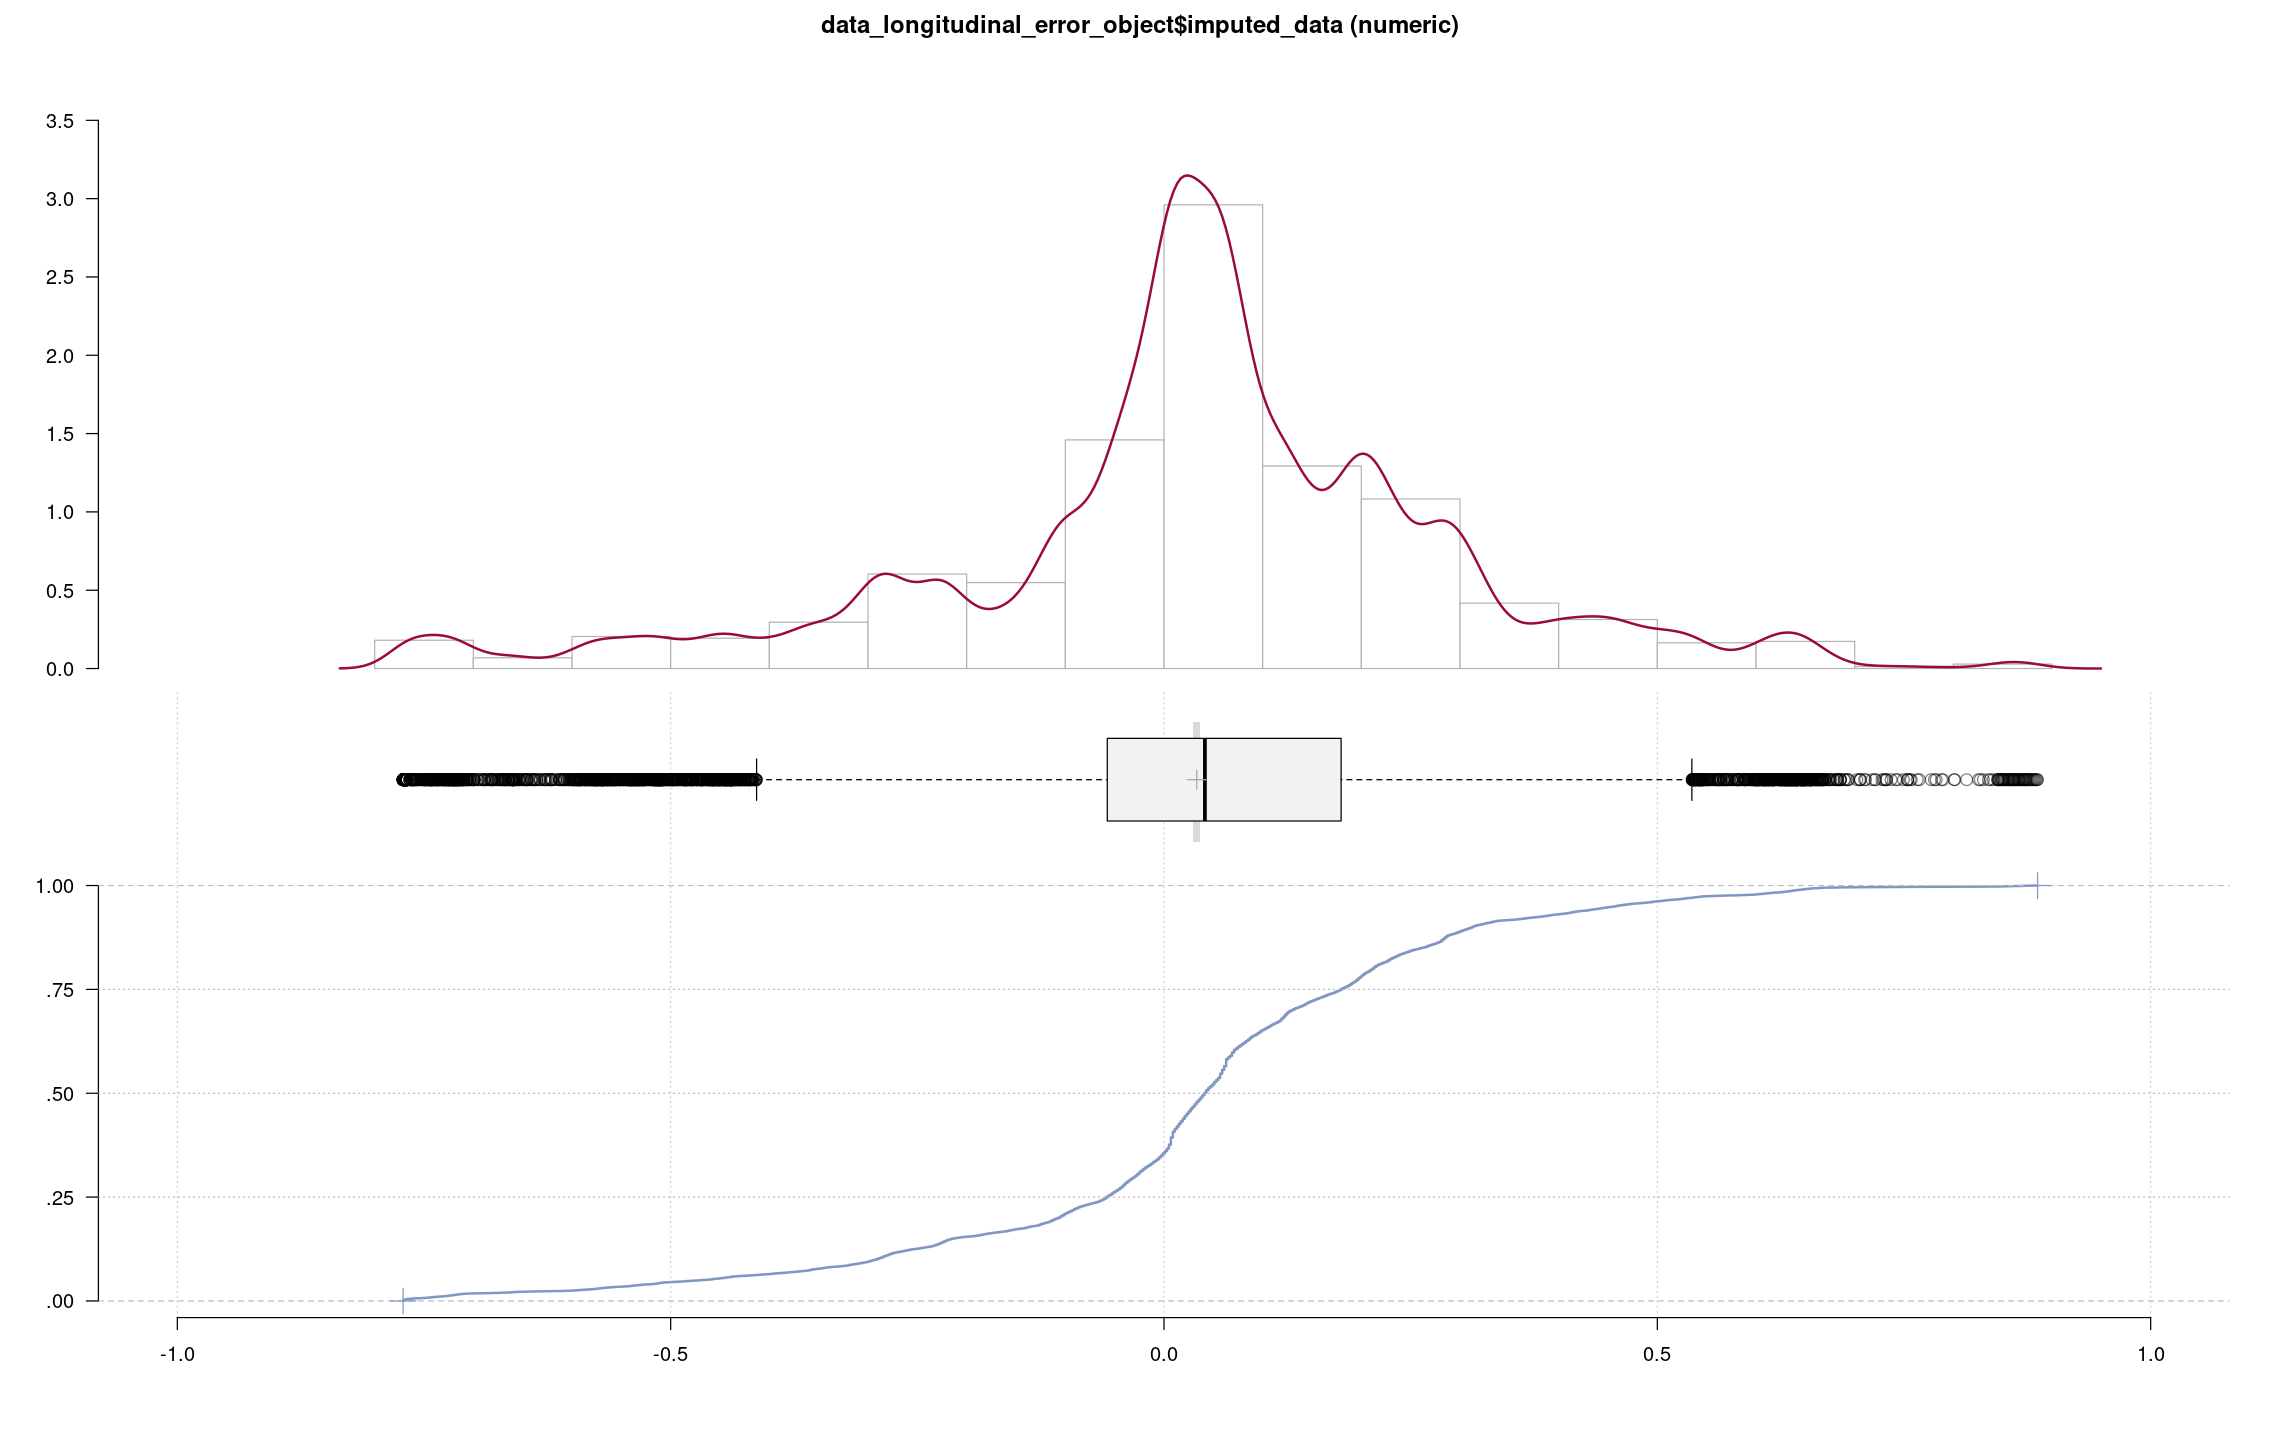

In [22]:
Desc(data_longitudinal_error_object$imputed_data)

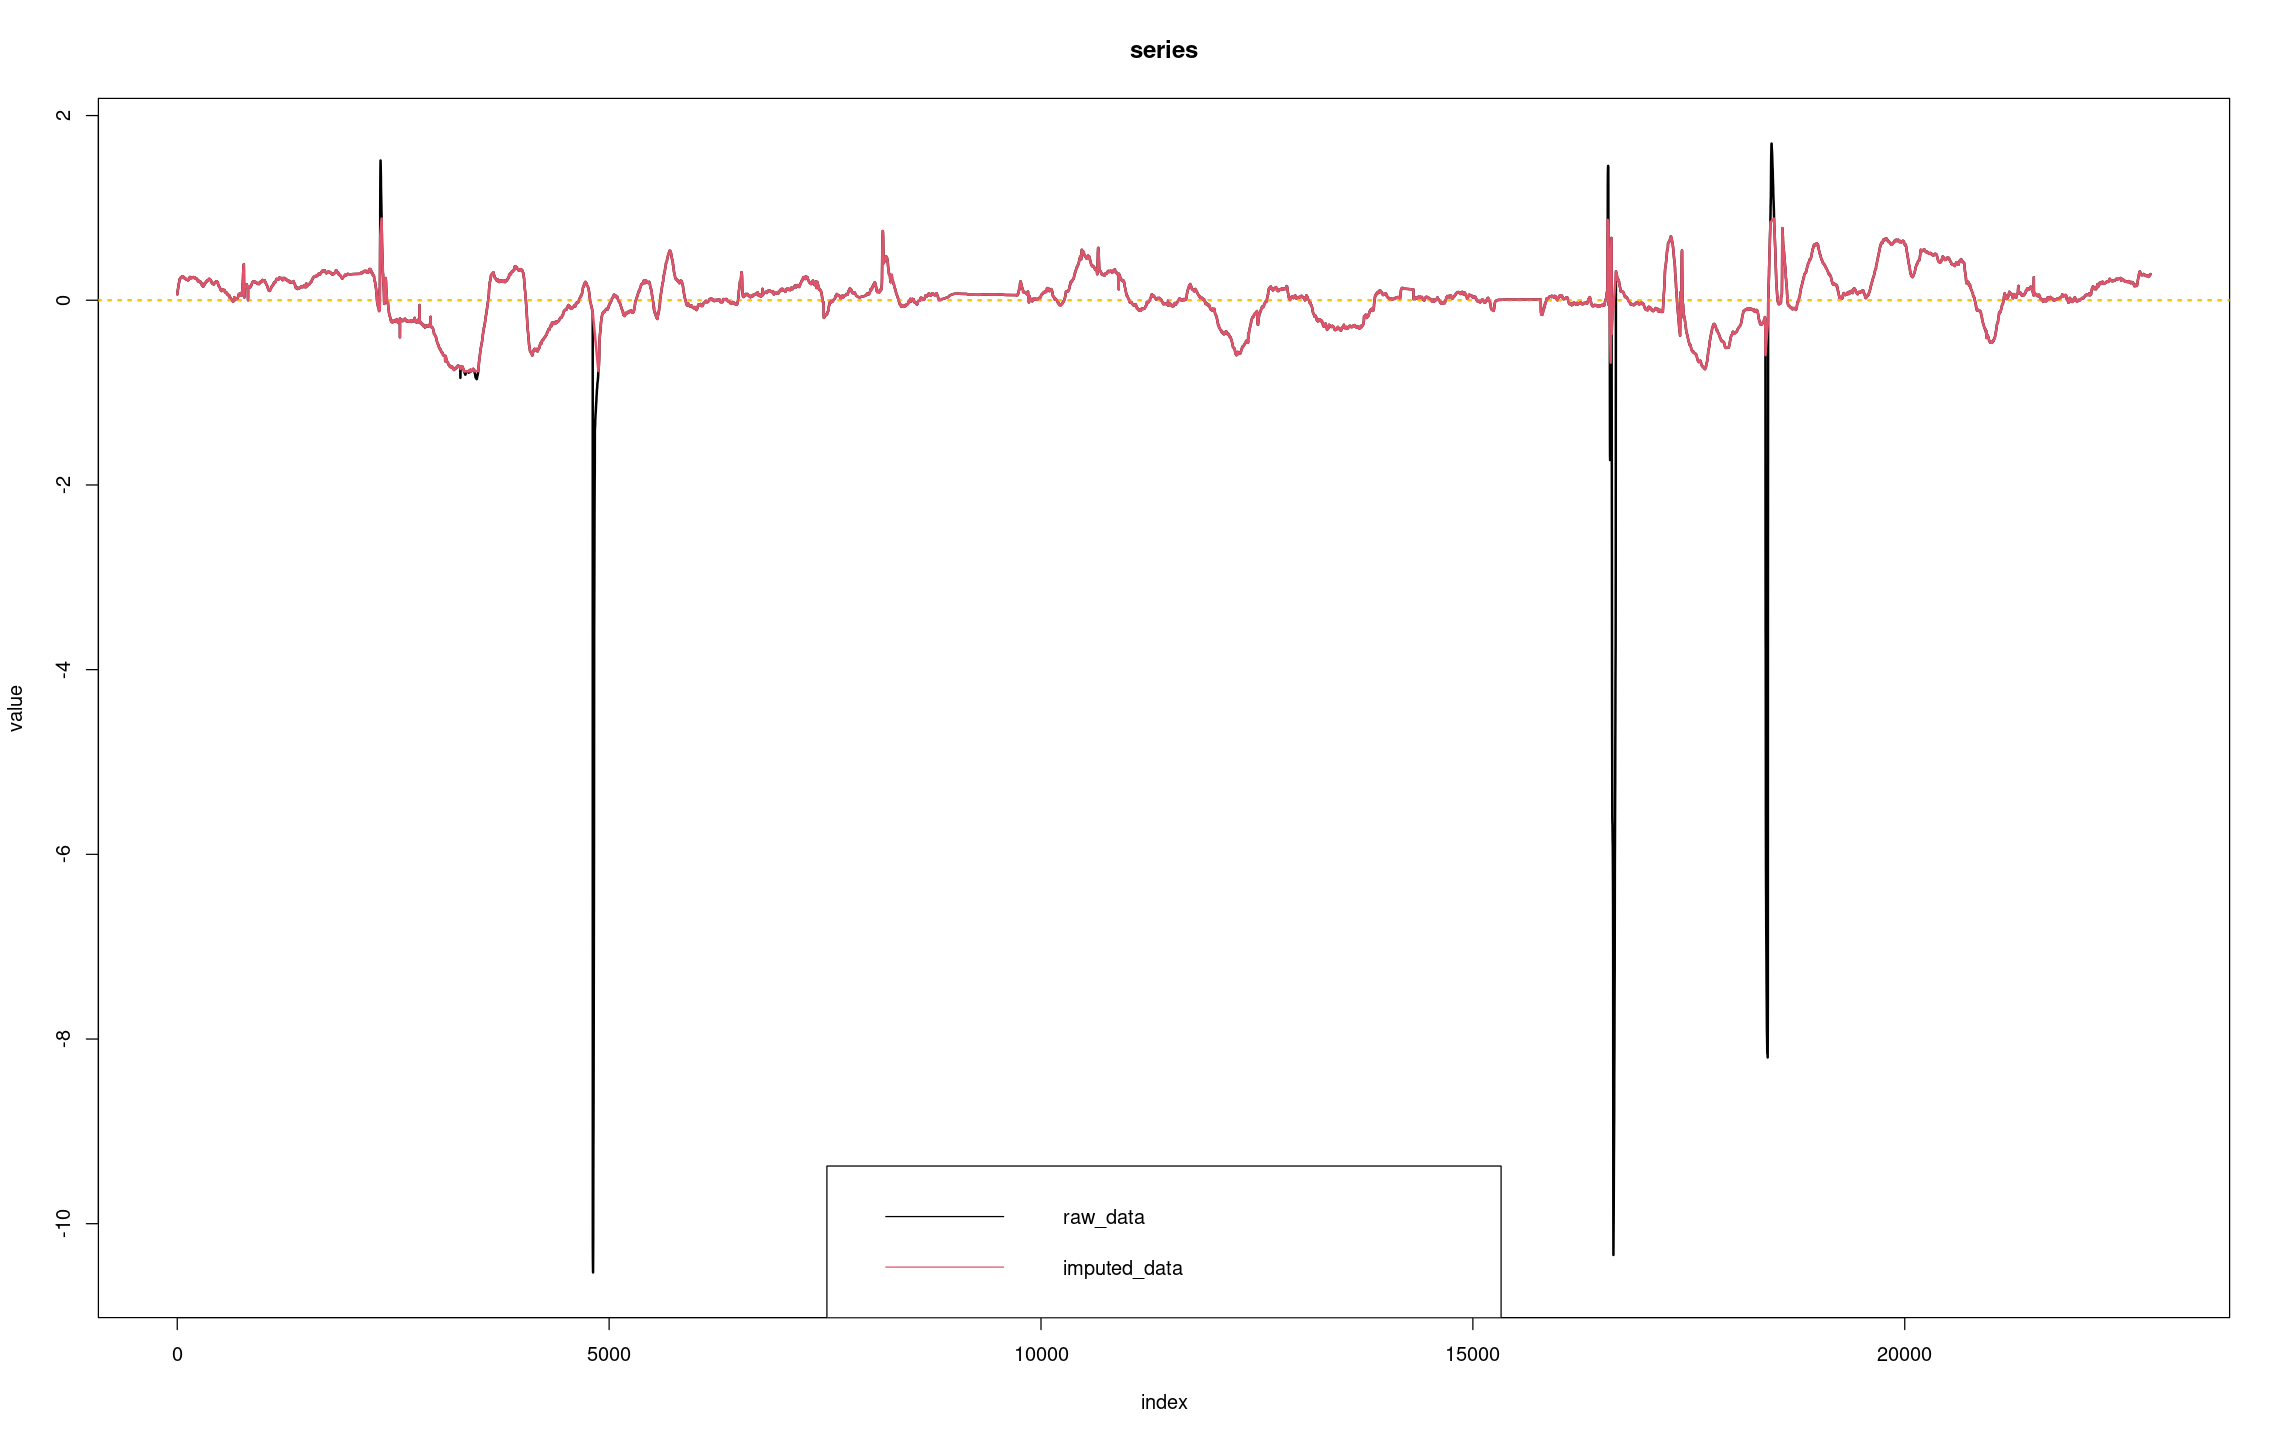

In [23]:
plot(data_longitudinal_error_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "value", 
     xlab = "index",
     main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(data_longitudinal_error_object$imputed_data, col = 2, lwd = 2)
legend("bottom", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

## haversine_error

In [24]:
data_haversine_error_object <- impute_outliers(x = data$haversine_error, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = method)

In [25]:
print(names(data_haversine_error_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [26]:
print(data_haversine_error_object$outlier_positions)

  [1]  2344  2345  2346  2347  2348  2349  2350  2351  2352  2353  2354  2355
 [13]  2356  2357  2358  2359  2360  2361  2362  2363  2364  2365  2366  2367
 [25]  2368  2369  2370  2371  2372  2373  2374  2375  2376  2377  2378  2379
 [37]  2380  2381  2382  2383  2384  2385  2386  2387  2388  2389  2390  2391
 [49]  2392  2393  2394  2395  2396  2397  2398  2399  2400  2401  2402  2403
 [61]  2404  2405  2406  2407  2408  2409  2410  2411  2412  2413  2414  2415
 [73]  2416  2417  4811  4812  4813  4814  4815  4816  4817  4818  4819  4820
 [85]  4821  4822  4823  4824  4825  4826  4827  4828  4829  4830  4831  4832
 [97]  4833  4834 13507 16573 16574 16575 16576 16577 16599 16600 16601 16602
[109] 16603 16604 16605 16606 16607 16608 16609 16610 16611 16612 16613 16614
[121] 16615 16616 16617 16618 16619 16620 16621 16622 16623 16624 16625 16626
[133] 16627 16628 16629 16630 16631 16632 16633 16634 16635 16636 16637 16638
[145] 16639 16640 16641 16642 16643 16644 16645 16646 16647 1664

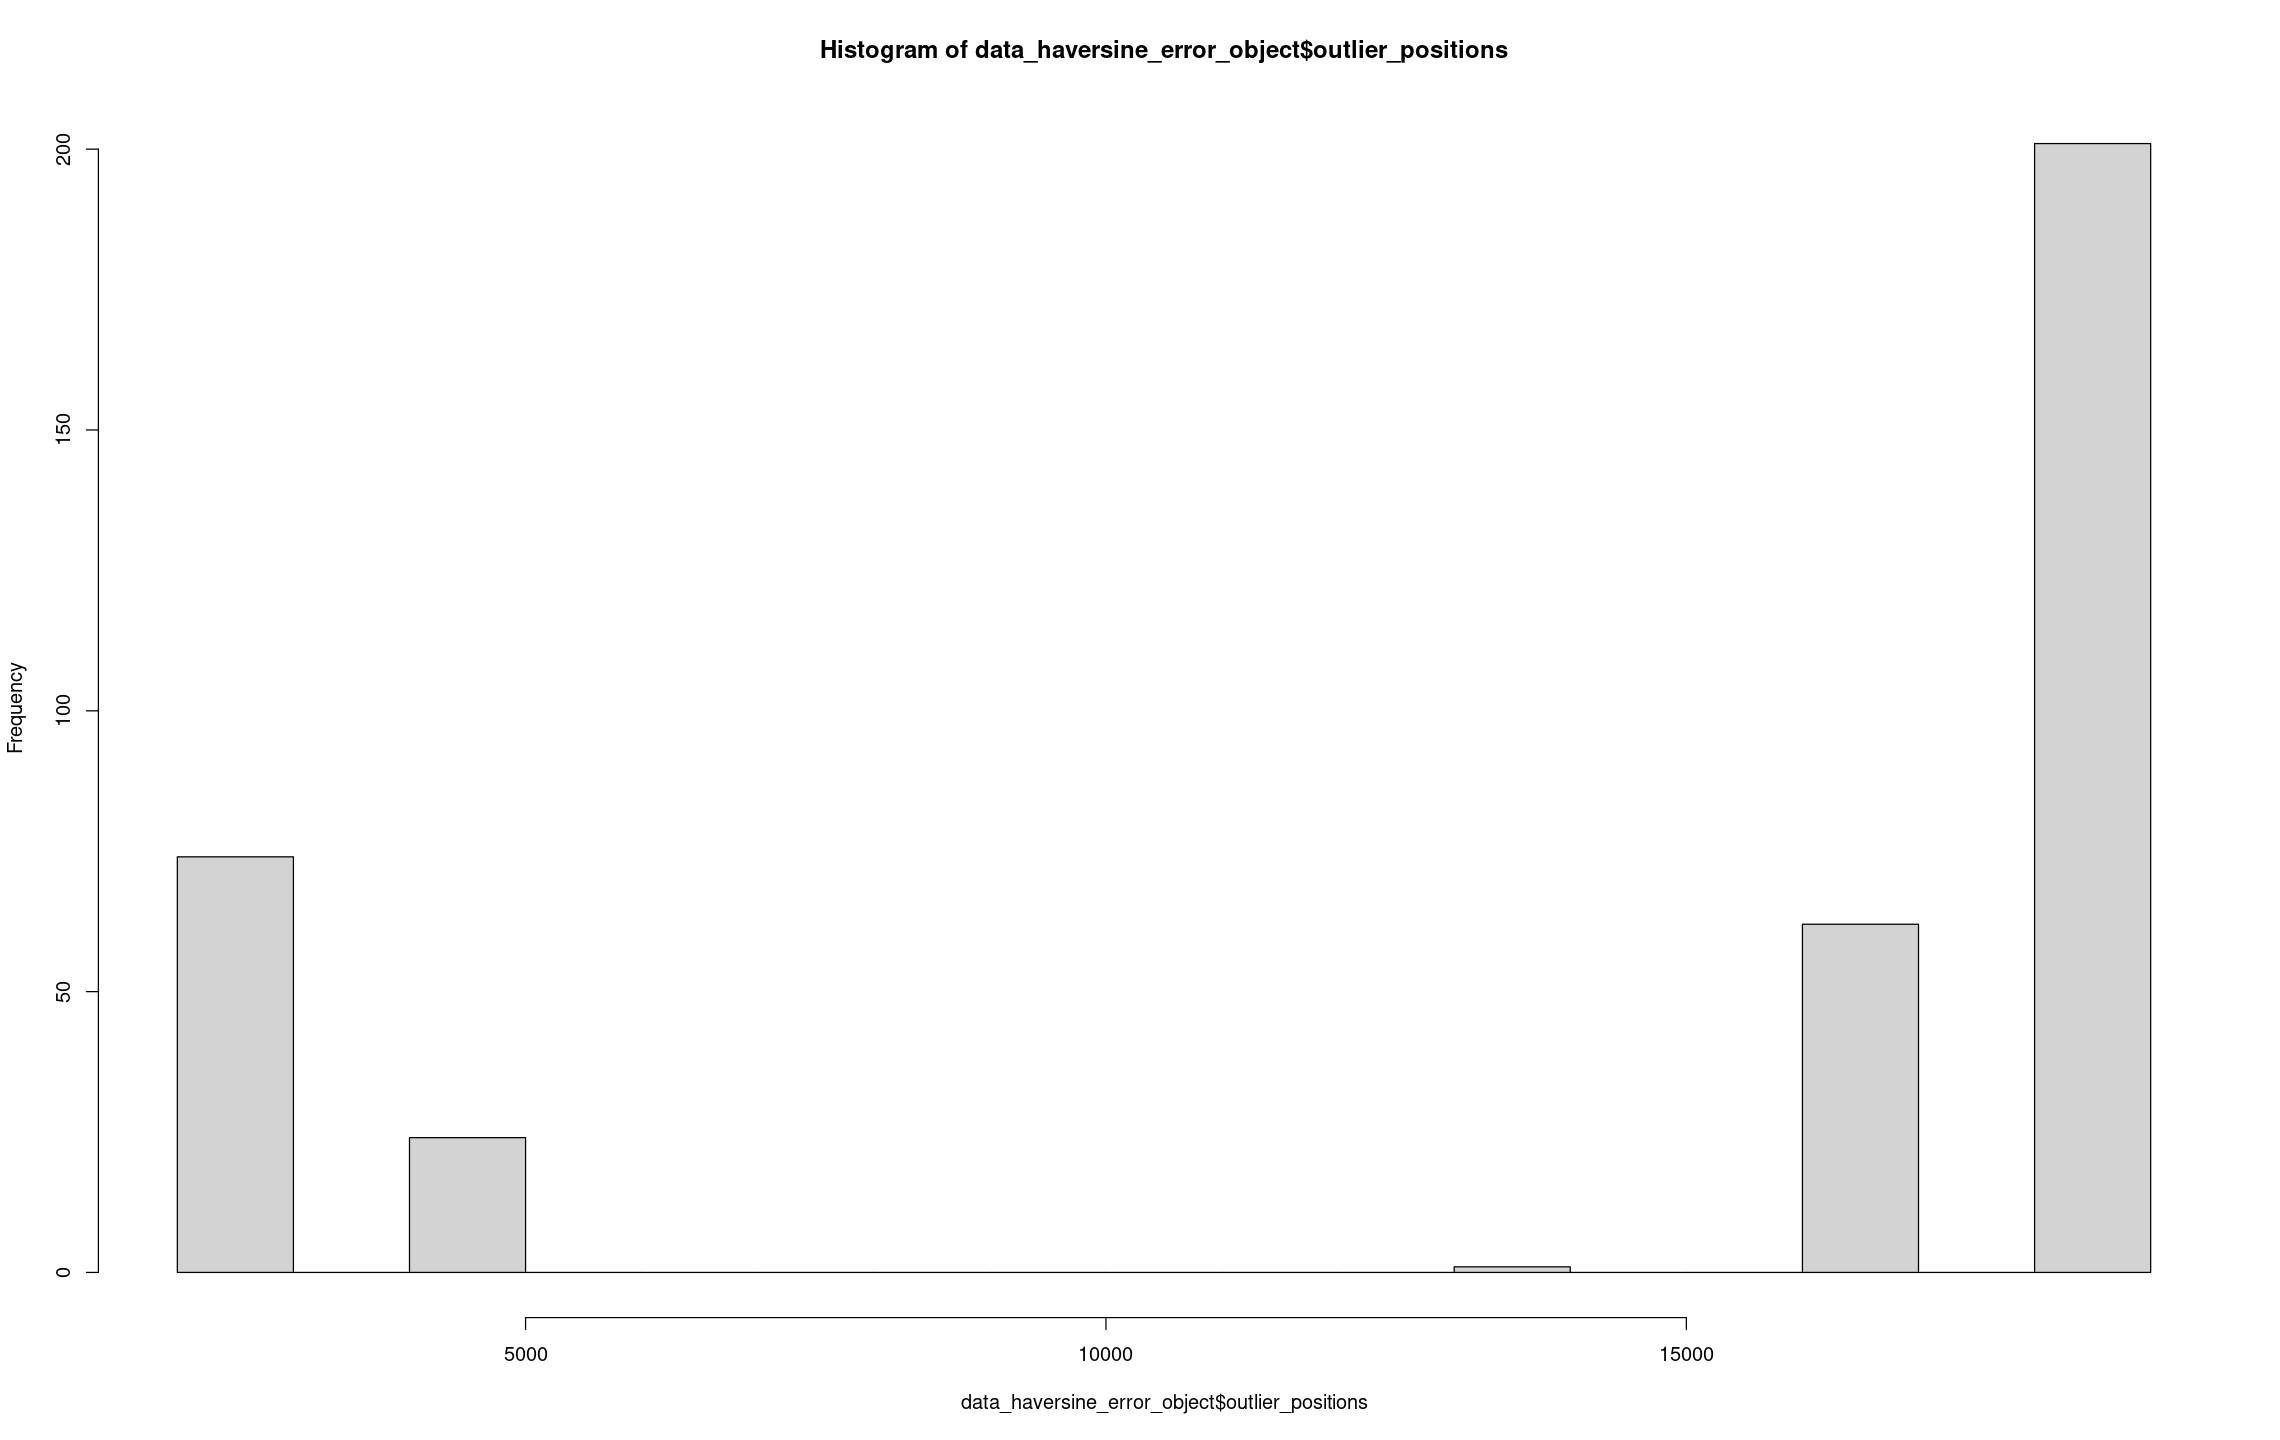

In [27]:
hist(data_haversine_error_object$outlier_positions, nclass = 20)

------------------------------------------------------------------------------ 
data_haversine_error_object$imputed_data (numeric)

       length            n          NAs       unique           0s         mean'
       22'847       22'847            0       22'574            0  0.507312999
                    100.0%         0.0%                      0.0%             
                                                                              
          .05          .10          .25       median          .75          .90
  0.097783819  0.133217523  0.215461470  0.371097744  0.736527413  1.020905614
                                                                              
        range           sd        vcoef          mad          IQR         skew
  2.298159415  0.390421161  0.769586353  0.316238255  0.521065943  1.386604977
                                                                              
       meanCI
  0.502250210
  0.512375788
             
          .95
  1.273

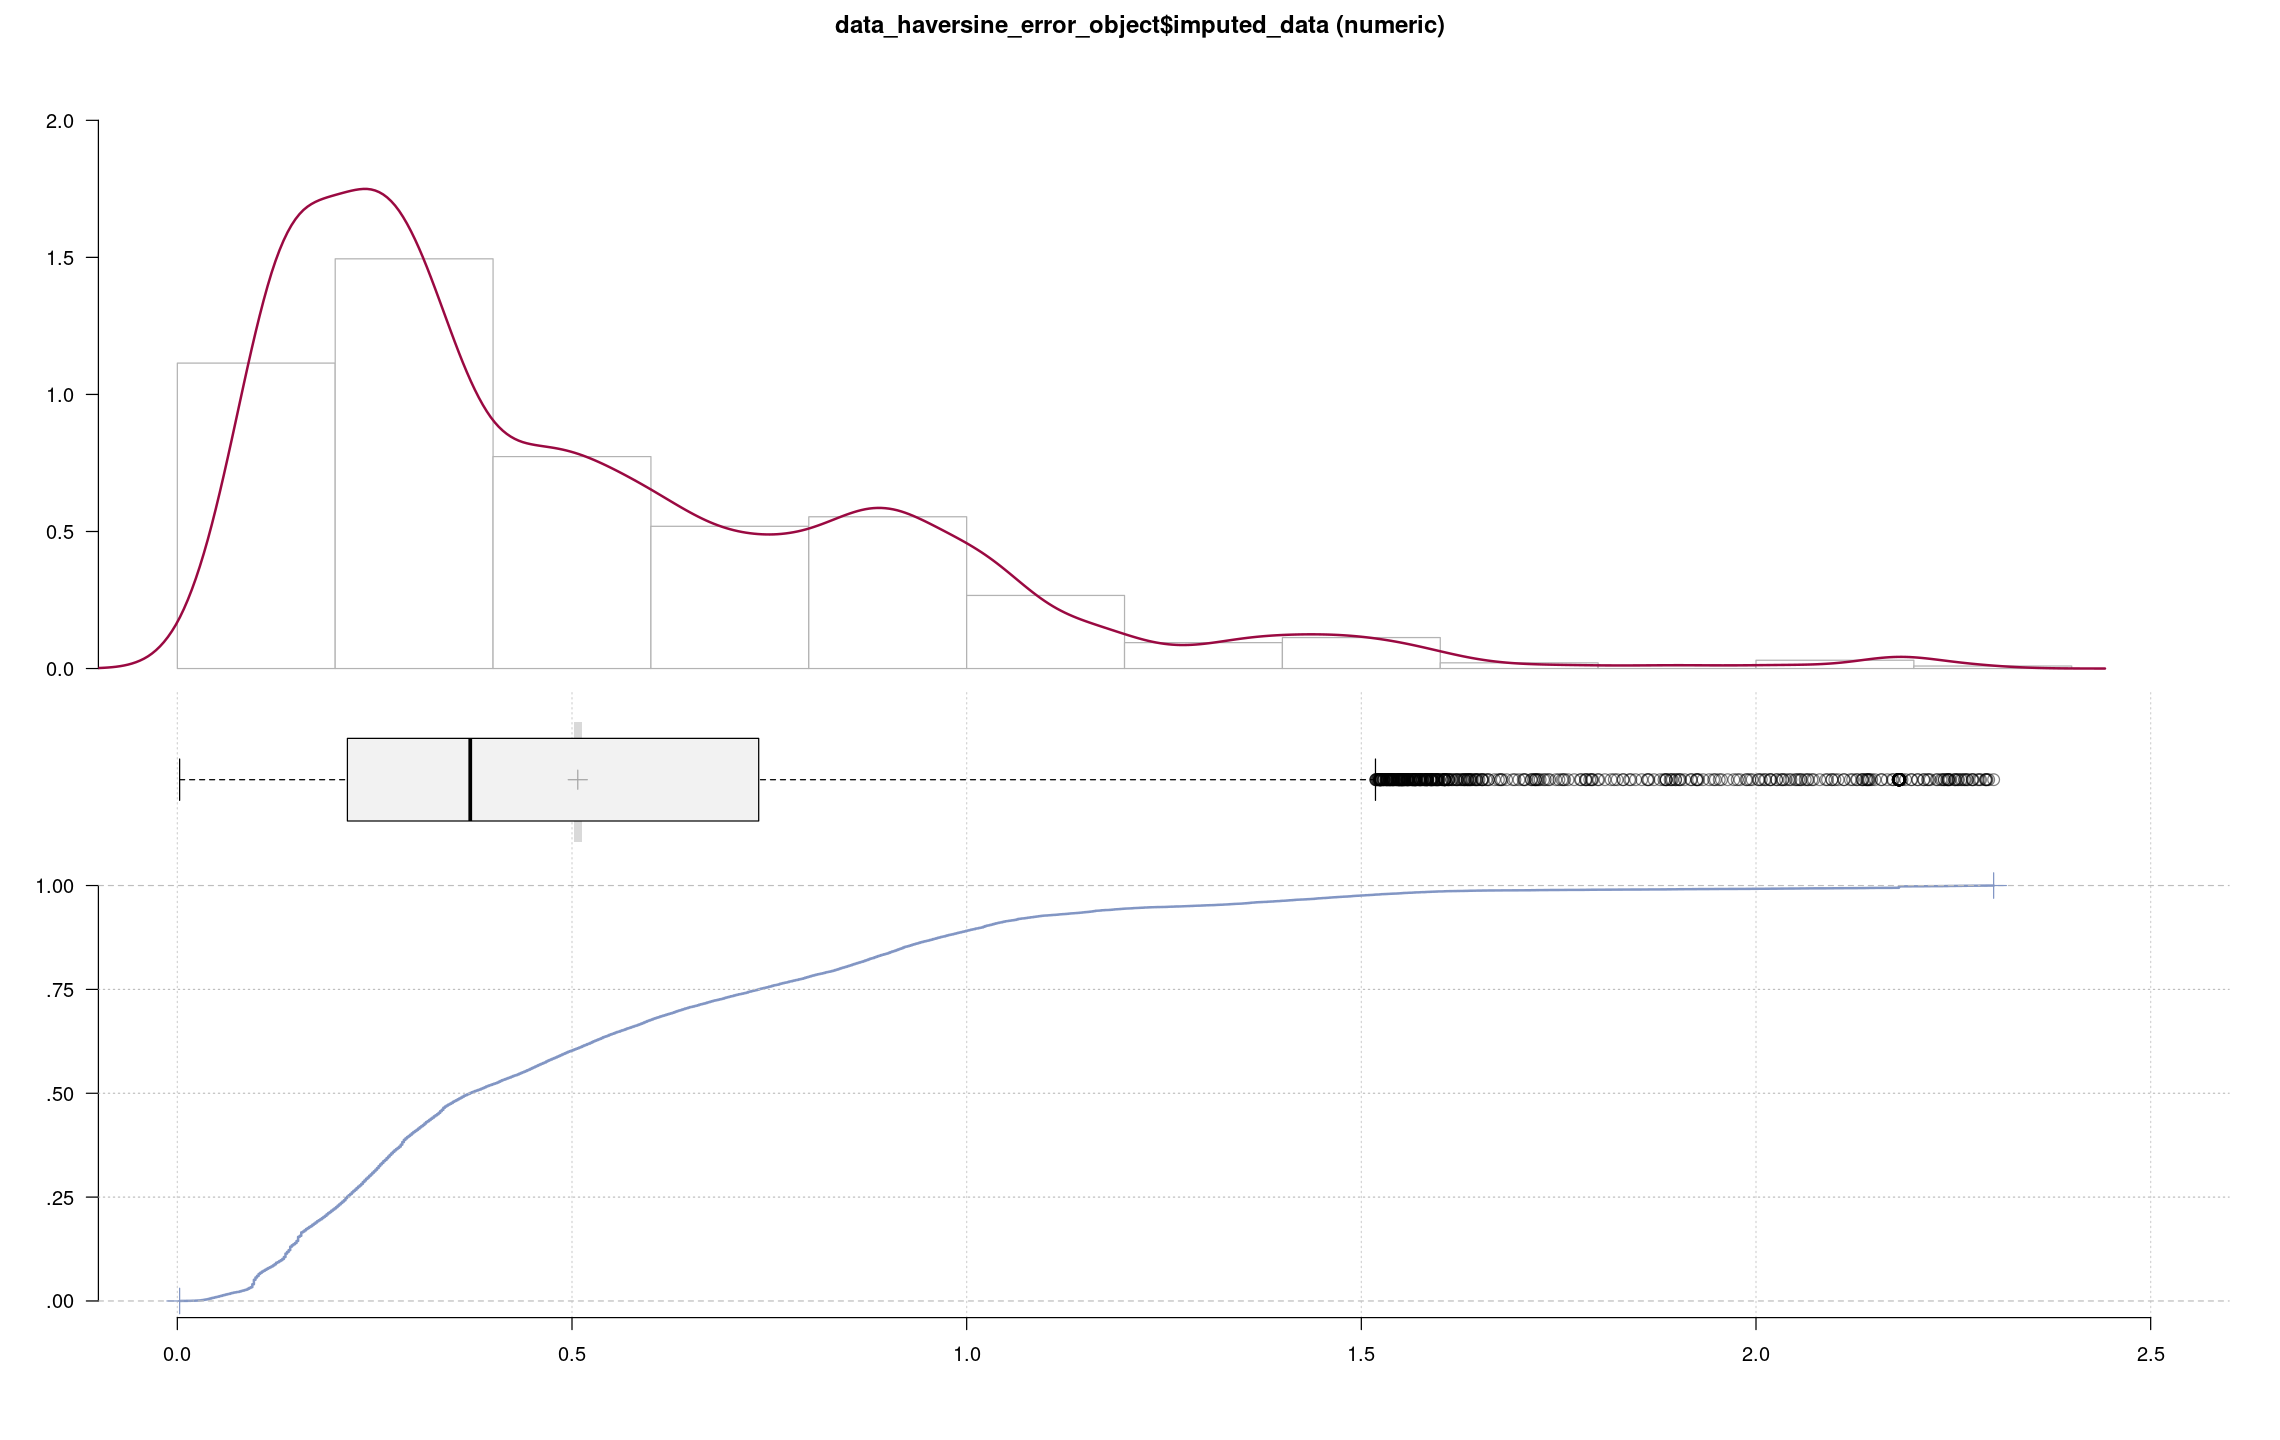

In [28]:
Desc(data_haversine_error_object$imputed_data)

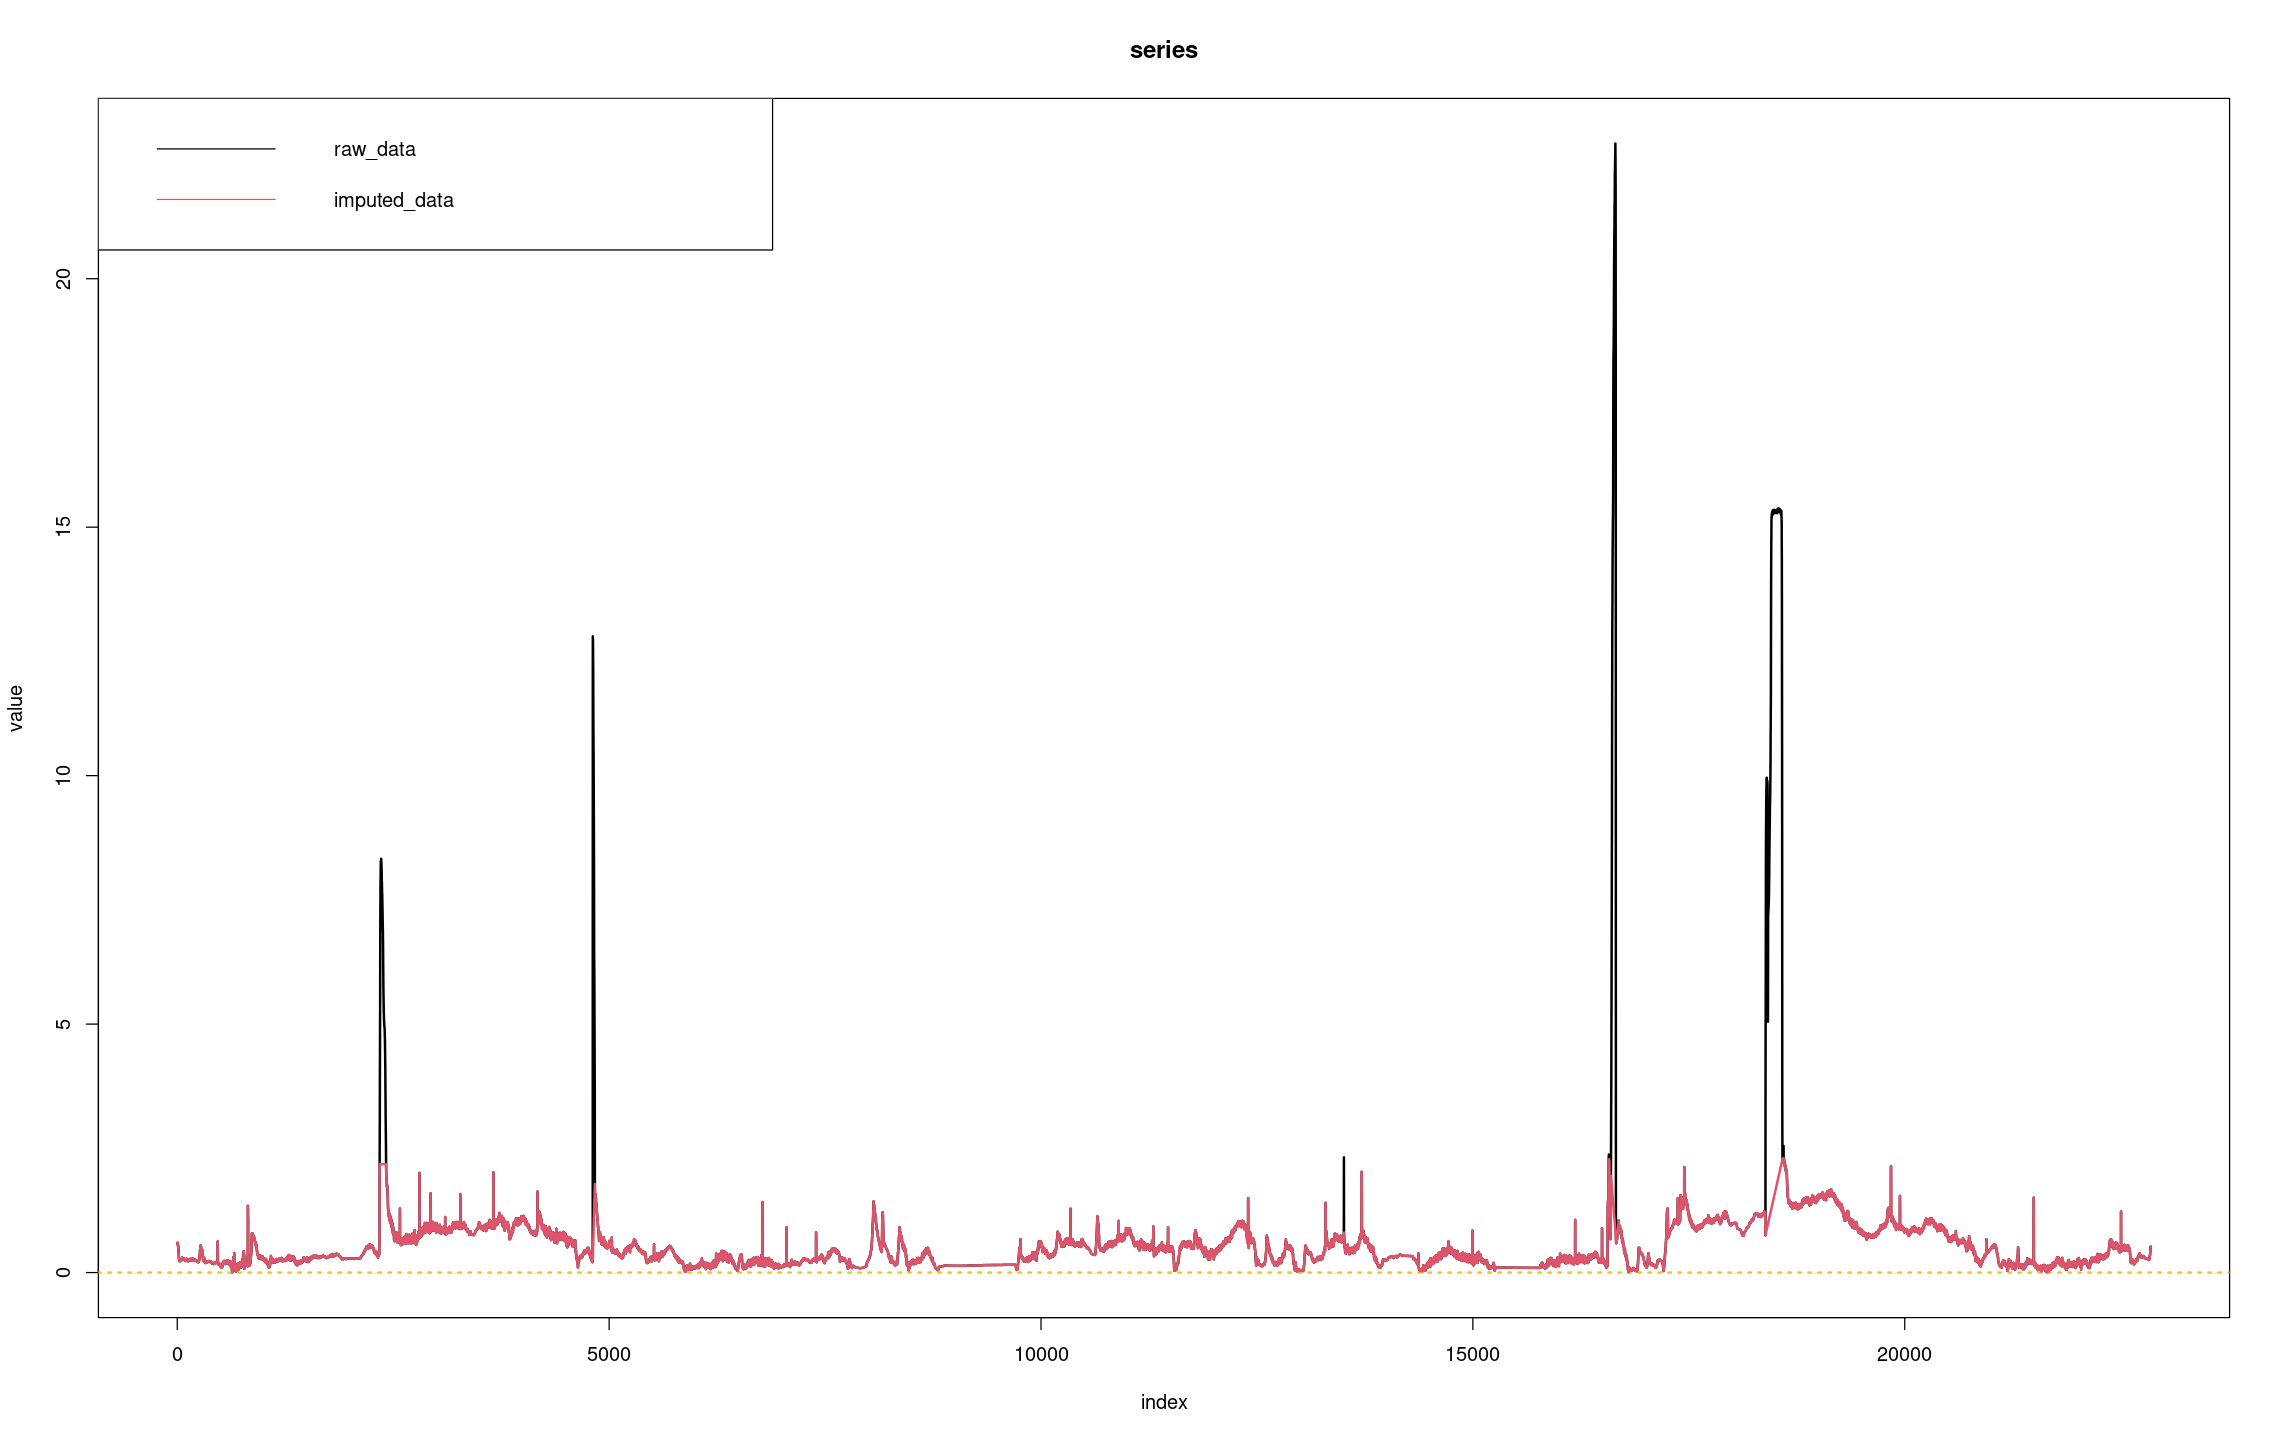

In [29]:
plot(data_haversine_error_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "value", 
     xlab = "index",
     main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(data_haversine_error_object$imputed_data, col = 2, lwd = 2)
legend("topleft", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

## lateral_error_abs

In [30]:
data_lateral_error_abs_object <- impute_outliers(x = data$lateral_error_abs, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = method)

In [31]:
print(names(data_lateral_error_abs_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [32]:
print(data_lateral_error_abs_object$outlier_positions)

  [1]  2343  2344  2345  2346  2347  2348  2349  2350  2351  2352  2353  2354
 [13]  2355  2356  2357  2358  2359  2360  2361  2362  2363  2364  2365  2366
 [25]  2367  2368  2369  2370  2371  2372  2373  2374  2375  2376  2377  2378
 [37]  2379  2380  2381  2382  2383  2384  2385  2386  2387  2388  2389  2390
 [49]  2391  2392  2393  2394  2395  2396  2397  2398  2399  2400  2401  2402
 [61]  2403  2404  2405  2406  2407  2408  2409  2410  2411  2412  2413  2414
 [73]  2415  2416  2417  2418  4811  4812  4813  4814  4815  4816  4817  4818
 [85]  4819  4820  4821  4822  4823  4824  4825  4826  4827  4828  4829  4830
 [97]  4831  4832  4833  4834 13507 16572 16573 16574 16575 16576 16577 16578
[109] 16579 16580 16599 16600 16601 16602 16603 16604 16605 16606 16607 16608
[121] 16609 16610 16611 16612 16613 16614 16615 16616 16617 16618 16619 16620
[133] 16621 16622 16623 16624 16625 16626 16627 16628 16629 16630 16631 16632
[145] 16633 16634 16635 16636 16637 16638 16639 16640 16641 1664

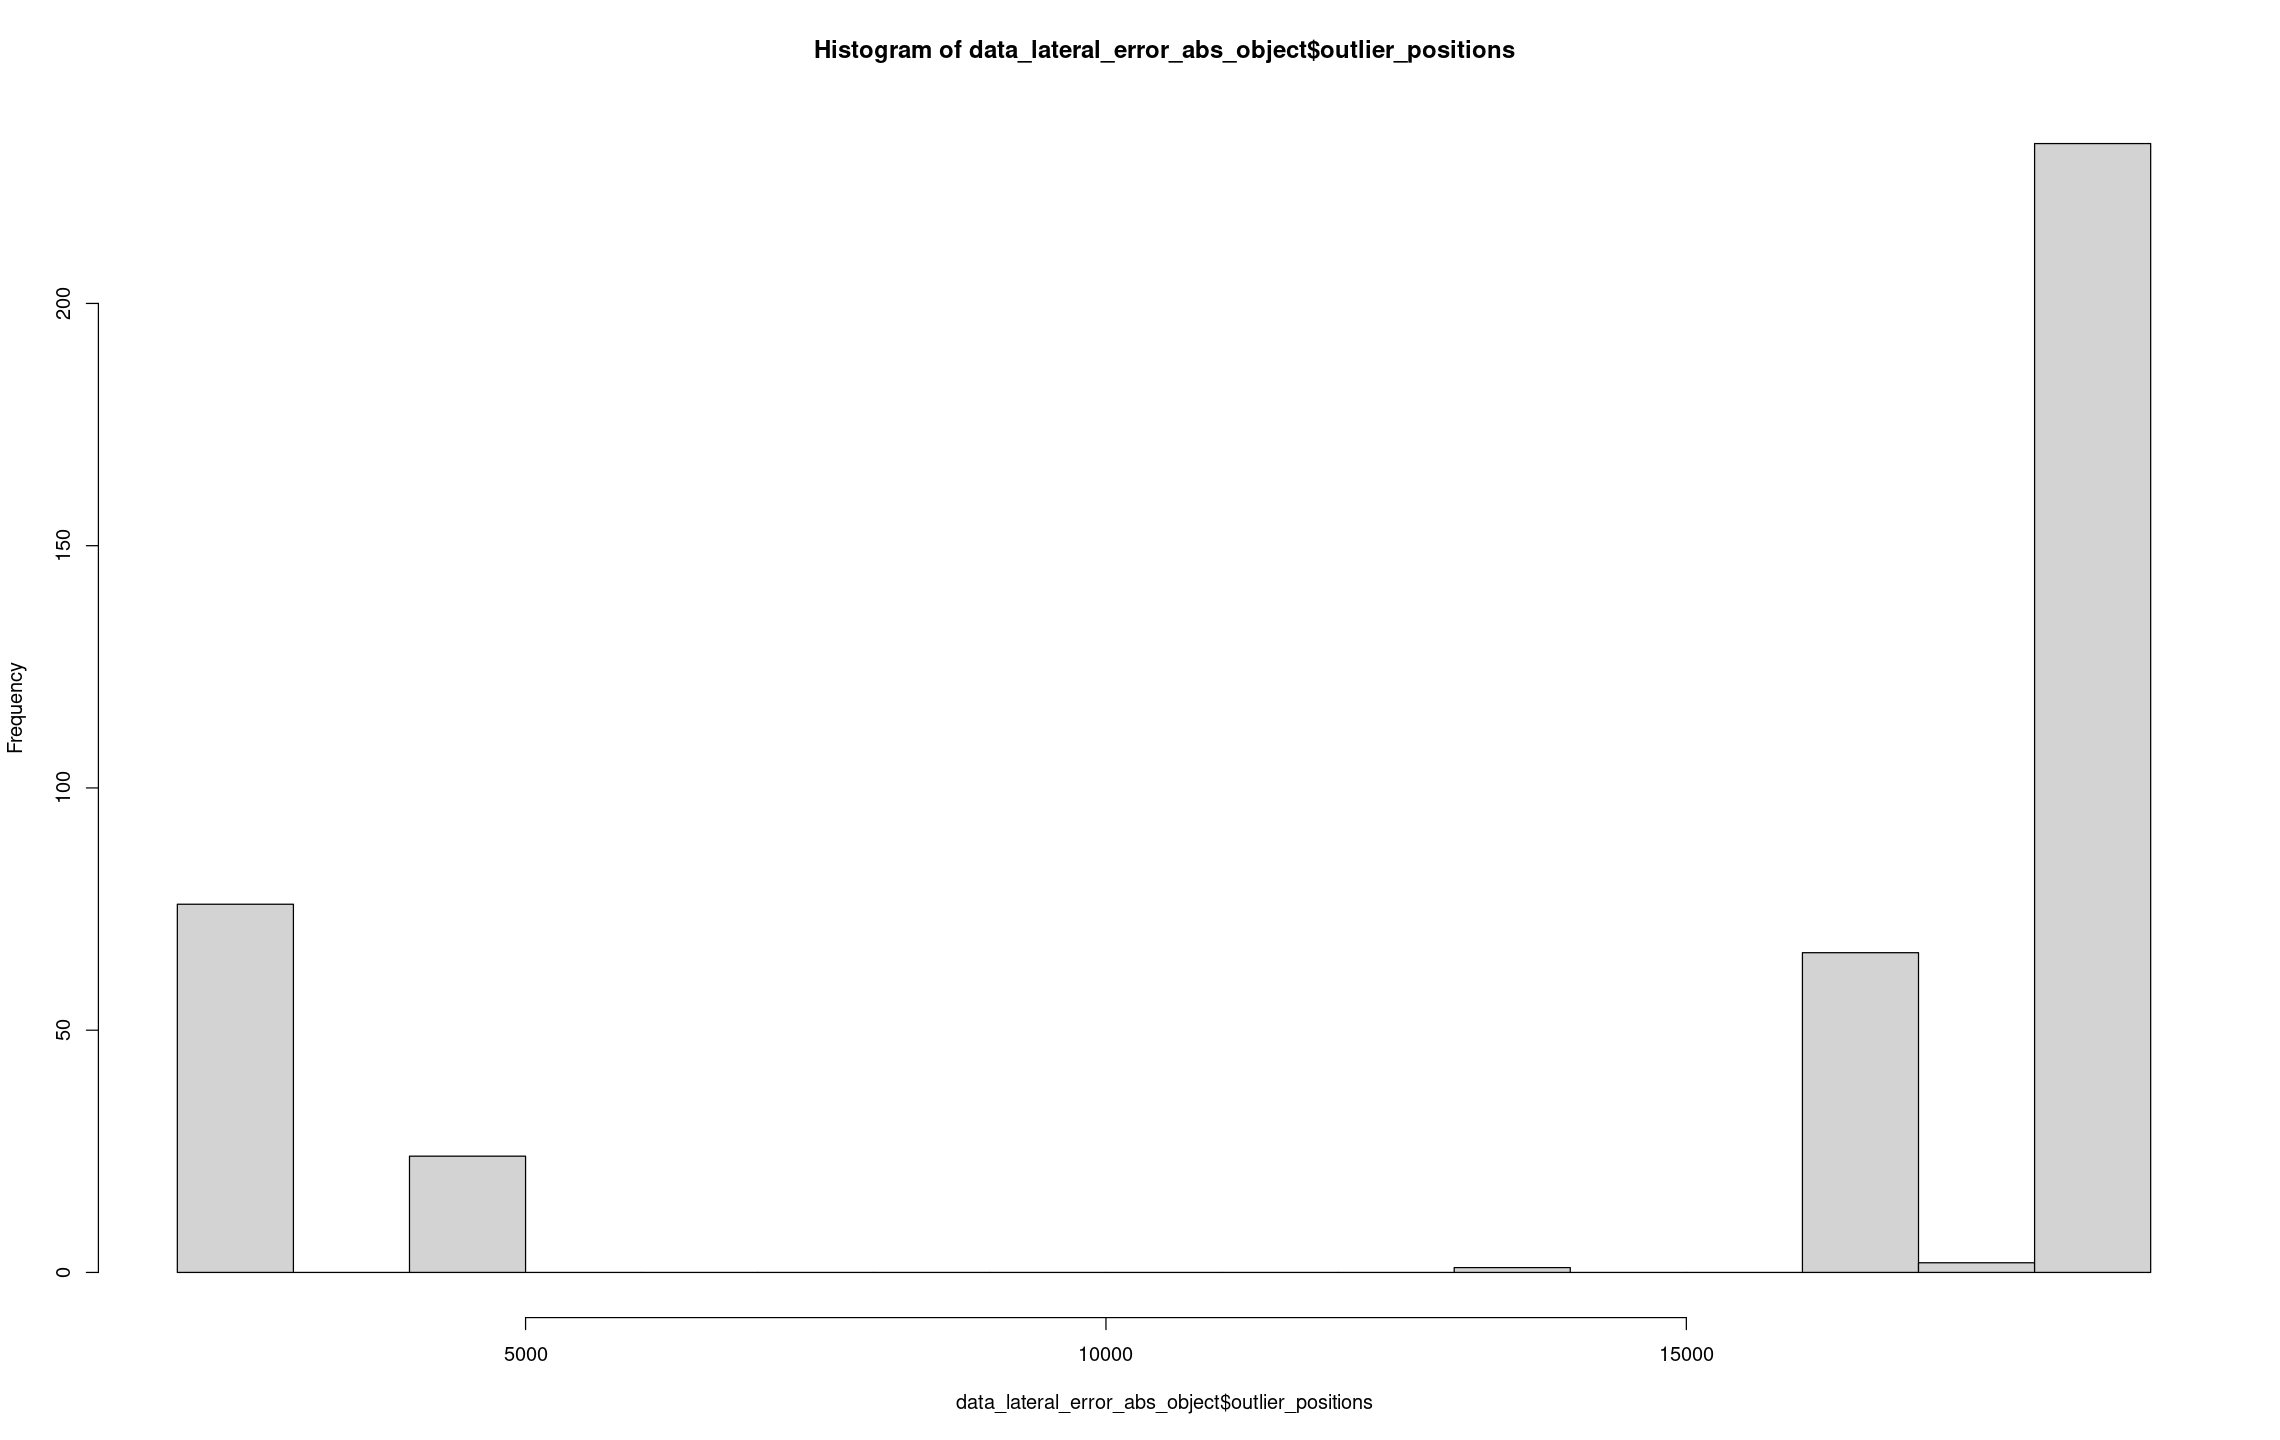

In [33]:
hist(data_lateral_error_abs_object$outlier_positions, nclass = 20)

------------------------------------------------------------------------------ 
data_lateral_error_abs_object$imputed_data (numeric)

        length             n           NAs        unique            0s'
        22'847        22'847             0        22'581             0
                      100.0%          0.0%                        0.0%
                                                                      
           .05           .10           .25        median           .75
  0.0481907140  0.0872328416  0.1457234174  0.3253491819  0.6304513216
                                                                      
         range            sd         vcoef           mad           IQR
  2.0623233317  0.3861824620  0.8709736314  0.3090927912  0.4847279042
                                                                      
          mean        meanCI
  0.4433916804  0.4383838564
                0.4483995044
                            
           .90           .95
  0.943003

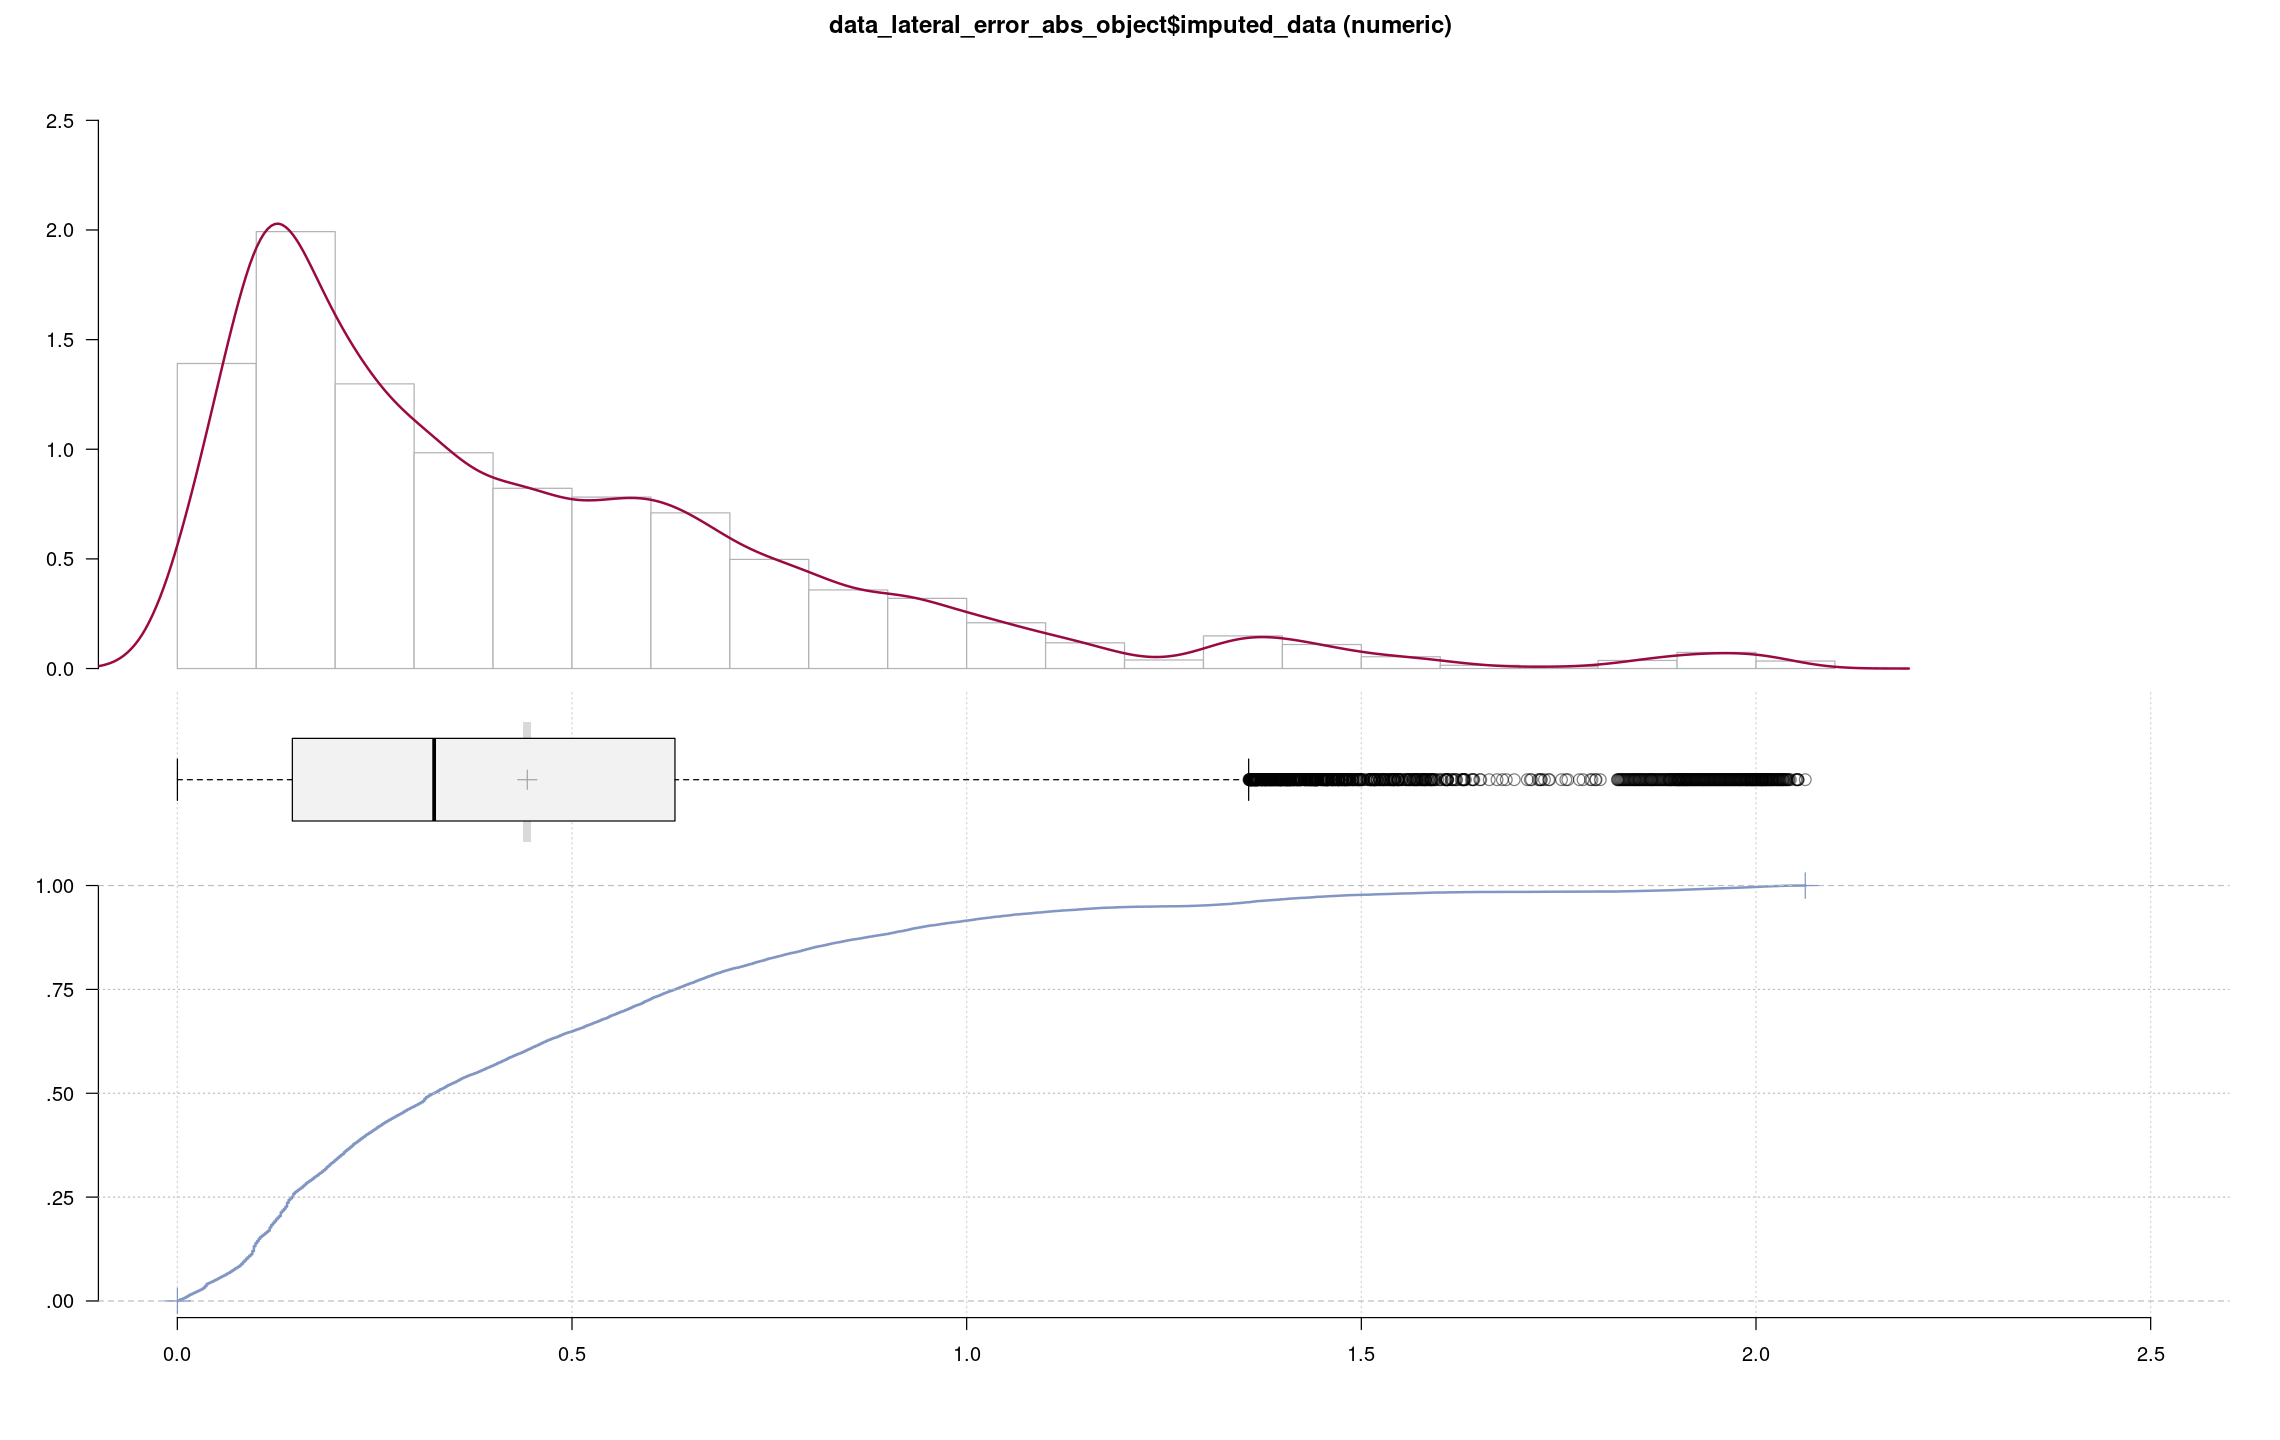

In [34]:
Desc(data_lateral_error_abs_object$imputed_data)

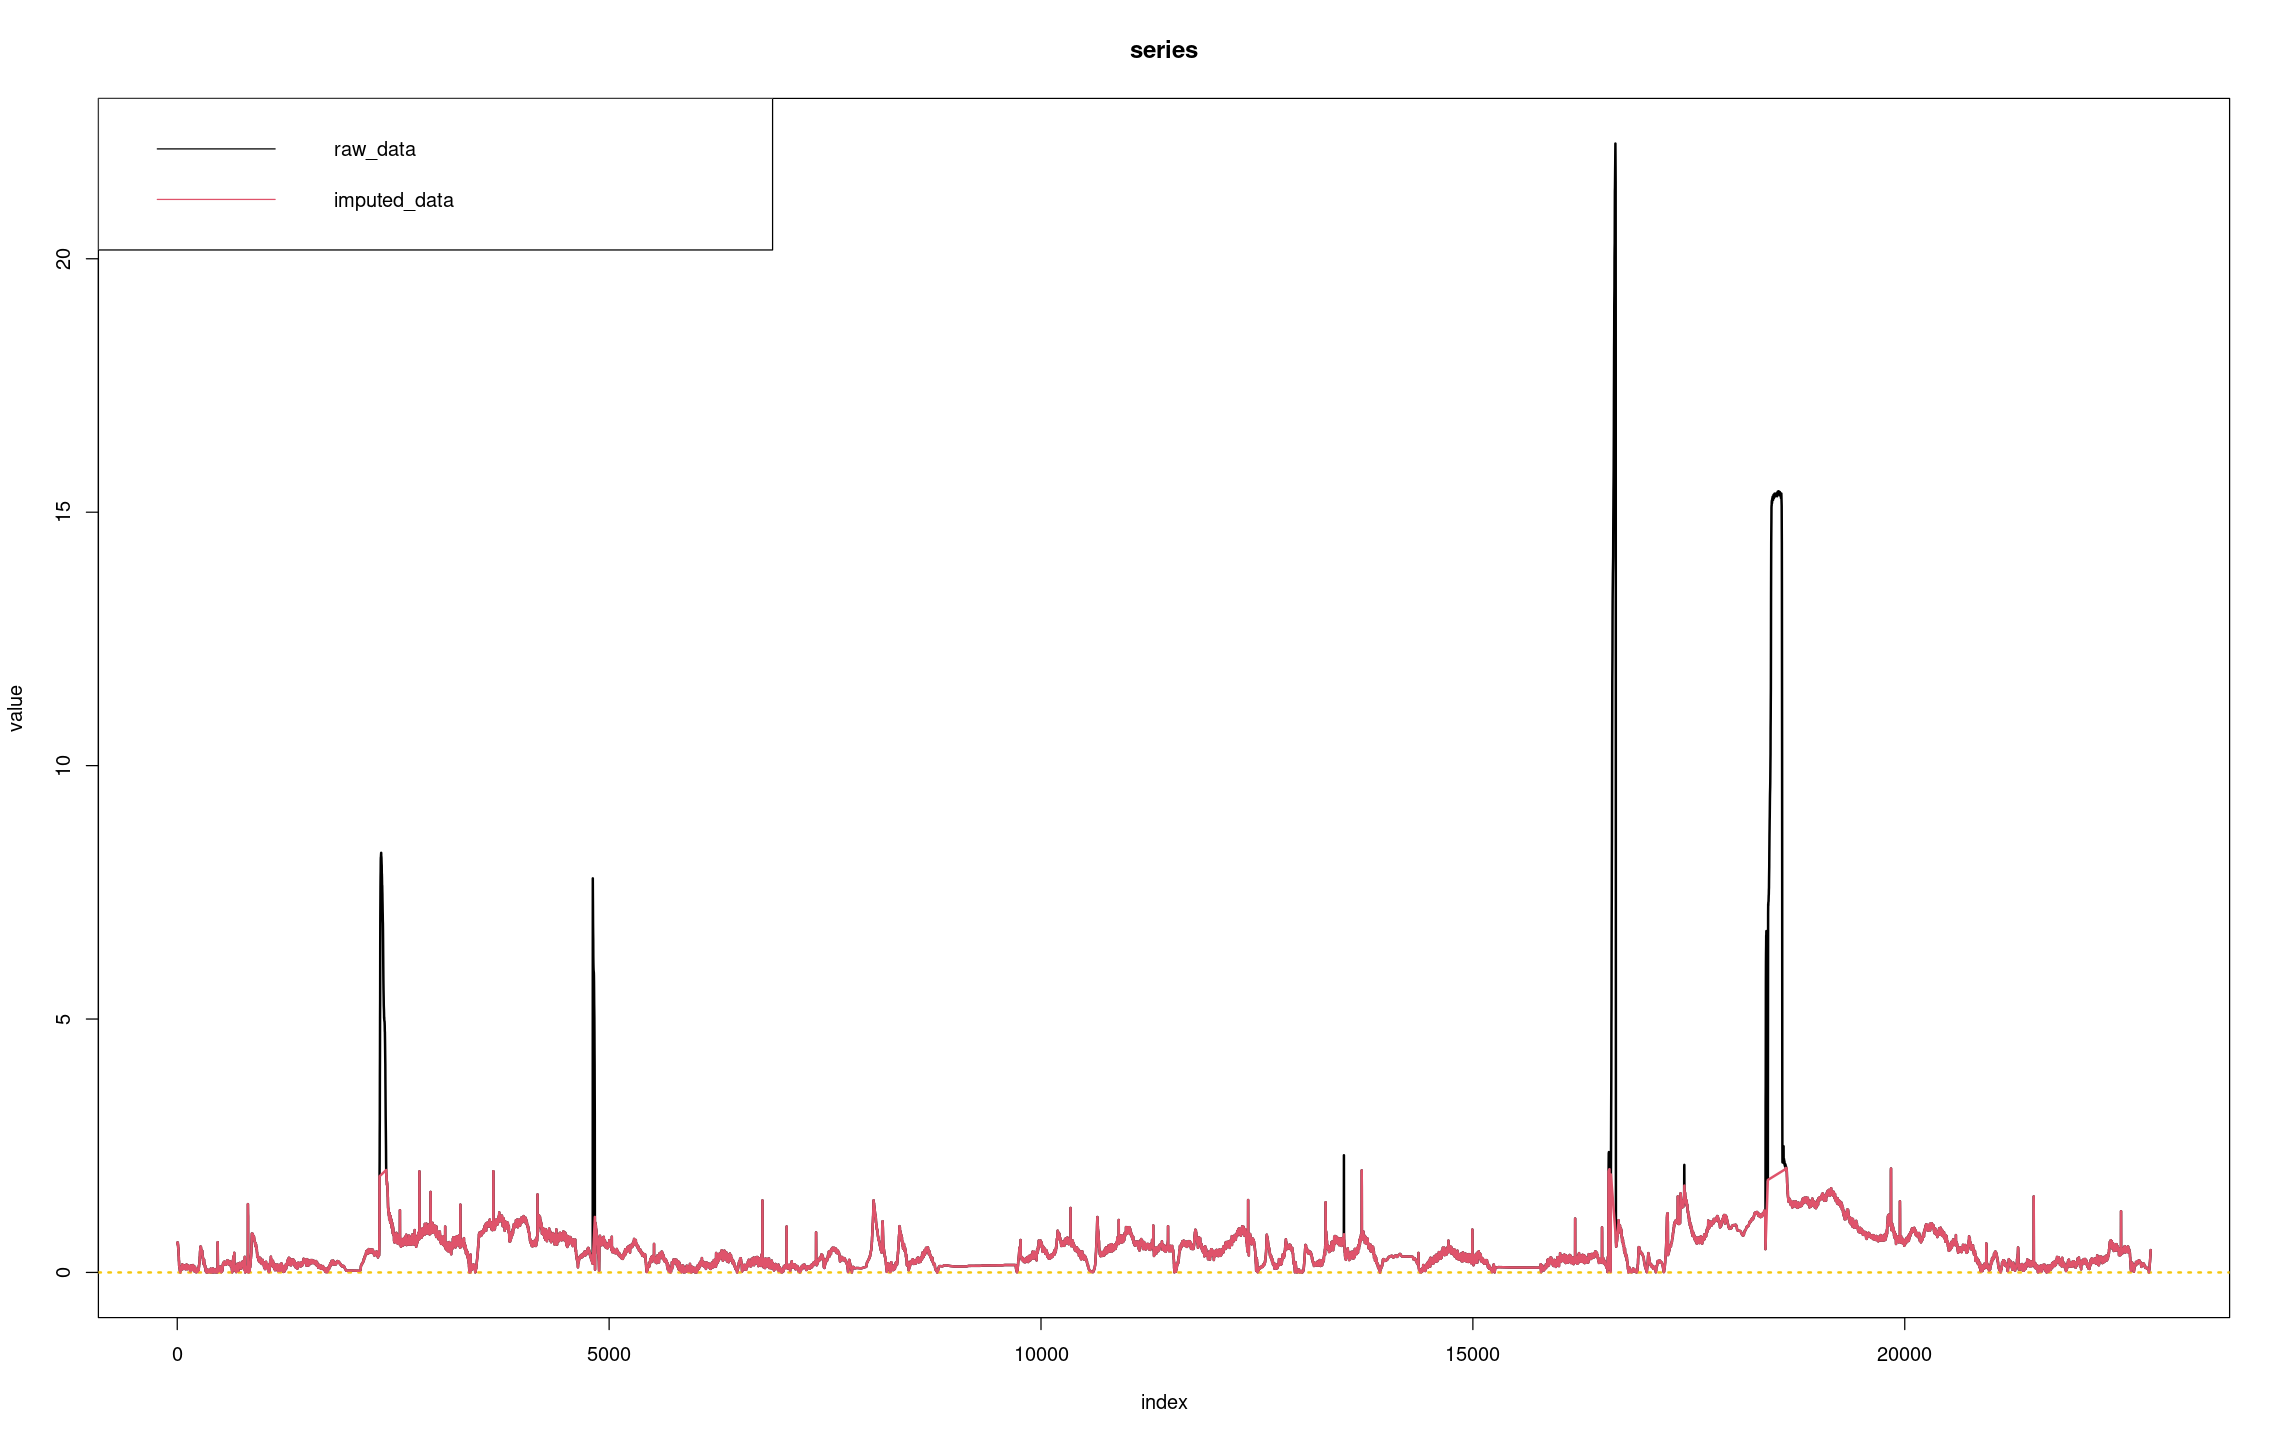

In [35]:
plot(data_lateral_error_abs_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "value", 
     xlab = "index",
     main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(data_lateral_error_abs_object$imputed_data, col = 2, lwd = 2)
legend("topleft", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

## longitudinal_error_abs

In [36]:
data_longitudinal_error_abs_object <- impute_outliers(x = data$longitudinal_error_abs, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = method)

In [37]:
print(names(data_longitudinal_error_abs_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [38]:
print(data_longitudinal_error_abs_object$outlier_positions)

  [1]  2350  2351  2352  2353  2354  2355  2356  2357  2358  2359  2360  2361
 [13]  2362  2363  2364  4811  4812  4813  4814  4815  4816  4817  4818  4819
 [25]  4820  4821  4822  4823  4824  4825  4826  4827  4828  4829  4830  4831
 [37]  4832  4833  4834  4835  4836  4837  4838  4839  4840  4841  4842  4843
 [49]  4844  4845  4846  4847  4848  4849  4850  4851  4852  4853  4854  4855
 [61]  4856  4857  4858 16562 16563 16564 16565 16566 16567 16568 16587 16588
 [73] 16589 16590 16591 16592 16593 16608 16609 16610 16611 16612 16613 16614
 [85] 16615 16616 16617 16618 16619 16620 16621 16622 16623 16624 16625 16626
 [97] 16627 16628 16629 16630 16631 16632 16633 16634 16635 16636 16637 16638
[109] 16639 16640 16641 16642 16643 16644 16645 16646 16647 16648 16649 16650
[121] 16651 16652 16653 16654 16655 18388 18389 18390 18391 18392 18393 18394
[133] 18395 18396 18397 18398 18399 18400 18401 18402 18403 18404 18405 18406
[145] 18407 18408 18409 18410 18411 18412 18413 18414 18415 1841

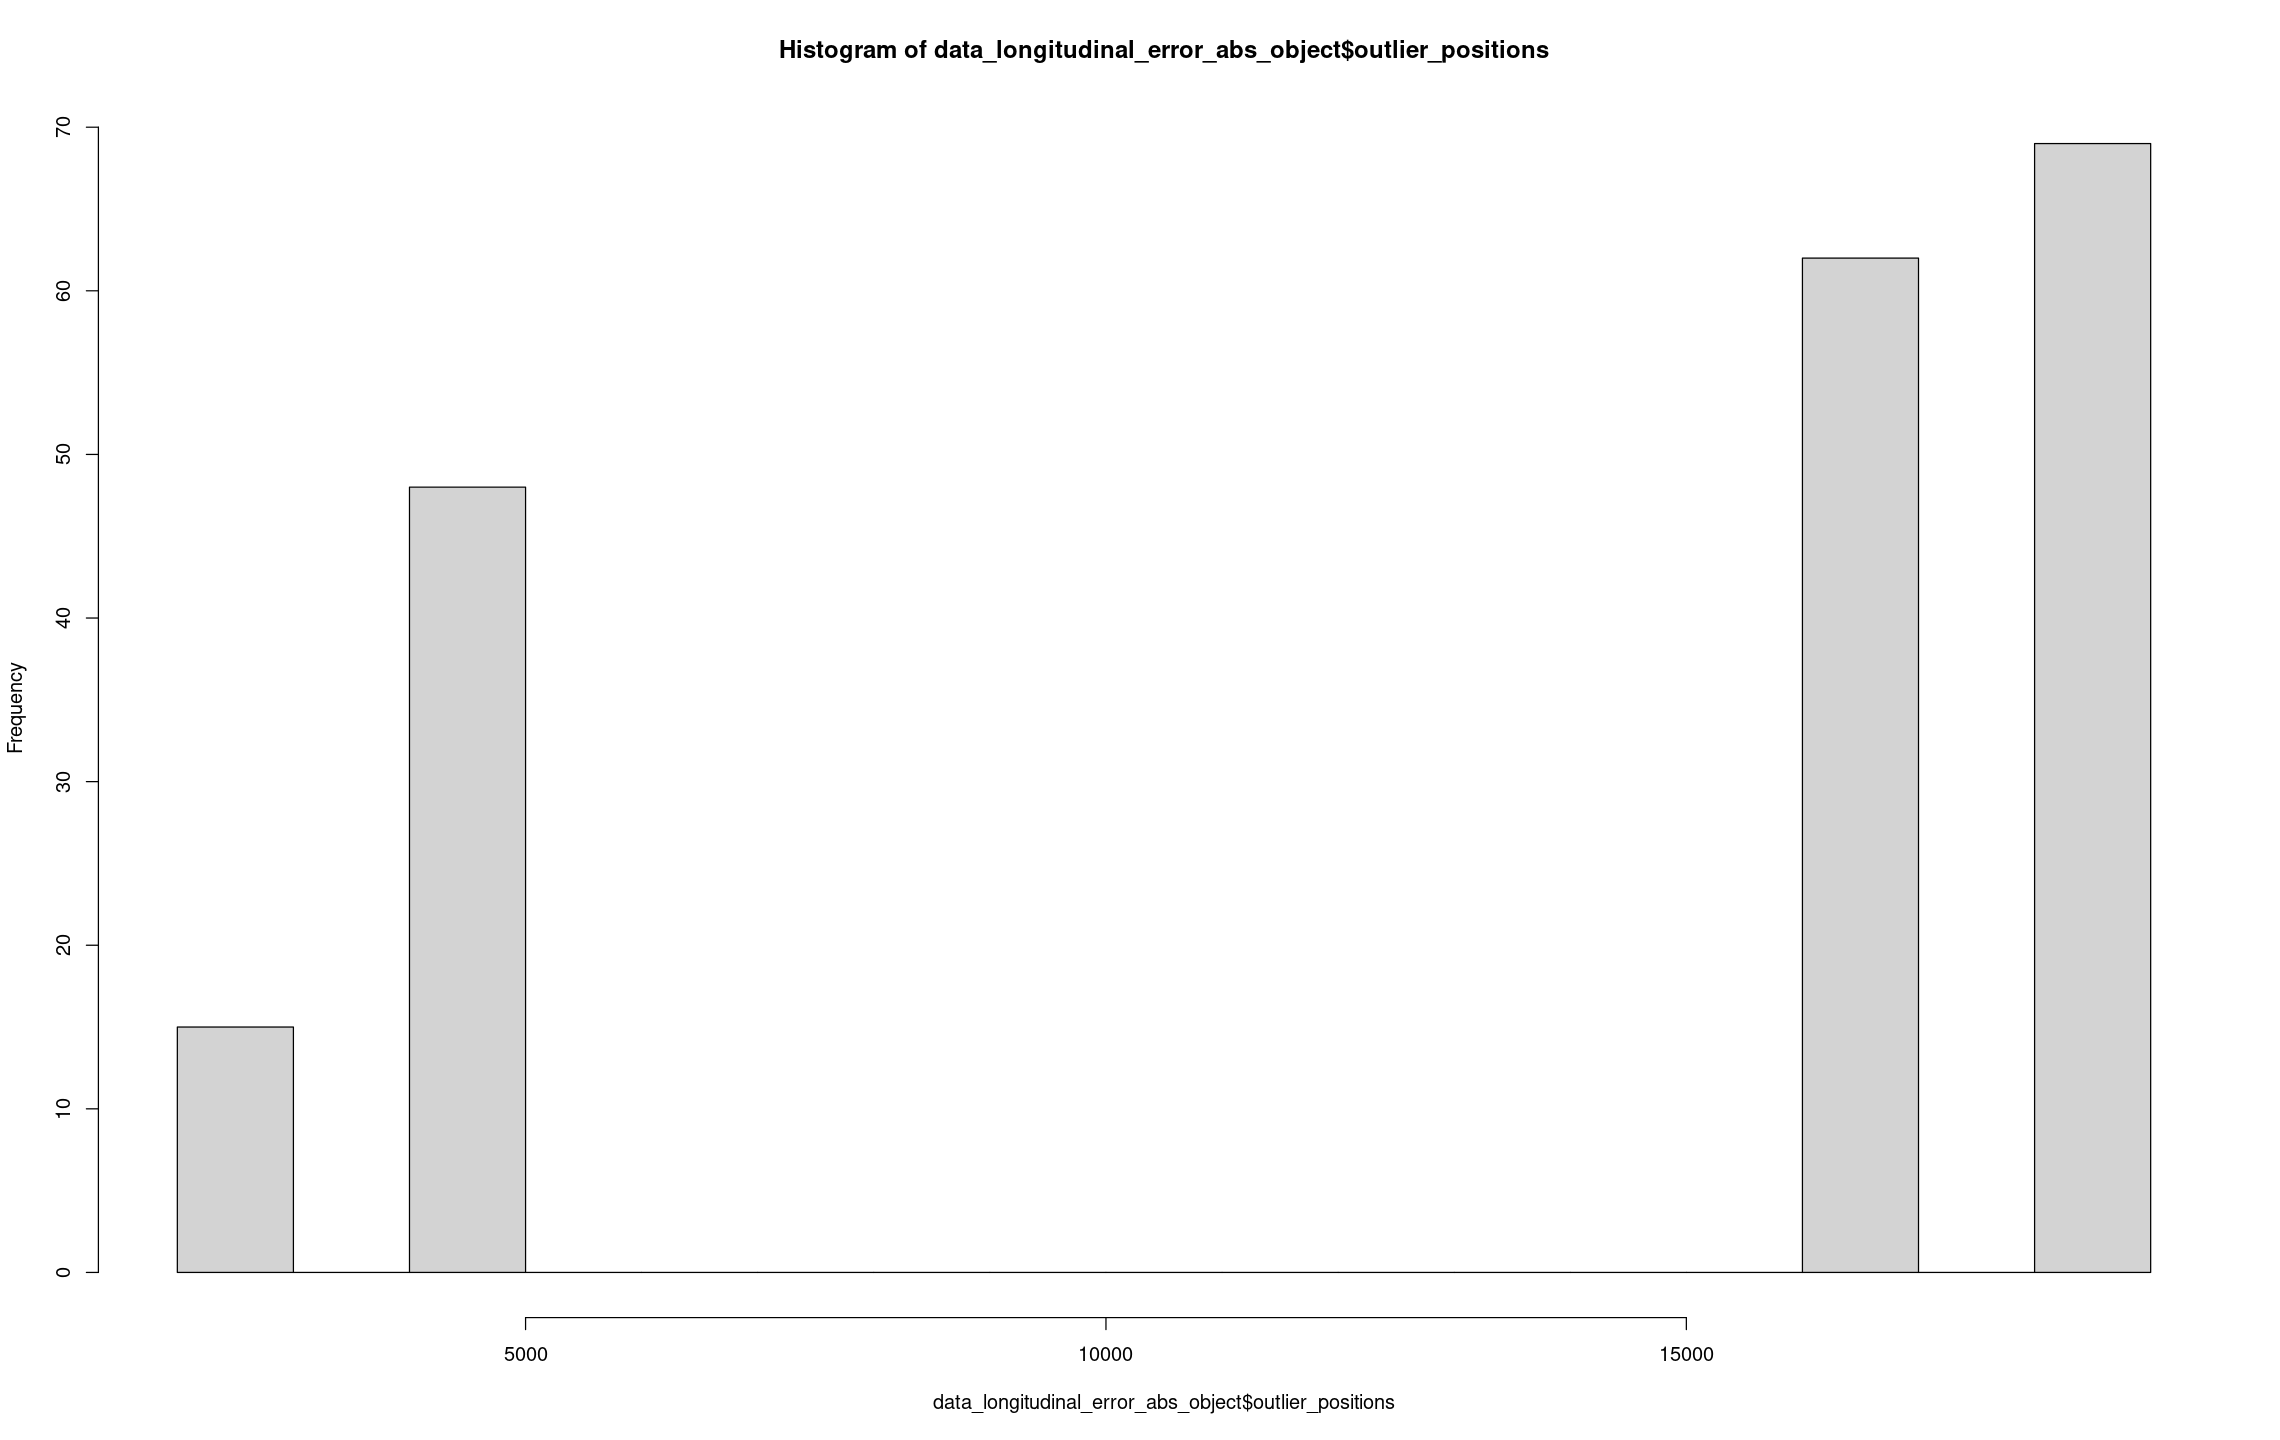

In [39]:
hist(data_longitudinal_error_abs_object$outlier_positions, nclass = 20)

------------------------------------------------------------------------------ 
data_longitudinal_error_abs_object$imputed_data (numeric)

        length             n           NAs        unique            0s'
        22'847        22'847             0        22'577             0
                      100.0%          0.0%                        0.0%
                                                                      
           .05           .10           .25        median           .75
  0.0074603134  0.0154925453  0.0475802422  0.1227819473  0.2788398862
                                                                      
         range            sd         vcoef           mad           IQR
  0.9709456442  0.1857970475  0.9840680665  0.1407271908  0.2312596440
                                                                      
          mean        meanCI
  0.1888050774  0.1863957528
                0.1912144020
                            
           .90           .95
  0.4

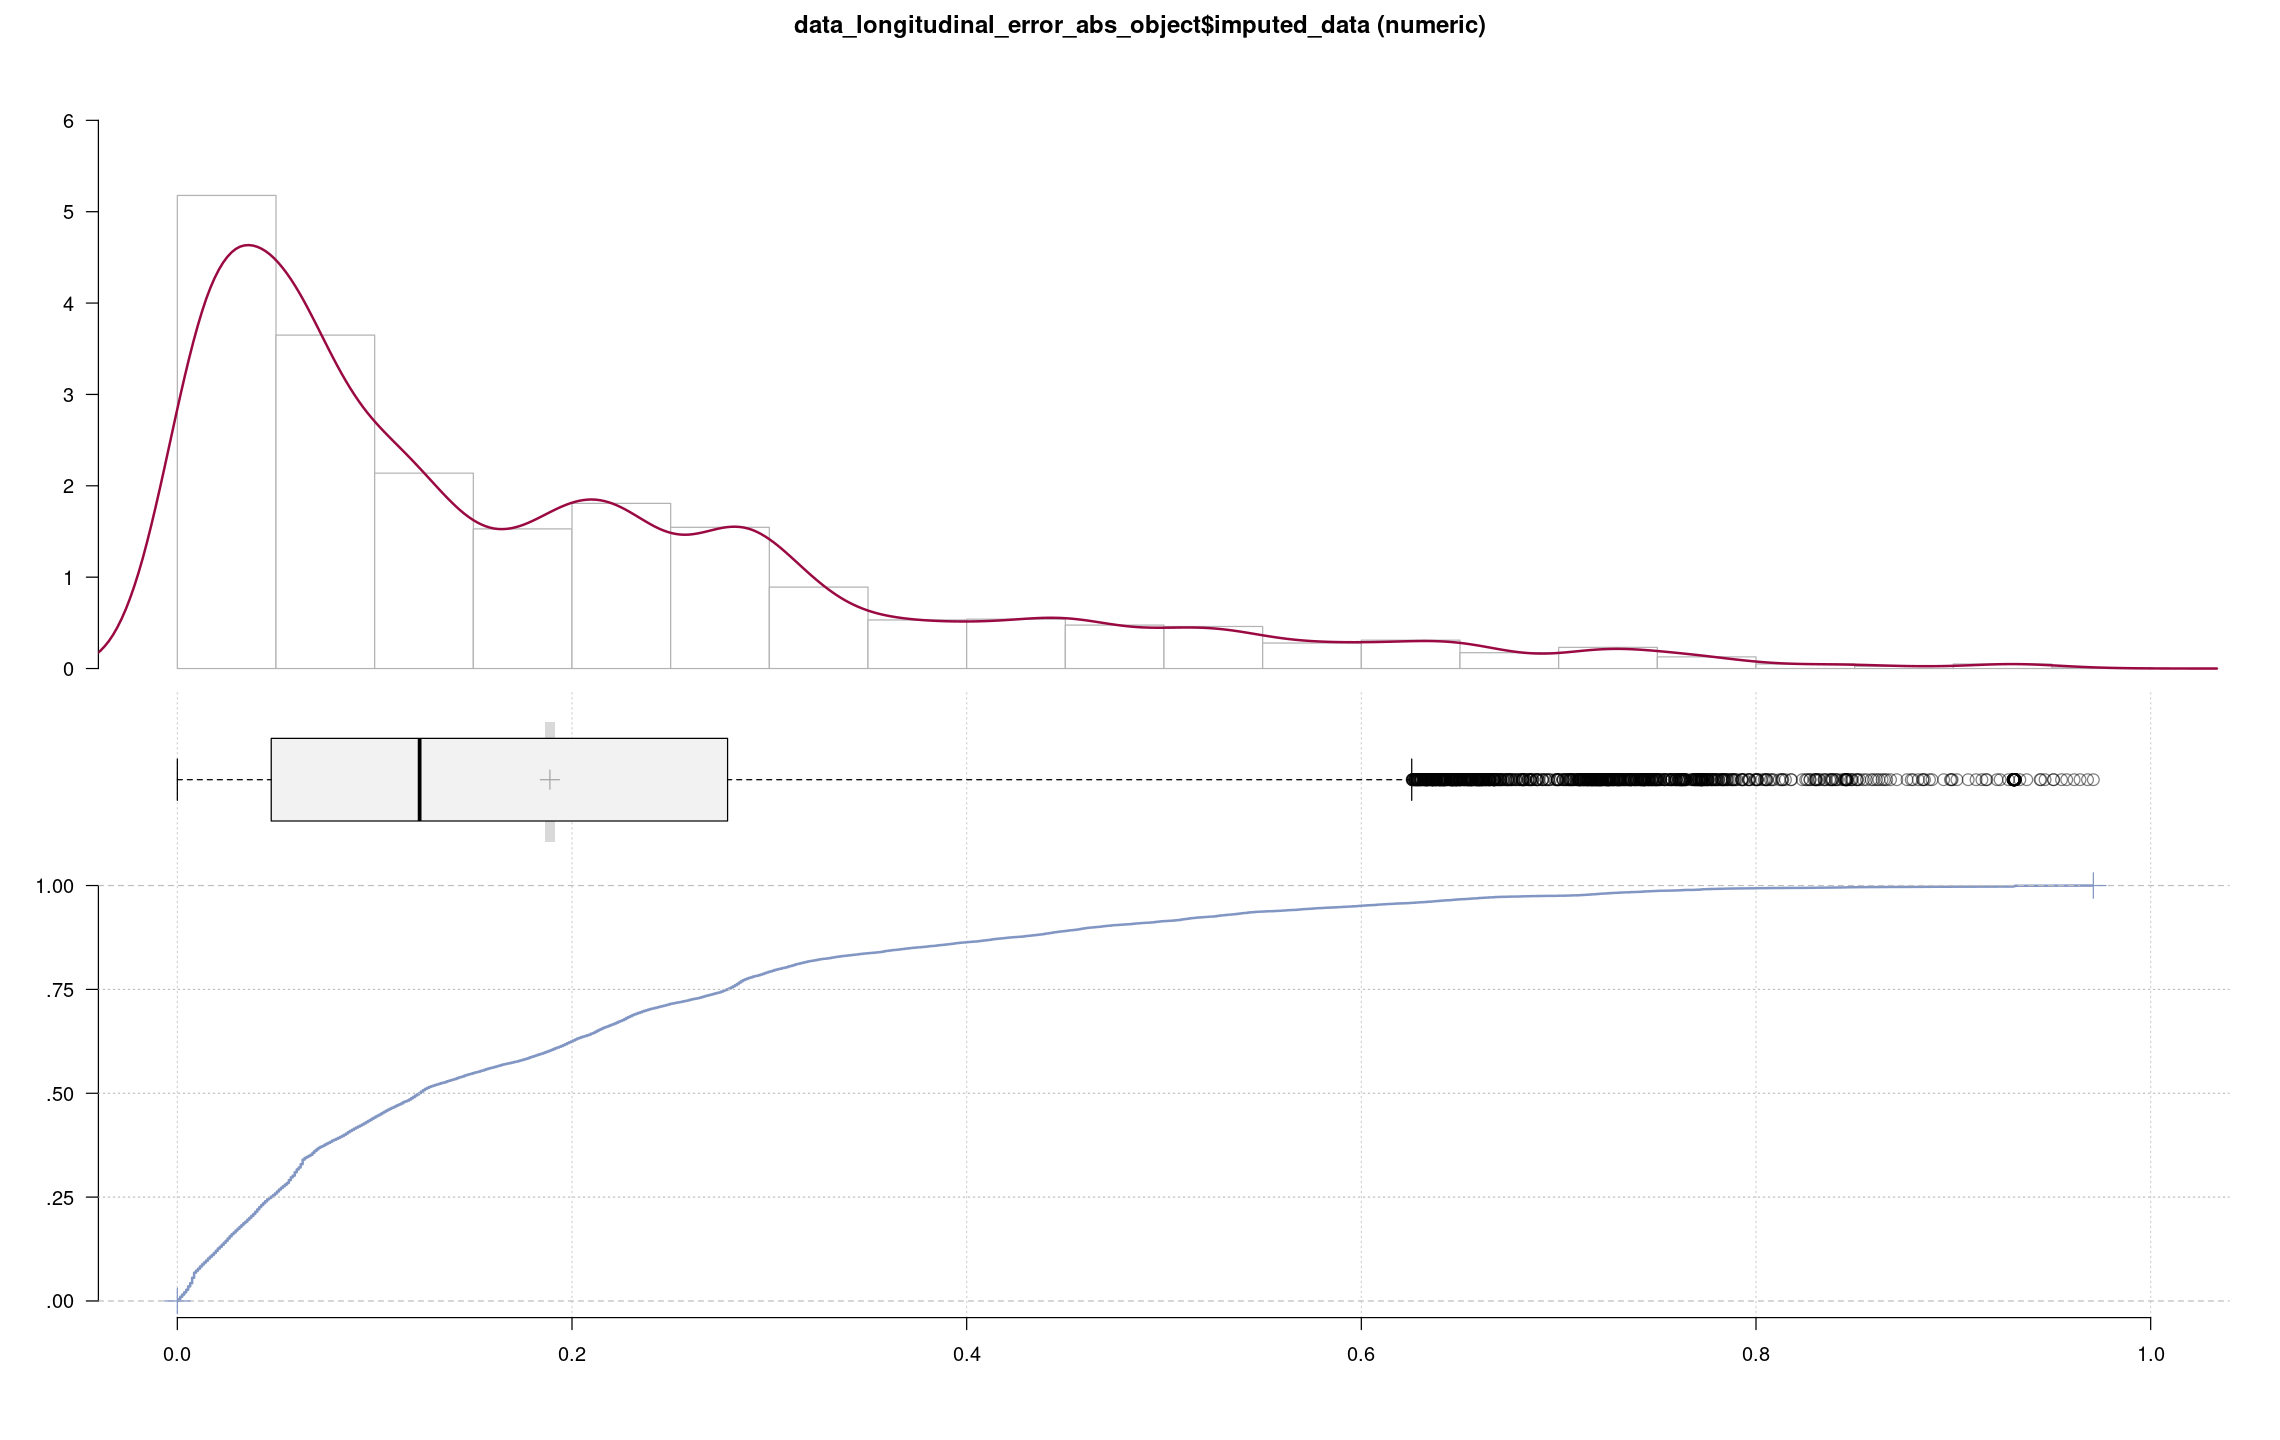

In [40]:
Desc(data_longitudinal_error_abs_object$imputed_data)

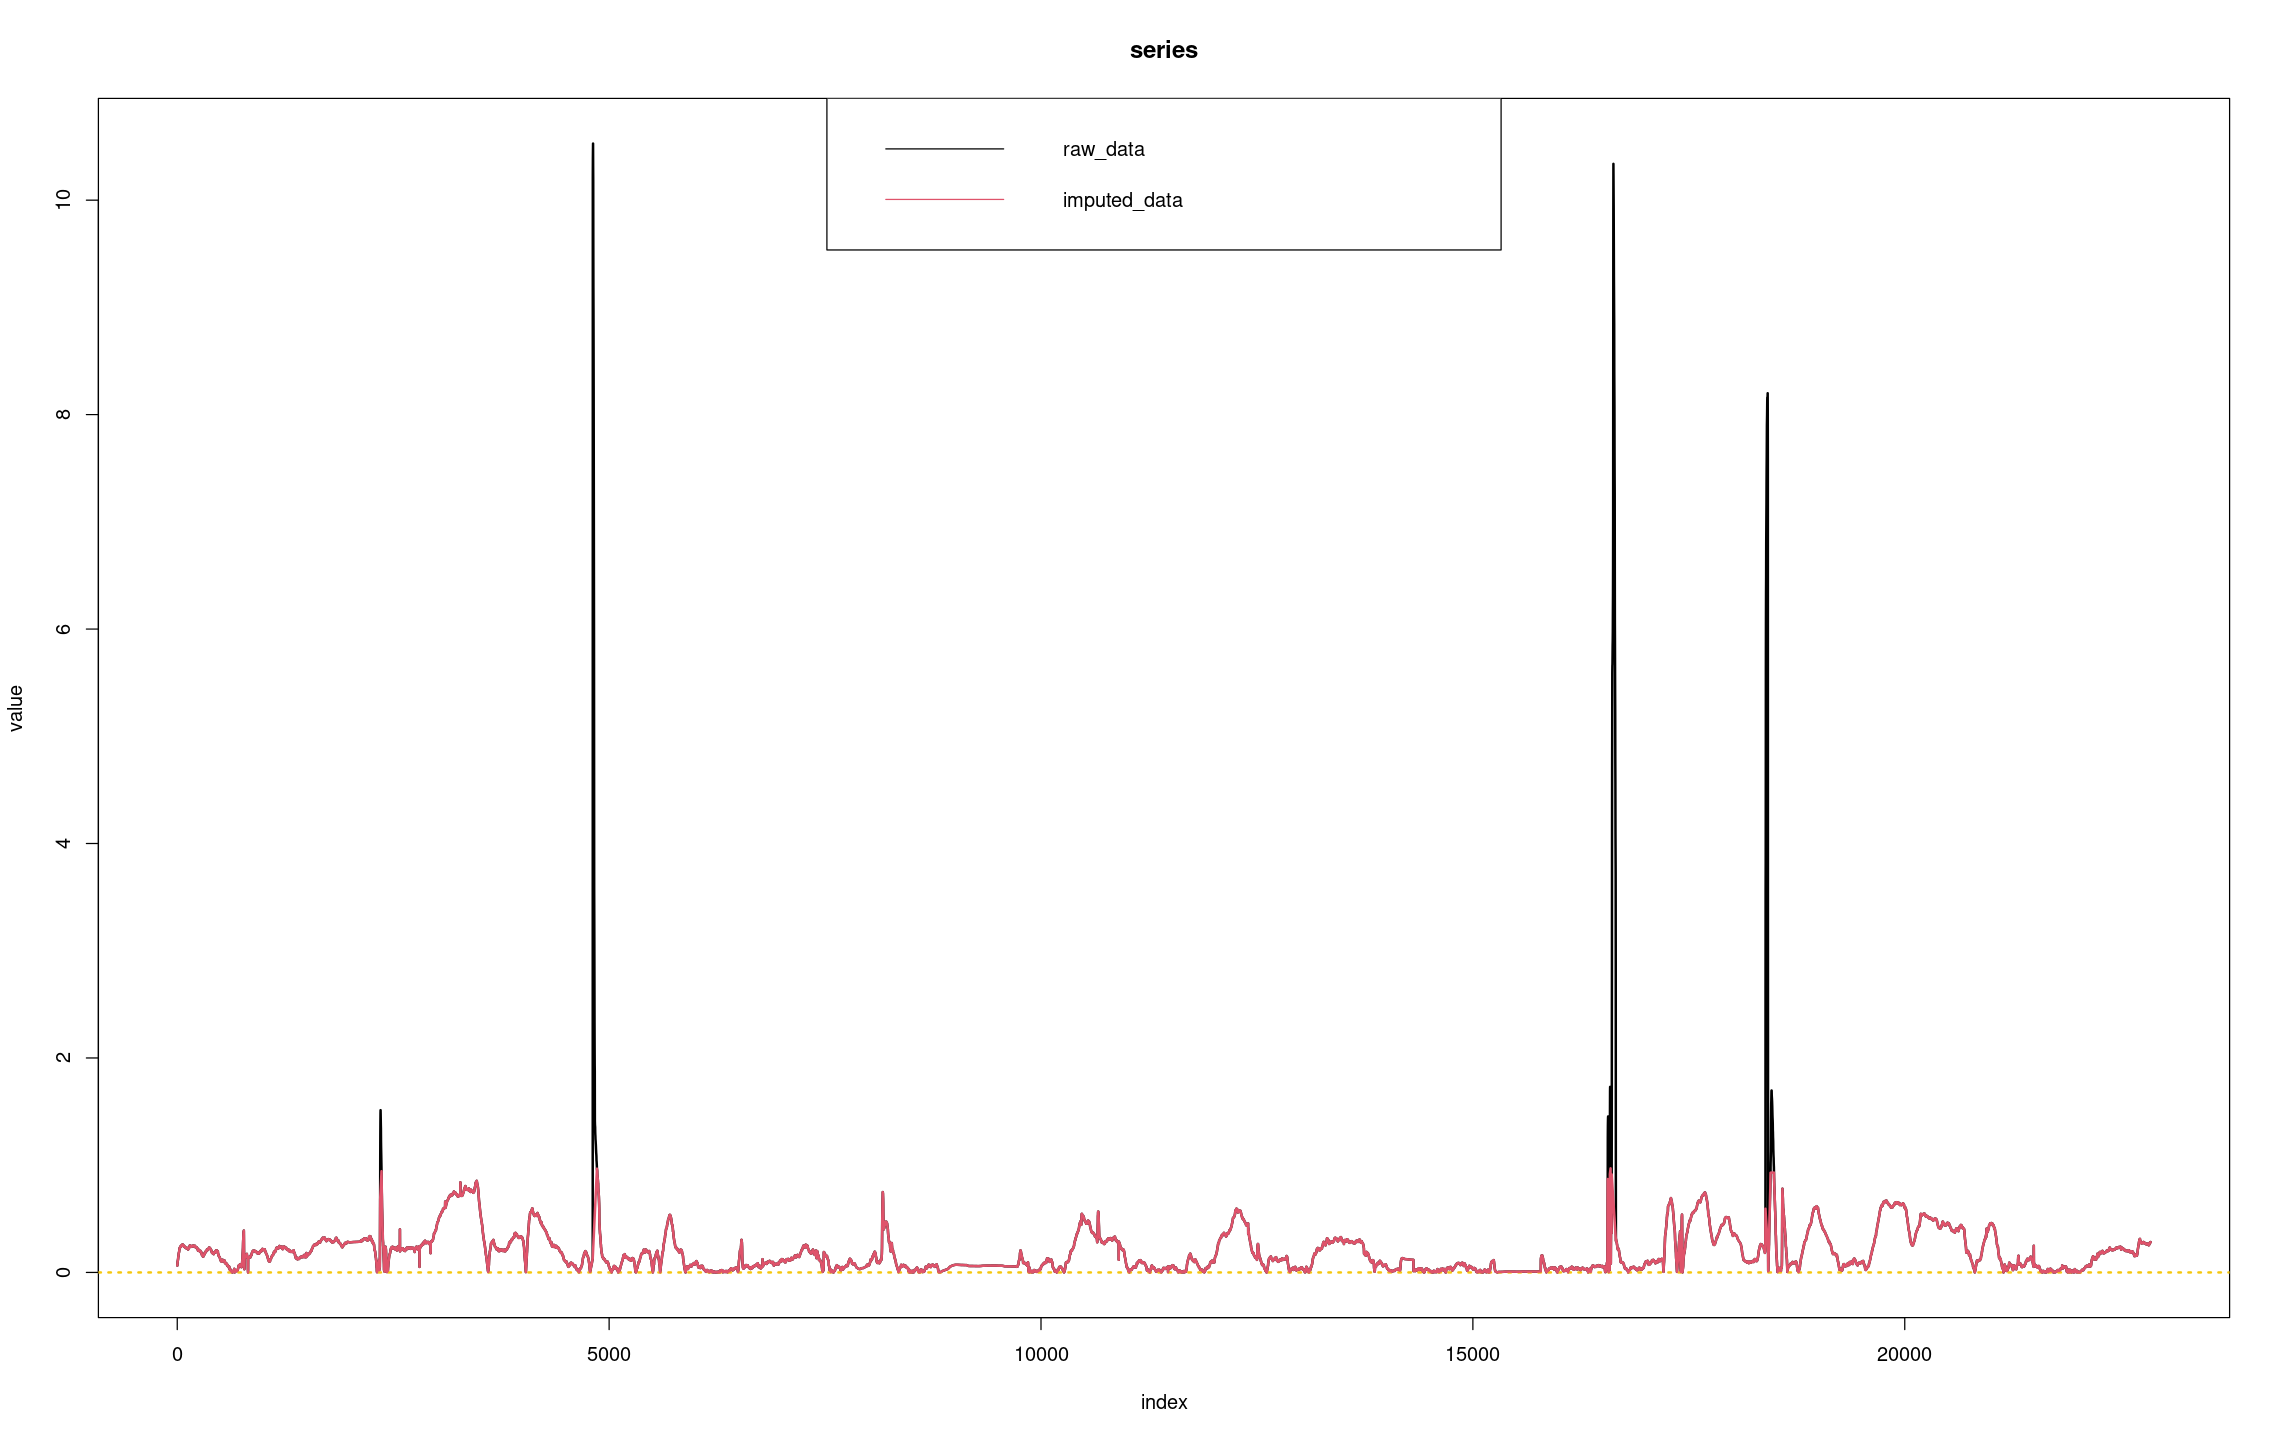

In [41]:
plot(data_longitudinal_error_abs_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "value", 
     xlab = "index",
     main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(data_longitudinal_error_abs_object$imputed_data, col = 2, lwd = 2)
legend("top", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)


## haversine_error_abs

In [42]:
data_haversine_error_abs_object <- impute_outliers(x = data$haversine_error_abs, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = method)

In [43]:
print(names(data_haversine_error_abs_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [44]:
print(data_haversine_error_abs_object$outlier_positions)

  [1]  2344  2345  2346  2347  2348  2349  2350  2351  2352  2353  2354  2355
 [13]  2356  2357  2358  2359  2360  2361  2362  2363  2364  2365  2366  2367
 [25]  2368  2369  2370  2371  2372  2373  2374  2375  2376  2377  2378  2379
 [37]  2380  2381  2382  2383  2384  2385  2386  2387  2388  2389  2390  2391
 [49]  2392  2393  2394  2395  2396  2397  2398  2399  2400  2401  2402  2403
 [61]  2404  2405  2406  2407  2408  2409  2410  2411  2412  2413  2414  2415
 [73]  2416  2417  4811  4812  4813  4814  4815  4816  4817  4818  4819  4820
 [85]  4821  4822  4823  4824  4825  4826  4827  4828  4829  4830  4831  4832
 [97]  4833  4834 13507 16573 16574 16575 16576 16577 16599 16600 16601 16602
[109] 16603 16604 16605 16606 16607 16608 16609 16610 16611 16612 16613 16614
[121] 16615 16616 16617 16618 16619 16620 16621 16622 16623 16624 16625 16626
[133] 16627 16628 16629 16630 16631 16632 16633 16634 16635 16636 16637 16638
[145] 16639 16640 16641 16642 16643 16644 16645 16646 16647 1664

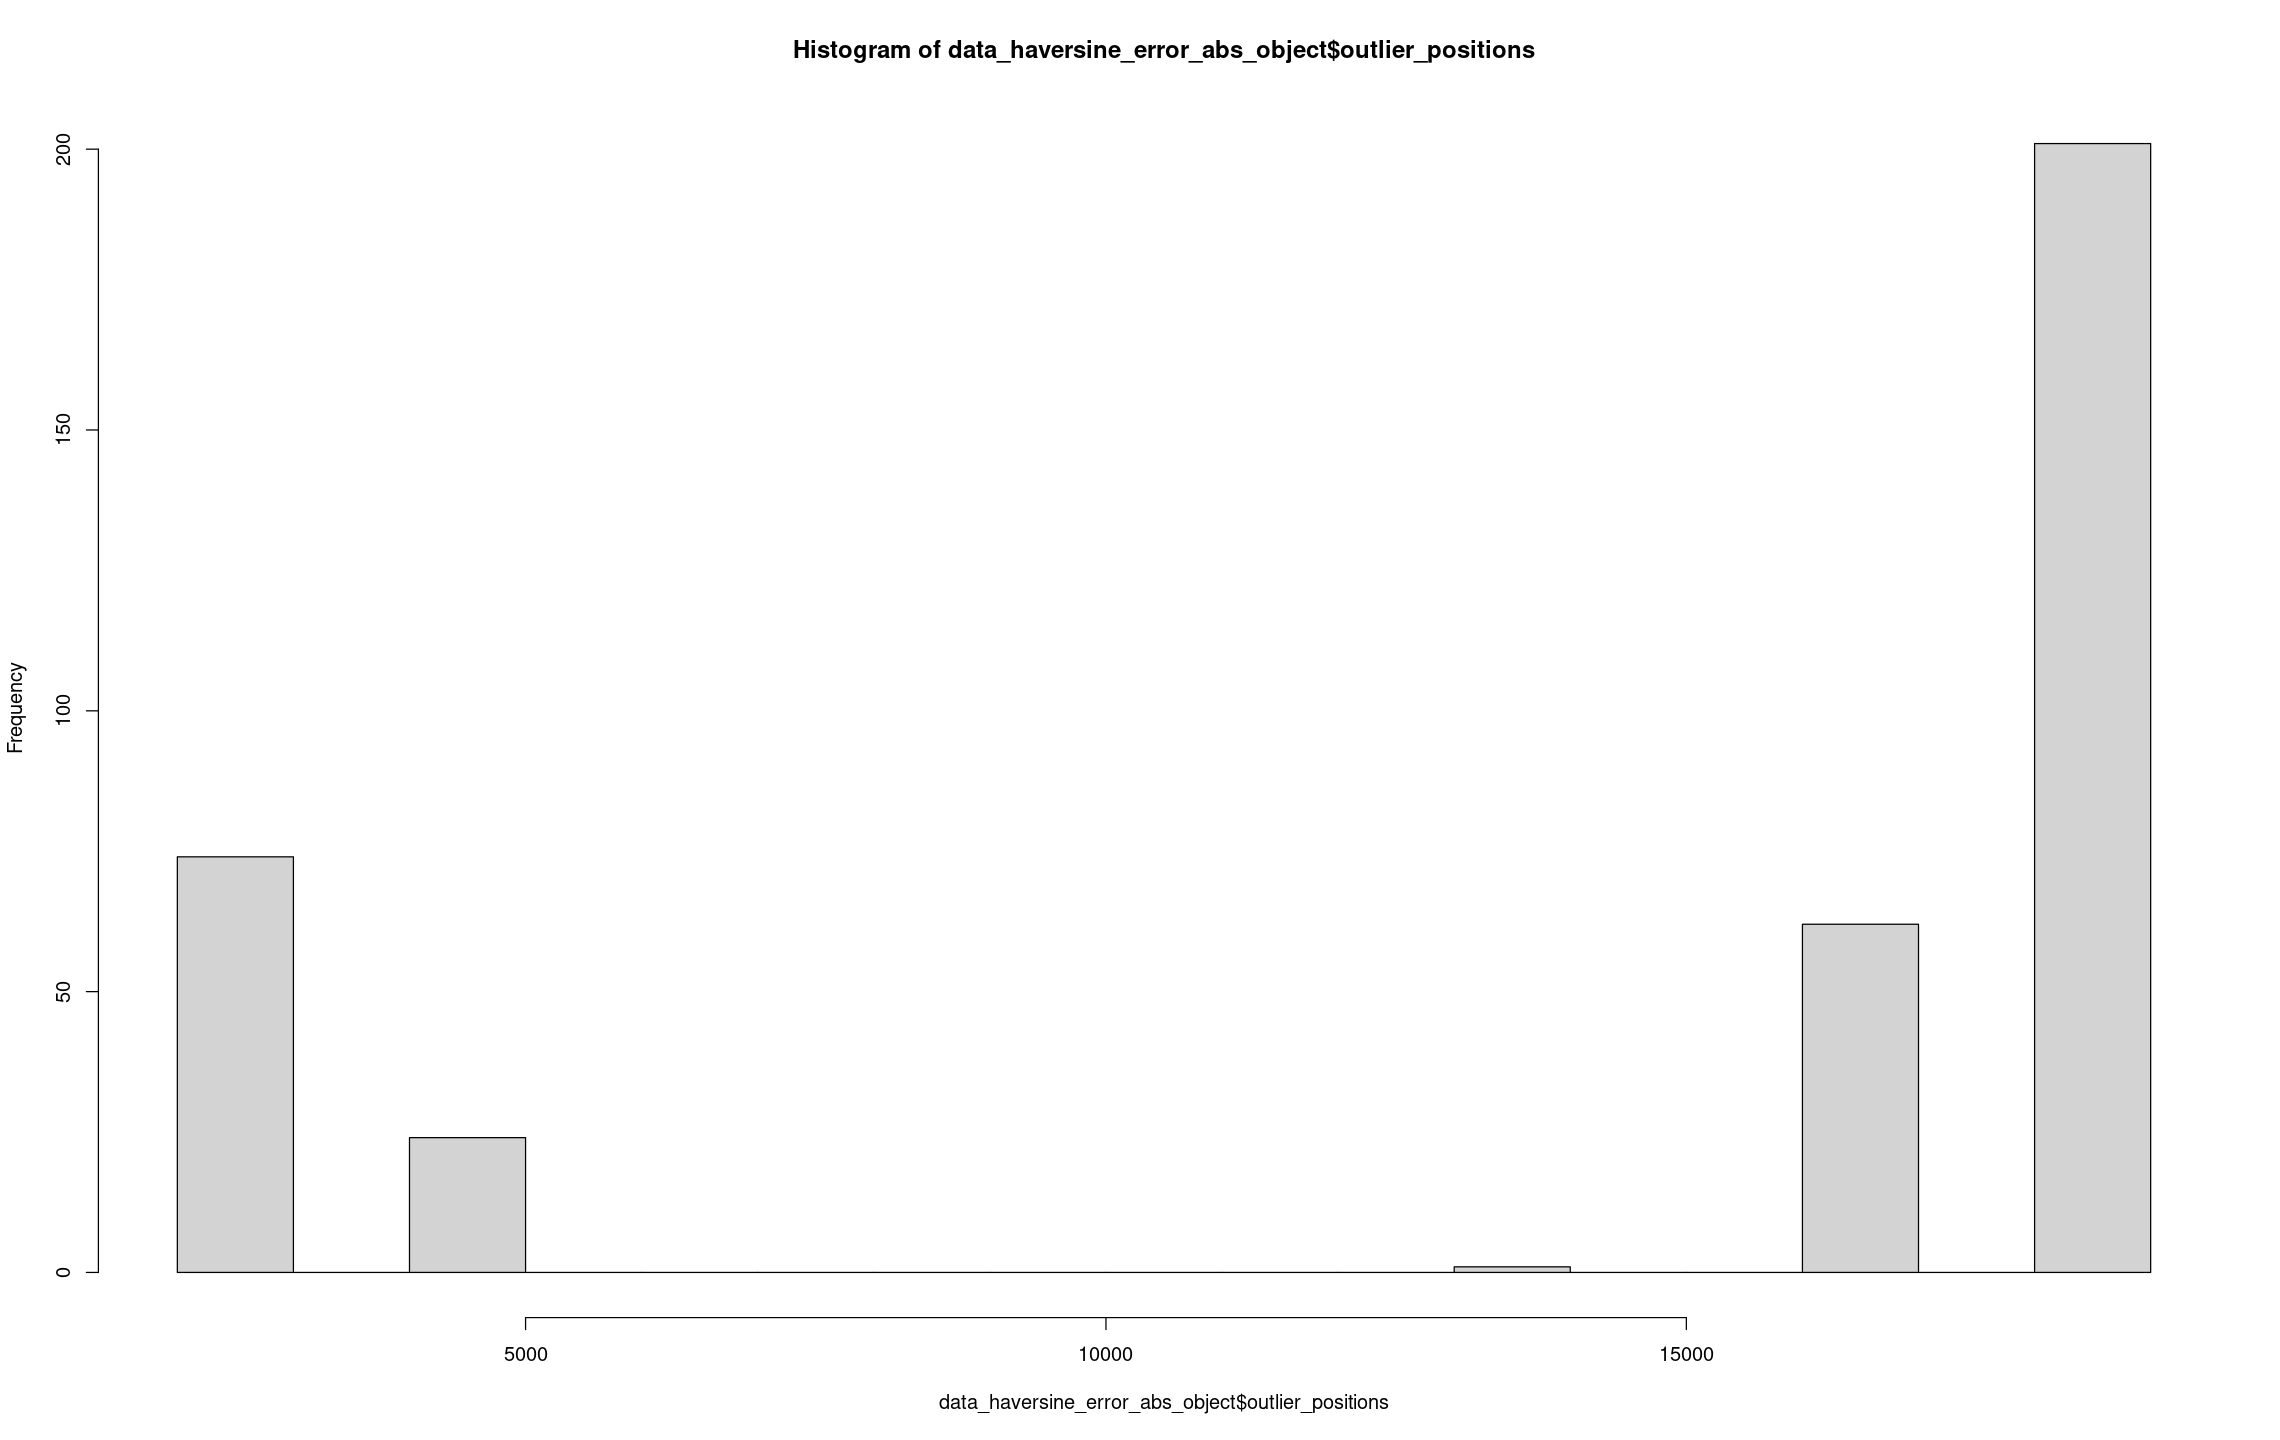

In [45]:
hist(data_haversine_error_abs_object$outlier_positions, nclass = 20)

------------------------------------------------------------------------------ 
data_haversine_error_abs_object$imputed_data (numeric)

       length            n          NAs       unique           0s         mean'
       22'847       22'847            0       22'574            0  0.507312999
                    100.0%         0.0%                      0.0%             
                                                                              
          .05          .10          .25       median          .75          .90
  0.097783819  0.133217523  0.215461470  0.371097744  0.736527413  1.020905614
                                                                              
        range           sd        vcoef          mad          IQR         skew
  2.298159415  0.390421161  0.769586353  0.316238255  0.521065943  1.386604977
                                                                              
       meanCI
  0.502250210
  0.512375788
             
          .95
  1

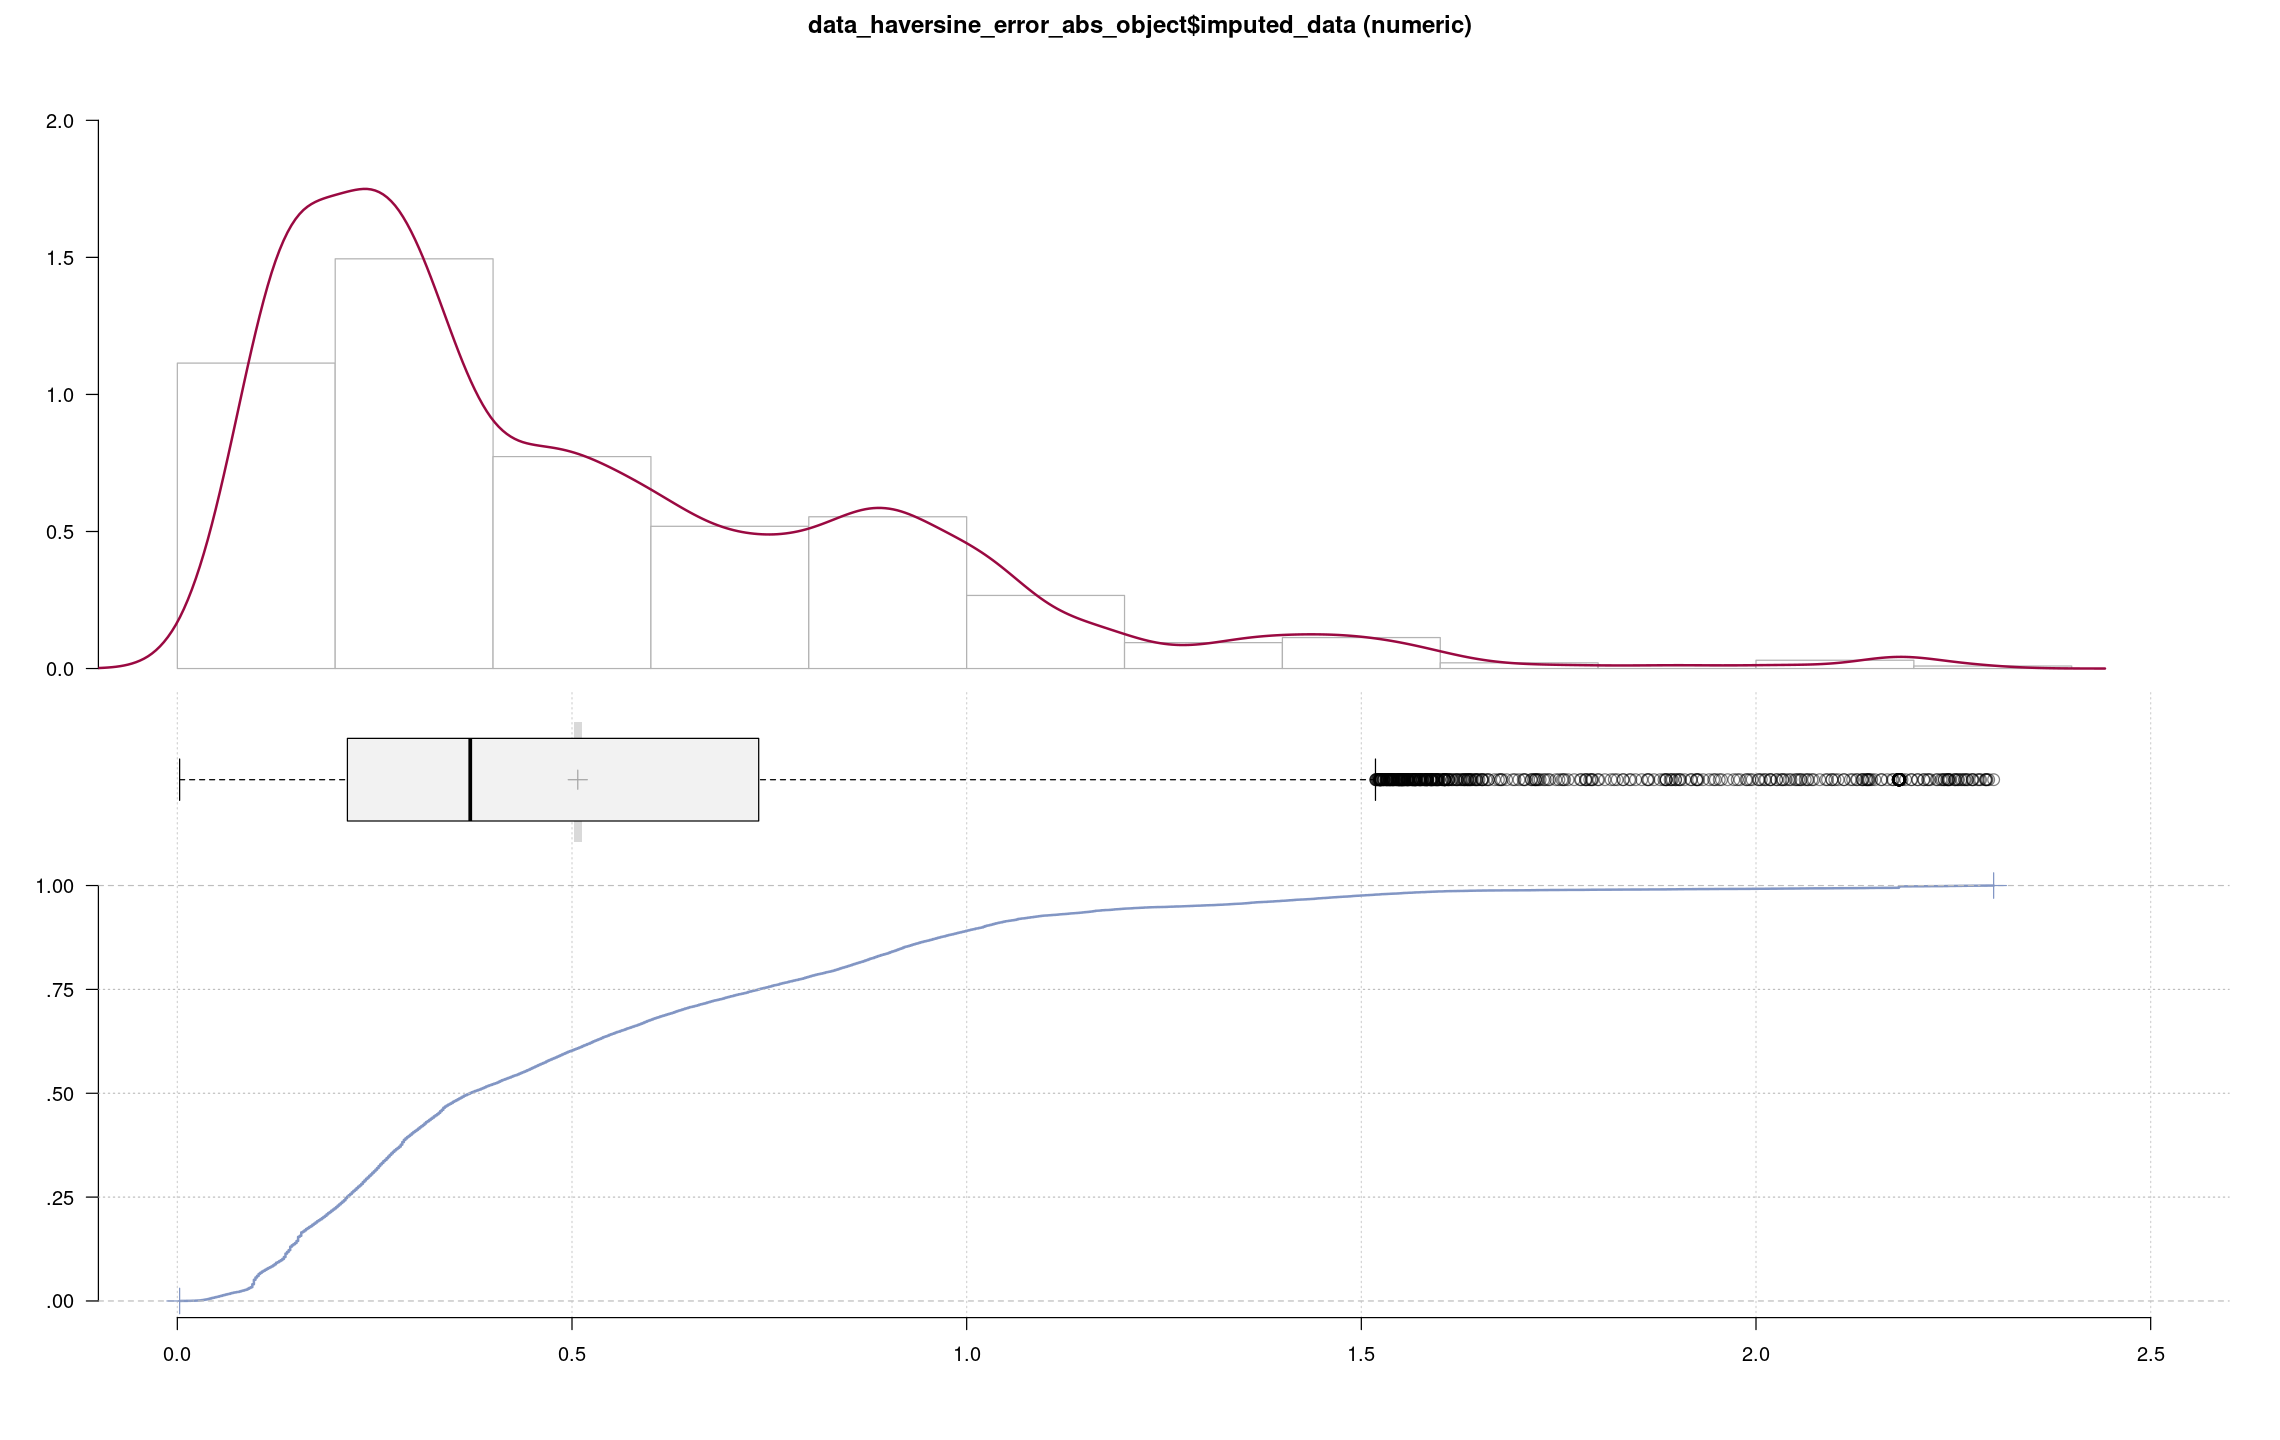

In [46]:
Desc(data_haversine_error_abs_object$imputed_data)

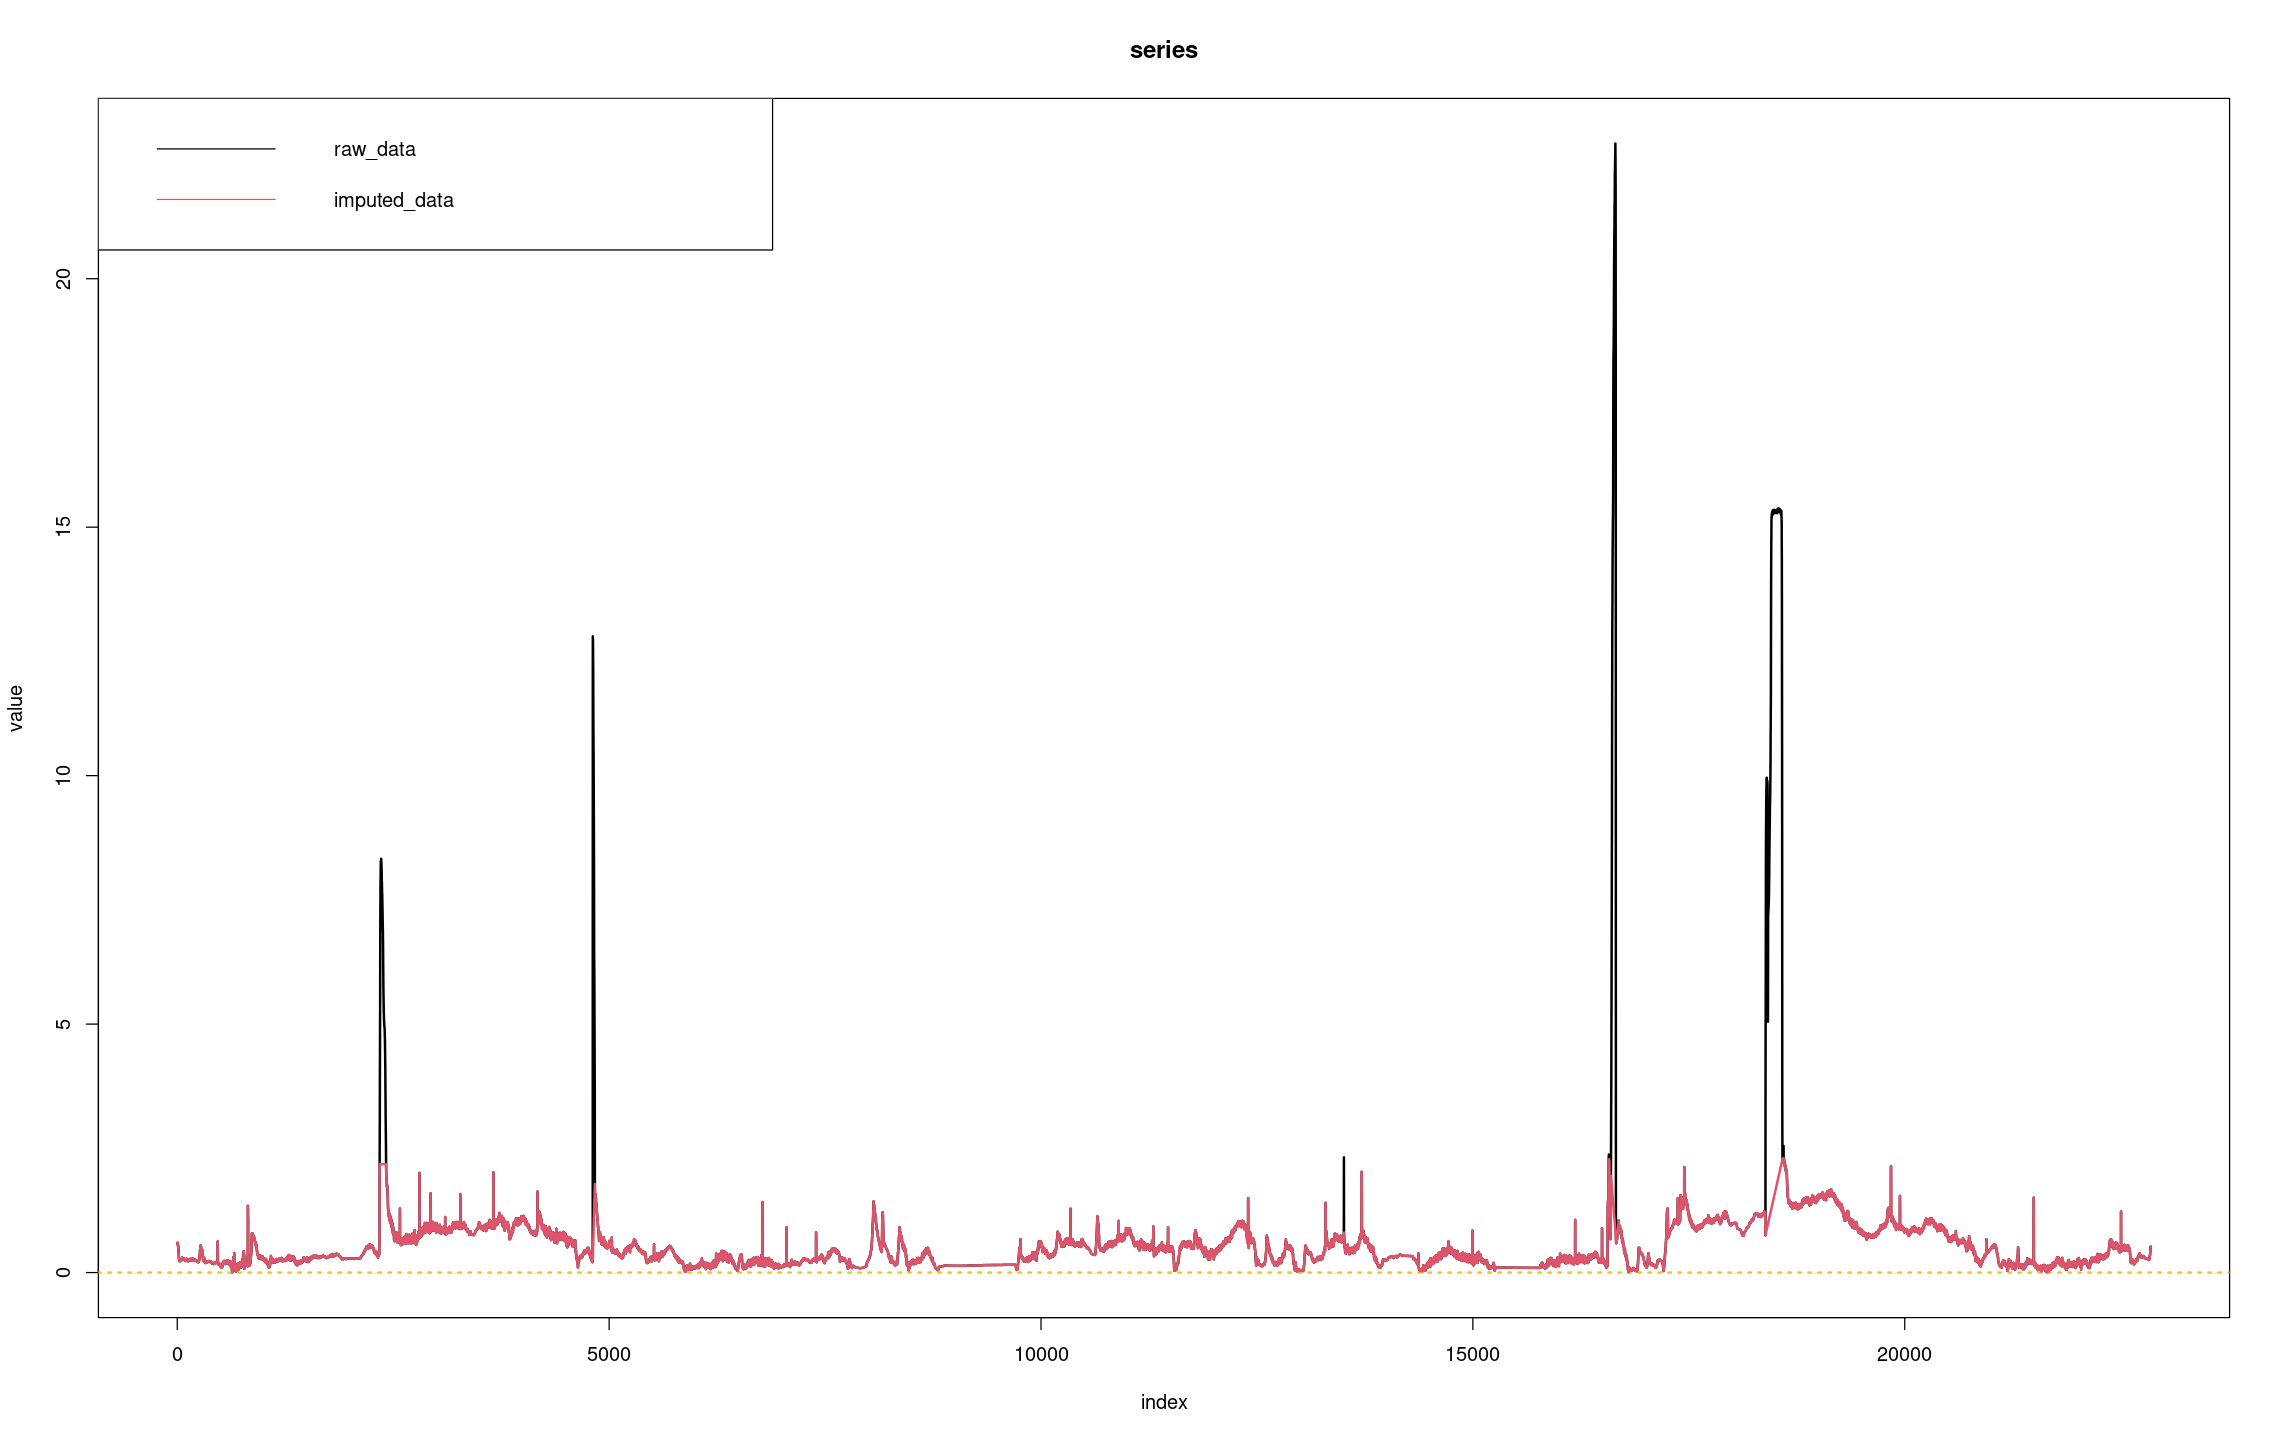

In [47]:
plot(data_haversine_error_abs_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "value", 
     xlab = "index",
     main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(data_haversine_error_abs_object$imputed_data, col = 2, lwd = 2)
legend("topleft", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

## Outlier positions

In [48]:
outlier_positions <- c(data_lateral_error_object$outlier_positions,
                      data_longitudinal_error_object$outlier_positions,
                      data_haversine_error_object$outlier_positions,
                      data_lateral_error_abs_object$outlier_positions,
                      data_longitudinal_error_abs_object$outlier_positions,
                      data_haversine_error_abs_object$outlier_positions)

outlier_positions <- sort(unique(outlier_positions))

In [49]:
print(outlier_positions)

  [1]  2343  2344  2345  2346  2347  2348  2349  2350  2351  2352  2353  2354
 [13]  2355  2356  2357  2358  2359  2360  2361  2362  2363  2364  2365  2366
 [25]  2367  2368  2369  2370  2371  2372  2373  2374  2375  2376  2377  2378
 [37]  2379  2380  2381  2382  2383  2384  2385  2386  2387  2388  2389  2390
 [49]  2391  2392  2393  2394  2395  2396  2397  2398  2399  2400  2401  2402
 [61]  2403  2404  2405  2406  2407  2408  2409  2410  2411  2412  2413  2414
 [73]  2415  2416  2417  2418  3278  3279  3322  3323  3324  3325  3326  3327
 [85]  3328  3329  3330  3331  3332  3333  3334  3335  3336  3337  3338  3339
 [97]  3340  3341  3342  3343  3344  3345  3348  3350  3351  3352  3353  3354
[109]  3355  3356  3357  3358  3362  3363  3364  3365  3366  3367  3368  3369
[121]  3370  3371  3372  3373  3374  3375  3376  3377  3378  3387  3391  3392
[133]  3393  3394  3395  3442  3443  3444  3445  3446  3447  3448  3449  3450
[145]  3451  3452  3453  3454  3455  3456  3457  3458  3459  346

# Updated dataset

In [50]:
data$lateral_error_imputed <- data_lateral_error_object$imputed_data

In [51]:
data$longitudinal_error_imputed <- data_longitudinal_error_object$imputed_data

In [52]:
data$haversine_error_imputed <- data_haversine_error_object$imputed_data

In [53]:
data$lateral_error_abs_imputed <- data_lateral_error_abs_object$imputed_data

In [54]:
data$longitudinal_error_abs_imputed <- data_longitudinal_error_abs_object$imputed_data

In [55]:
data$haversine_error_abs_imputed <- data_haversine_error_abs_object$imputed_data

In [56]:
print(names(data))

 [1] "timestamp"                      "latitude"                      
 [3] "longitude"                      "velocity_latitude"             
 [5] "velocity_longitude"             "velocity"                      
 [7] "lateral_error"                  "longitudinal_error"            
 [9] "haversine_error"                "latitude_error"                
[11] "longitude_error"                "heading_error"                 
[13] "lateral_error_abs"              "longitudinal_error_abs"        
[15] "haversine_error_abs"            "latitude_error_abs"            
[17] "longitude_error_abs"            "heading_error_abs"             
[19] "area"                           "object"                        
[21] "name_airplane"                  "name_bench"                    
[23] "name_bench..group."             "name_bicycle"                  
[25] "name_bird"                      "name_bird..group."             
[27] "name_boat"                      "name_bus"                      
[29] "

In [57]:
destination <- "./applications/final_dataset_with_outliers_imputed_using_coefficient_iqr_3.csv"

In [58]:
xfun::in_dir(dir = path, expr = write.csv(x = data, file = destination, row.names = FALSE))

# Histograms of imputed variables

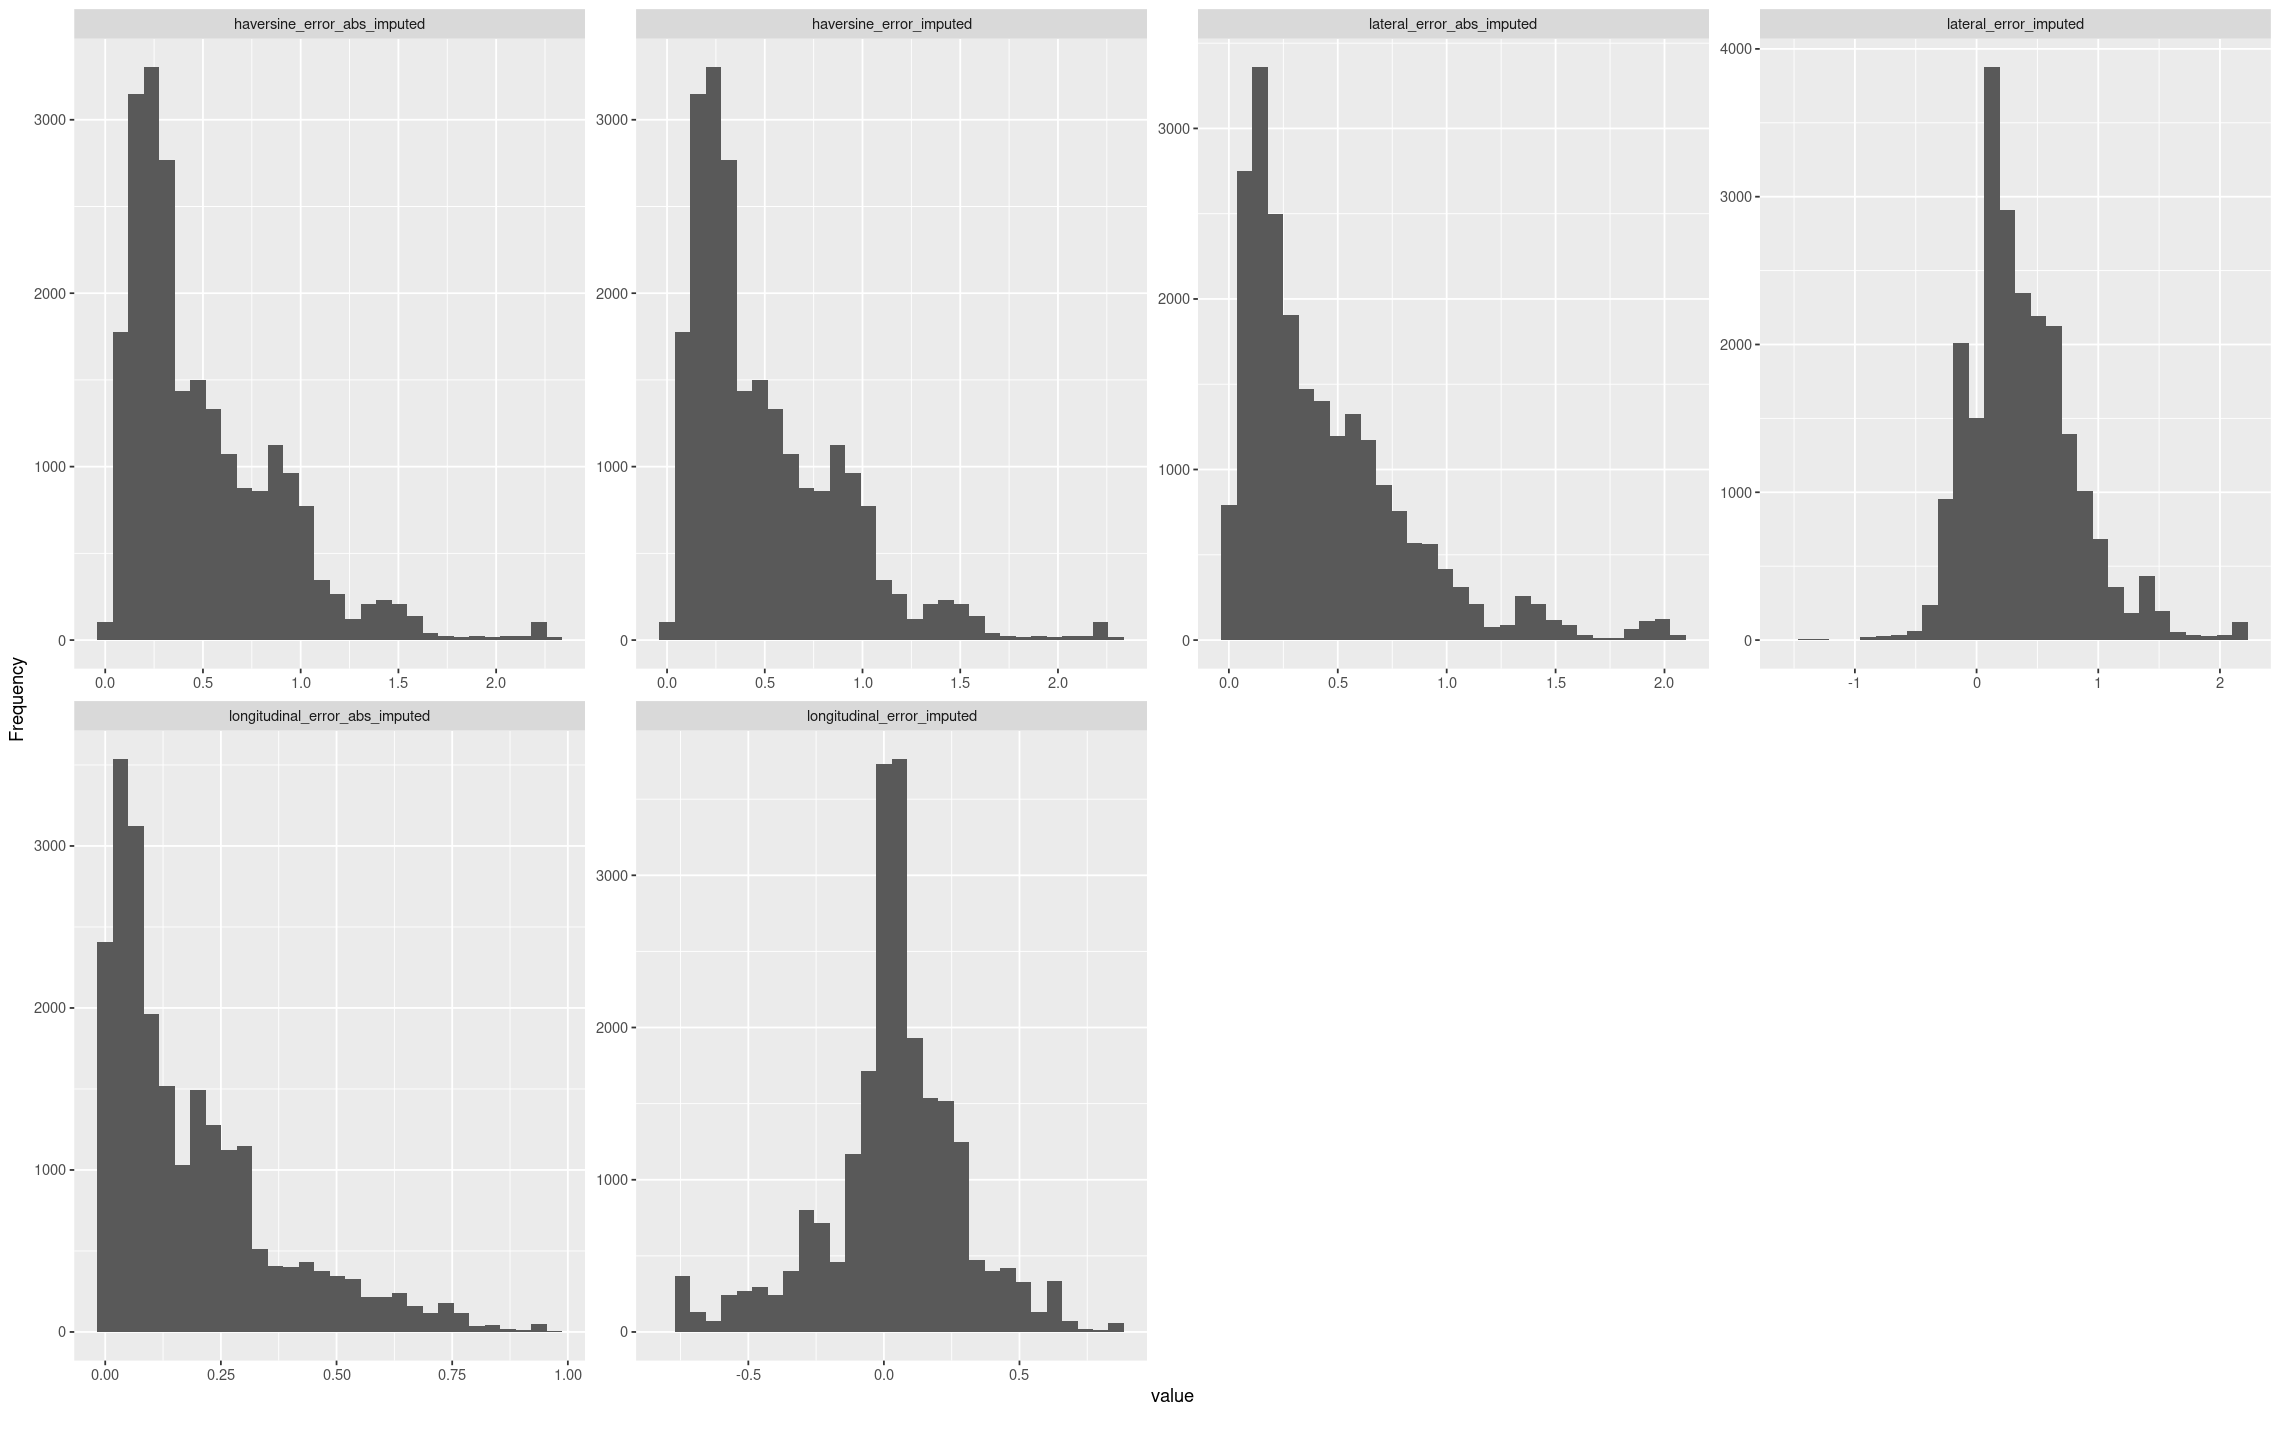

In [59]:
data_bis <- data %>% select(c(lateral_error_imputed, longitudinal_error_imputed, haversine_error_imputed,
                             lateral_error_abs_imputed, longitudinal_error_abs_imputed, haversine_error_abs_imputed))

plot_histogram(data_bis)

# Driving trajectory

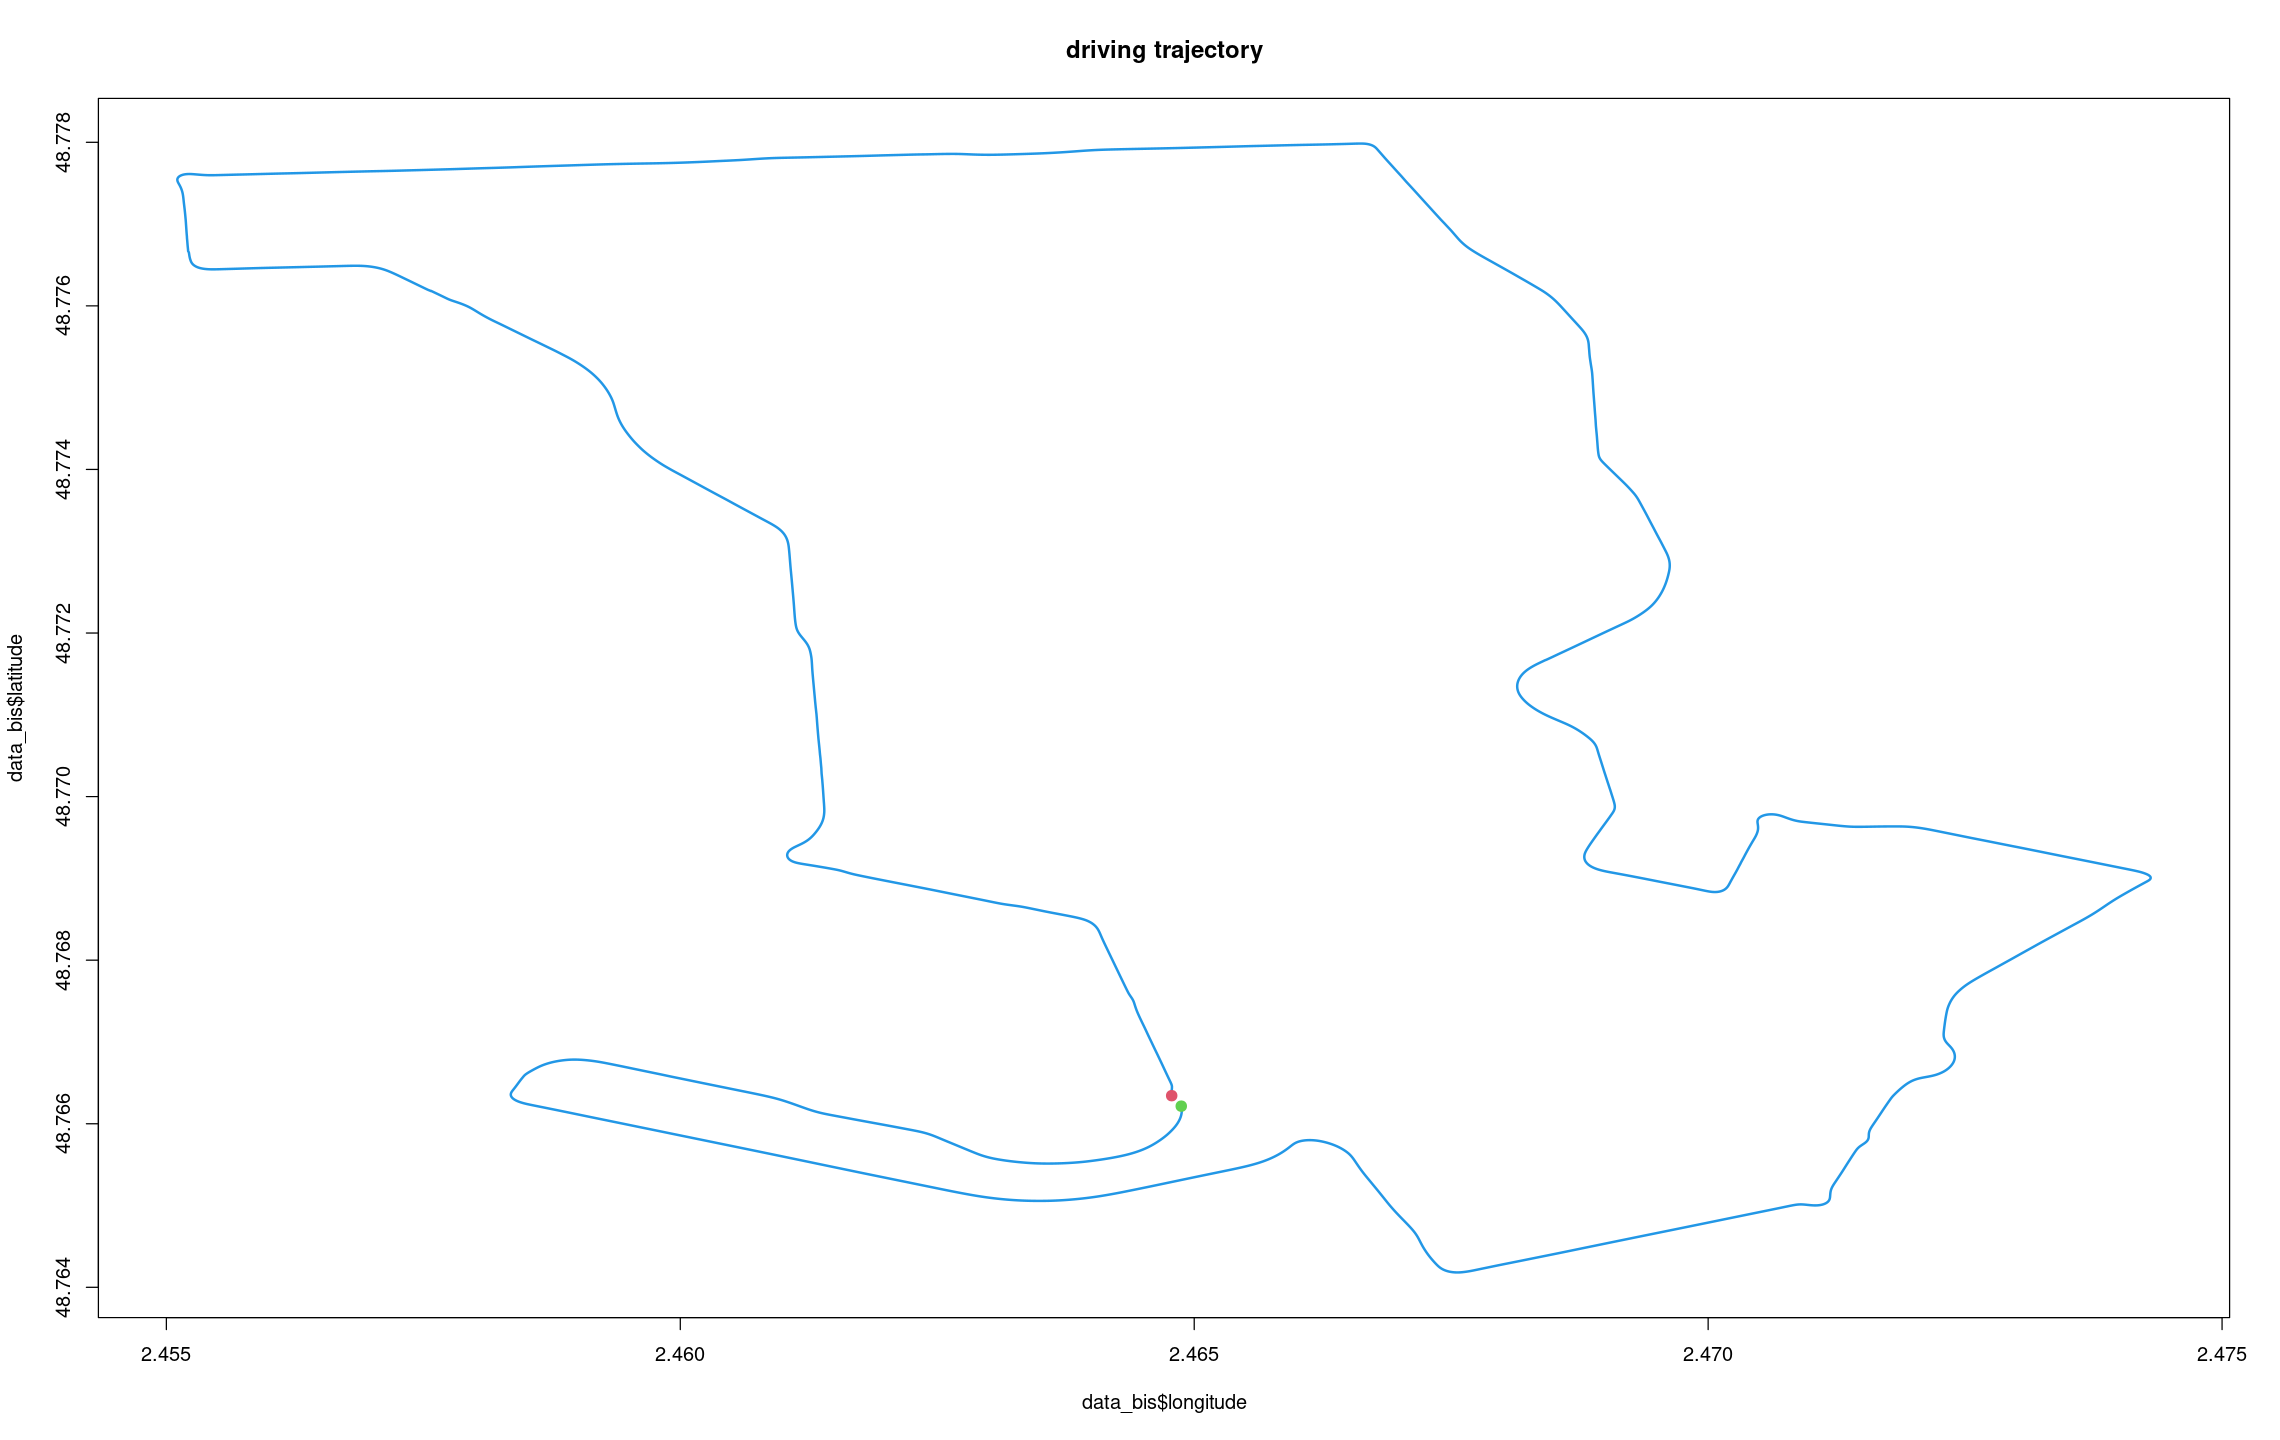

In [60]:
data_bis <- data %>% select(c(latitude, longitude))

plot(y = data_bis$latitude, 
     x = data_bis$longitude,
     main = "driving trajectory",
     type = "l",
     col = 4,
     lwd = 2)

points(y = data_bis$latitude[1],
       x = data_bis$longitude[1],
       pch = 19,
       col = 3,
       lwd = 2)

n <- nrow(data_bis)

points(y = data_bis$latitude[n],
       x = data_bis$longitude[n],
       pch = 19,
       col = 2,
       lwd = 2)

# Scatted plots

## Scatted plot by lateral_error_imputed

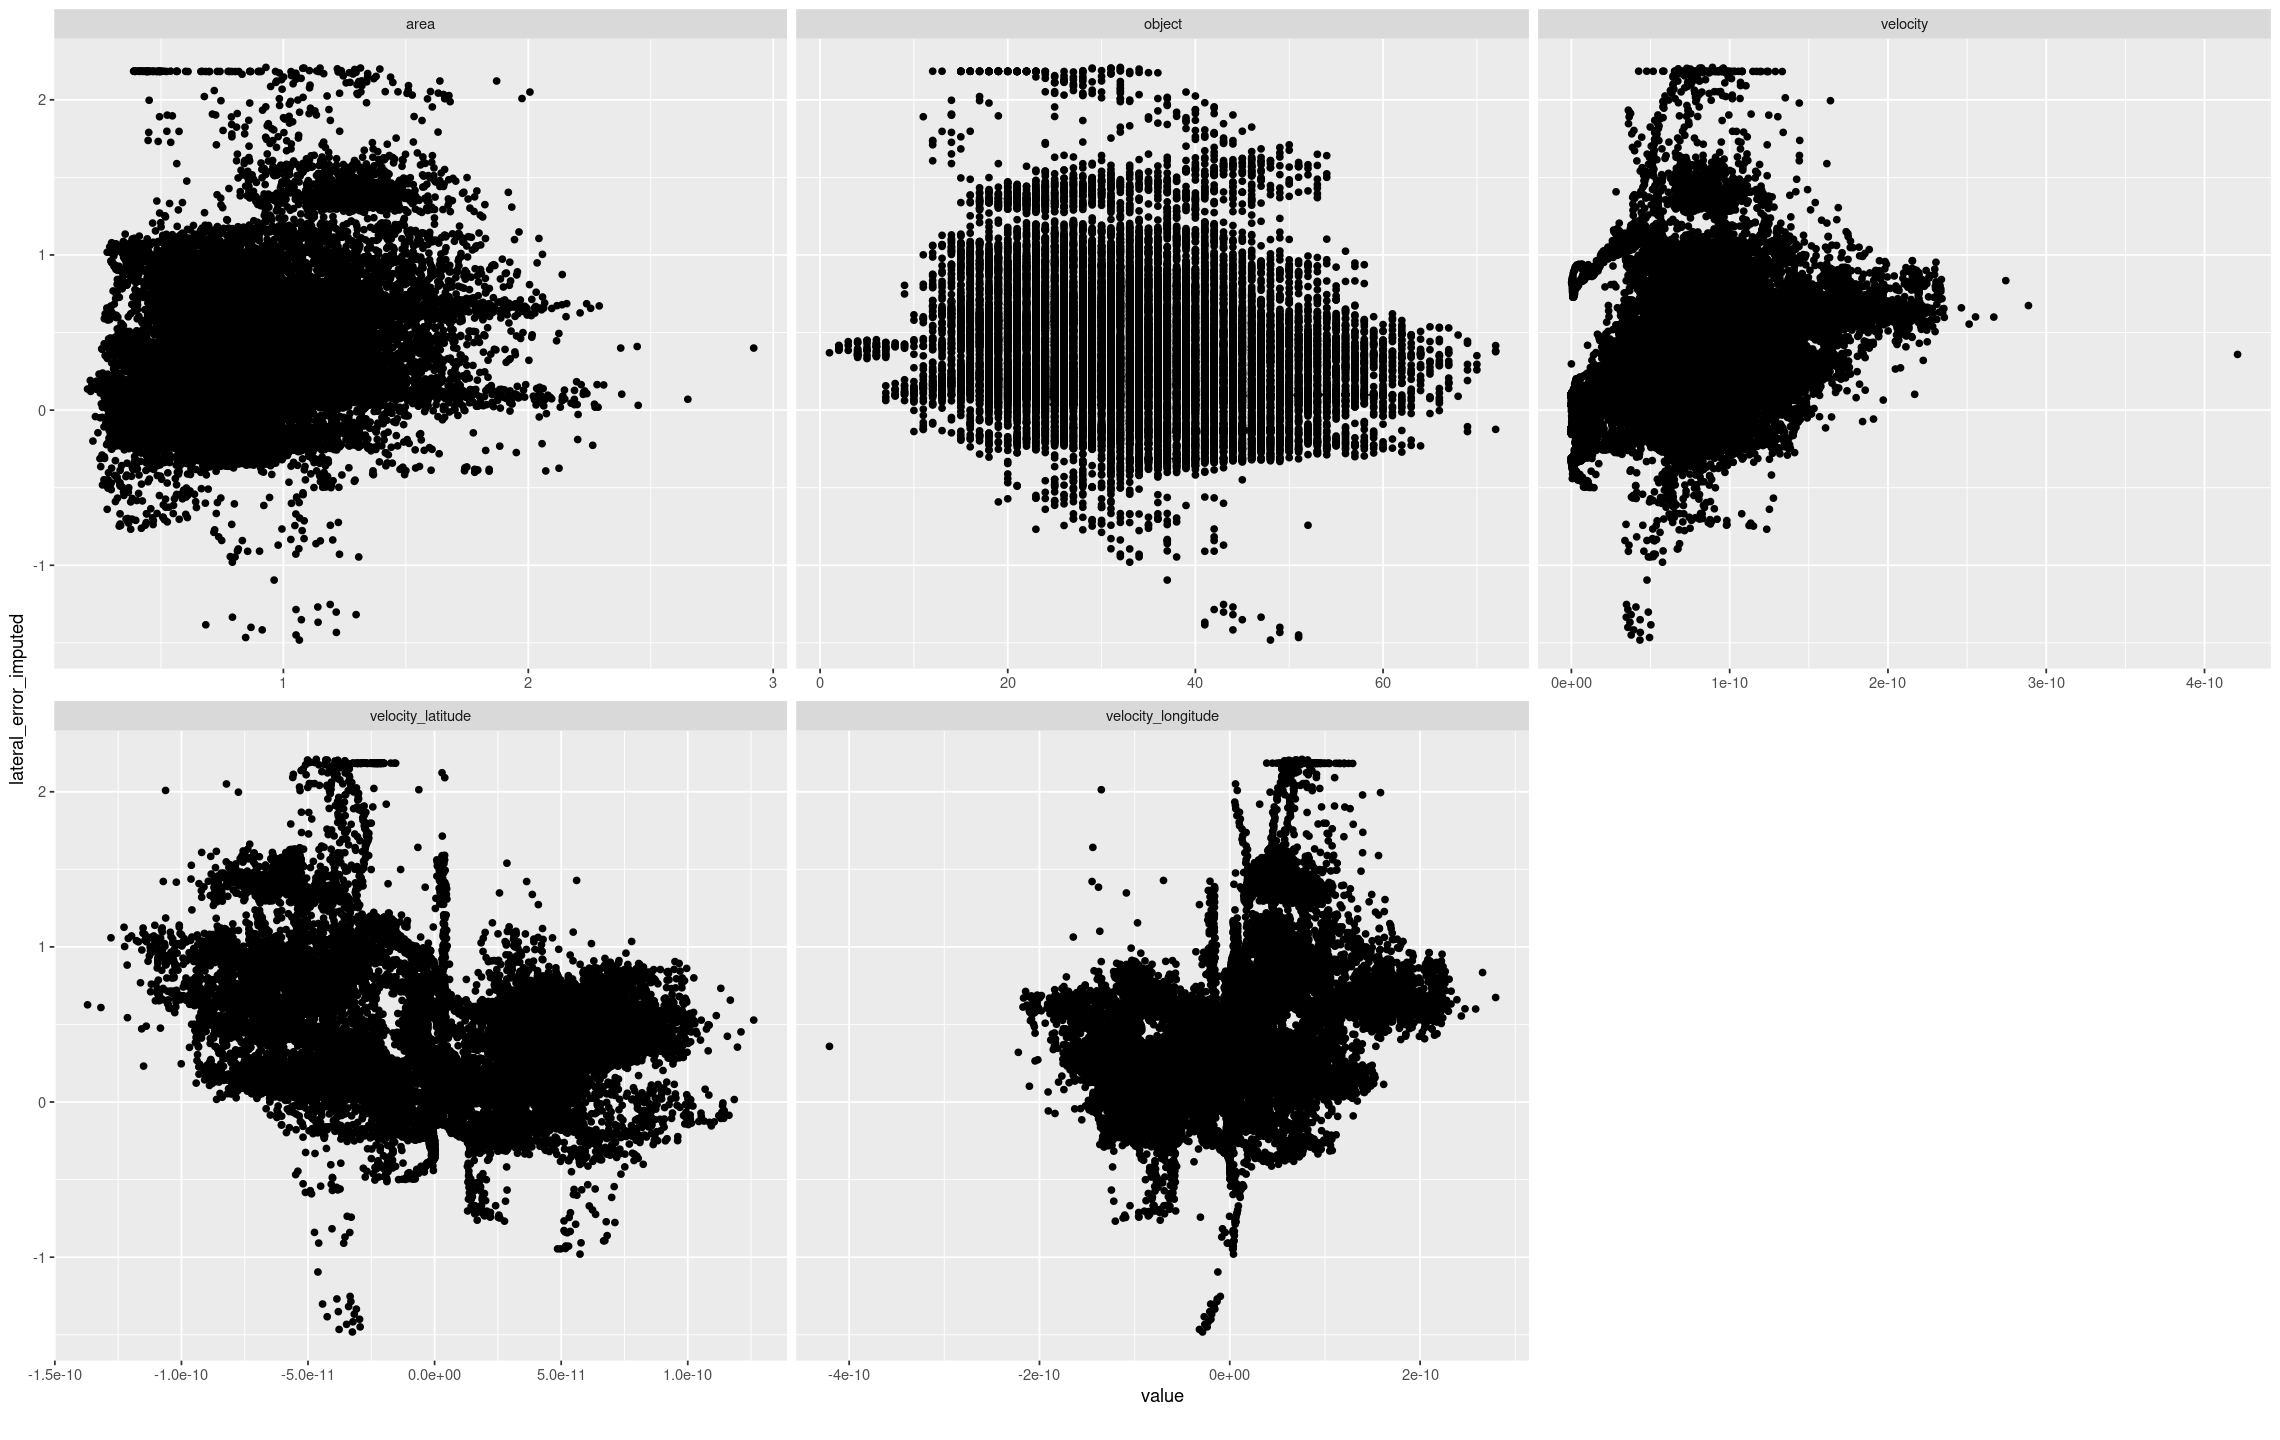

In [61]:
data_bis <- data %>% select(lateral_error_imputed, velocity_latitude, velocity_longitude, velocity, area, object)
plot_scatterplot(na.omit(data_bis), by="lateral_error_imputed")

## Scatted plot by longitudinal_error_imputed

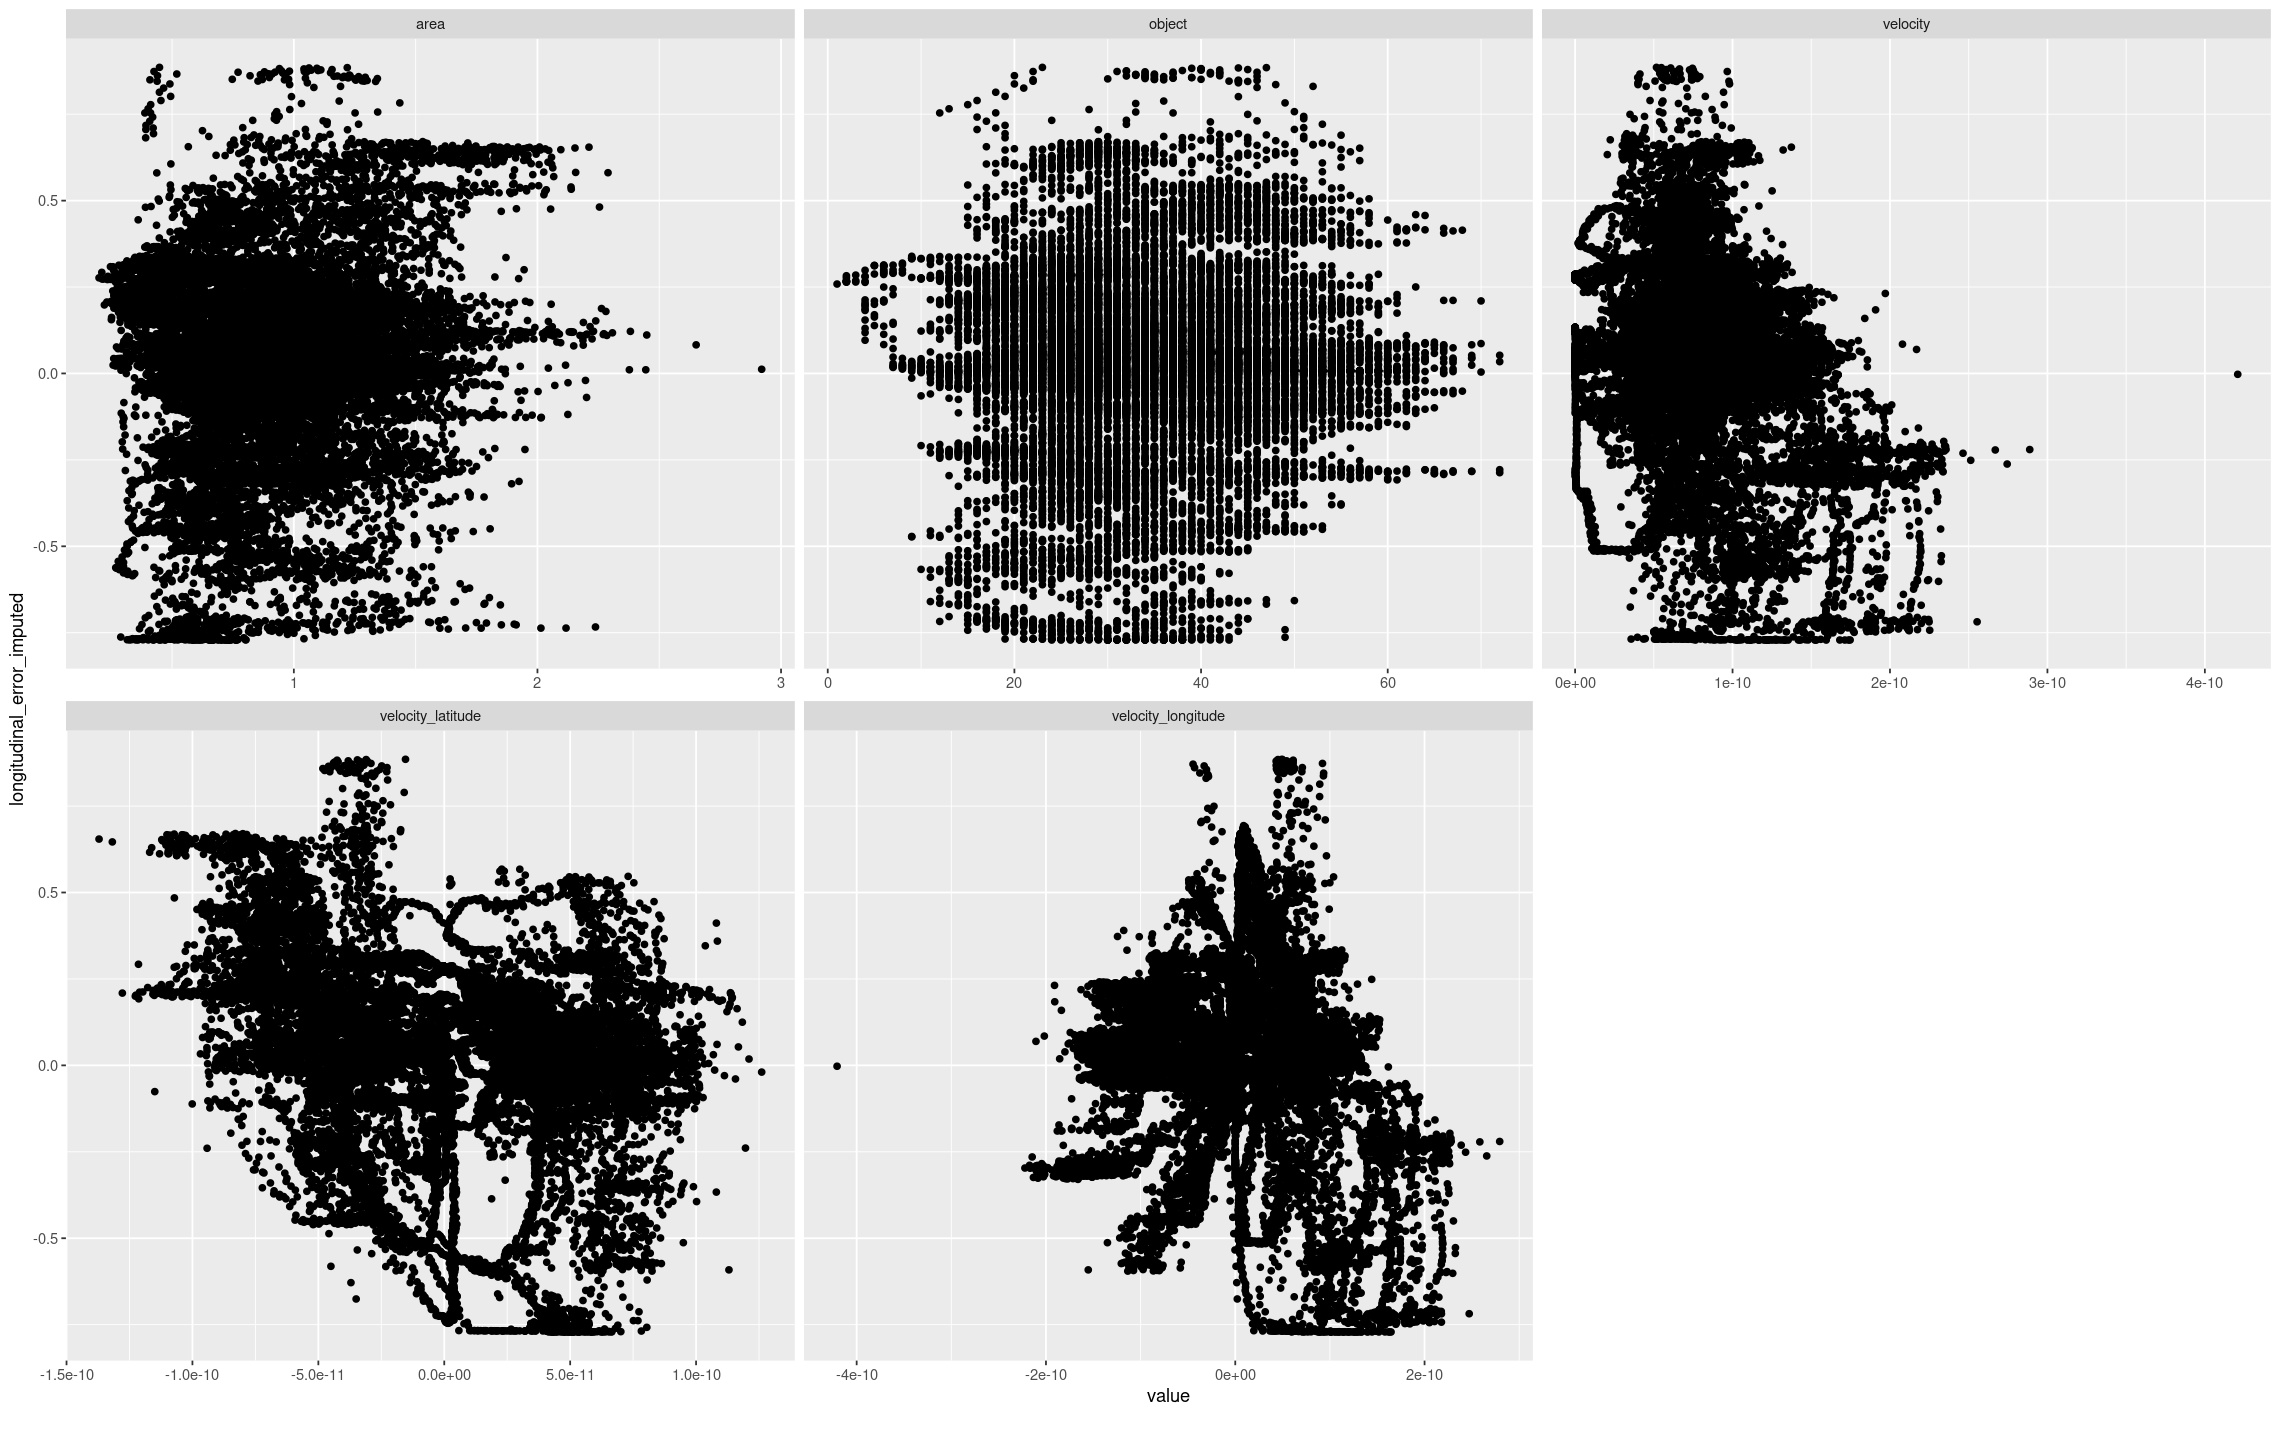

In [62]:
data_bis <- data %>% select(longitudinal_error_imputed, velocity_latitude, velocity_longitude, velocity, area, object)
plot_scatterplot(na.omit(data_bis), by="longitudinal_error_imputed")

## Scatted plot by haversine_error_imputed

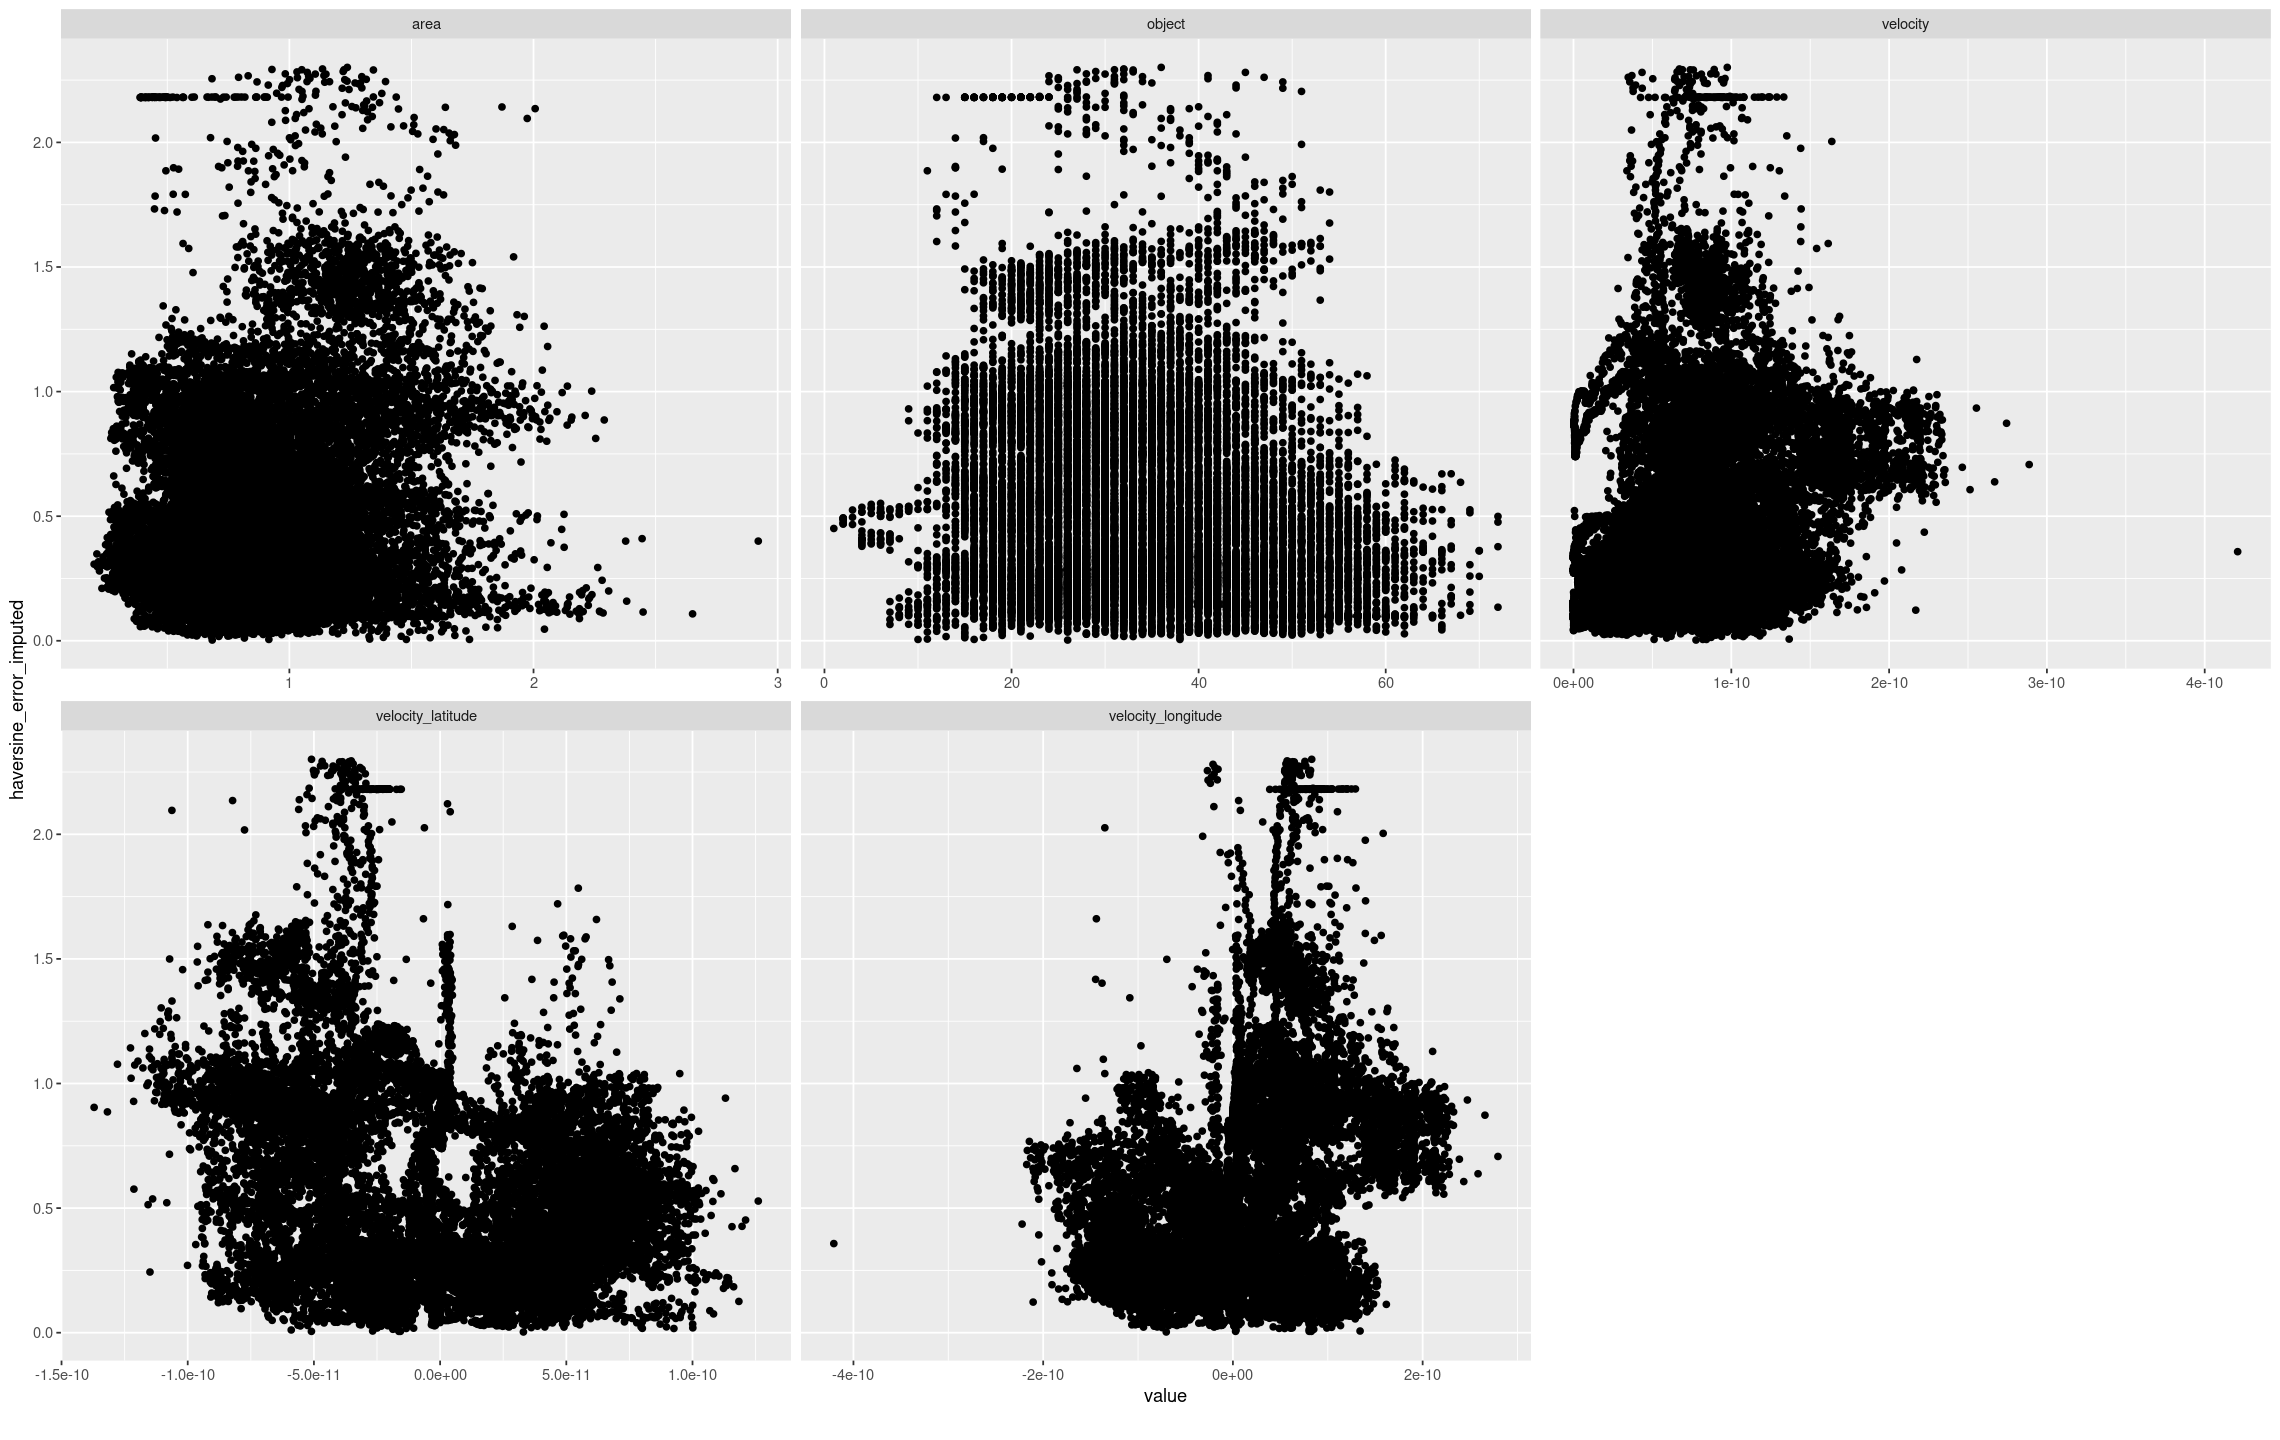

In [63]:
data_bis <- data %>% select(haversine_error_imputed, velocity_latitude, velocity_longitude, velocity, area, object)
plot_scatterplot(na.omit(data_bis), by="haversine_error_imputed")

# Conditional densities

## Conditional density of velocity

In [64]:
covariates_outliers <- data[outlier_positions, c("velocity_latitude", "velocity_longitude", "velocity", "area", "object")]
covariates_outliers <- na.omit(covariates_outliers)

covariates_all <- data %>% select(velocity_latitude, velocity_longitude, velocity, area, object)
covariates_all <- na.omit(covariates_all)

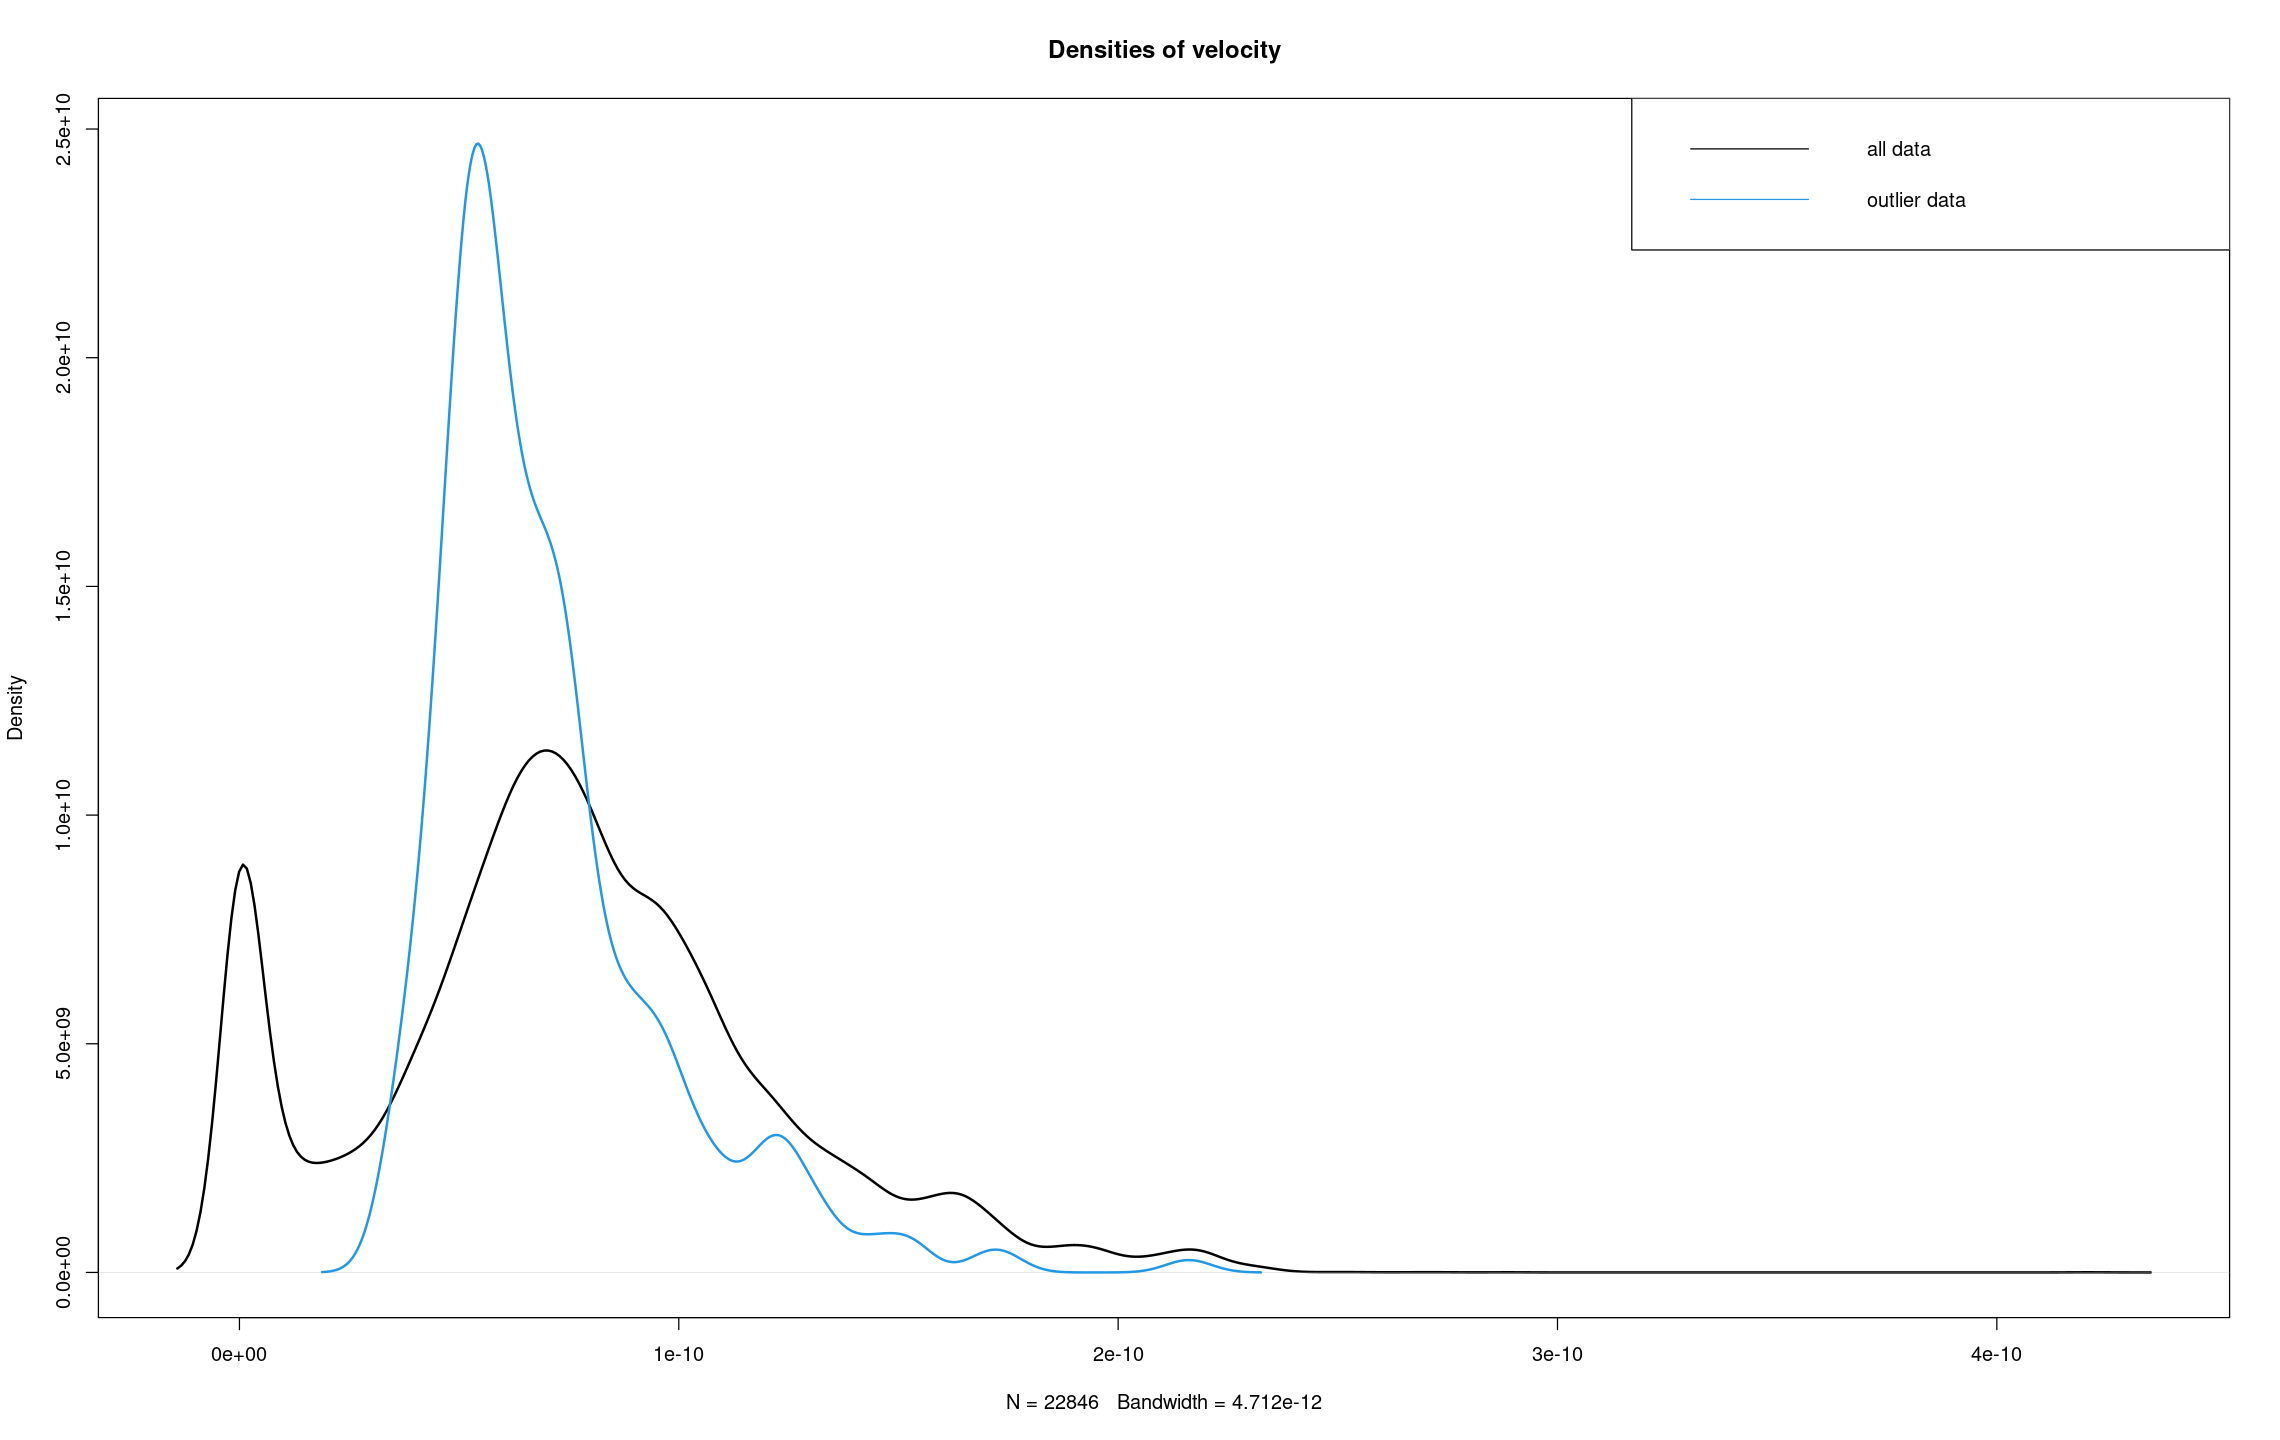

In [65]:
density_outliers <- density(covariates_outliers$velocity)
density_all <- density(covariates_all$velocity)

support <- c(density_outliers$x, density_all$x)
values <- c(density_outliers$y, density_all$y)

plot(density_all, col = 1, lwd = 2, main = "Densities of velocity", 
     xlim = range(support), ylim = range(values))
lines(density_outliers, col = 4, lwd = 2)

legend("topright", legend = c("all data", "outlier data"), 
       lty = 1:1, col = c(1, 4))

## Conditional density of velocity_latitude

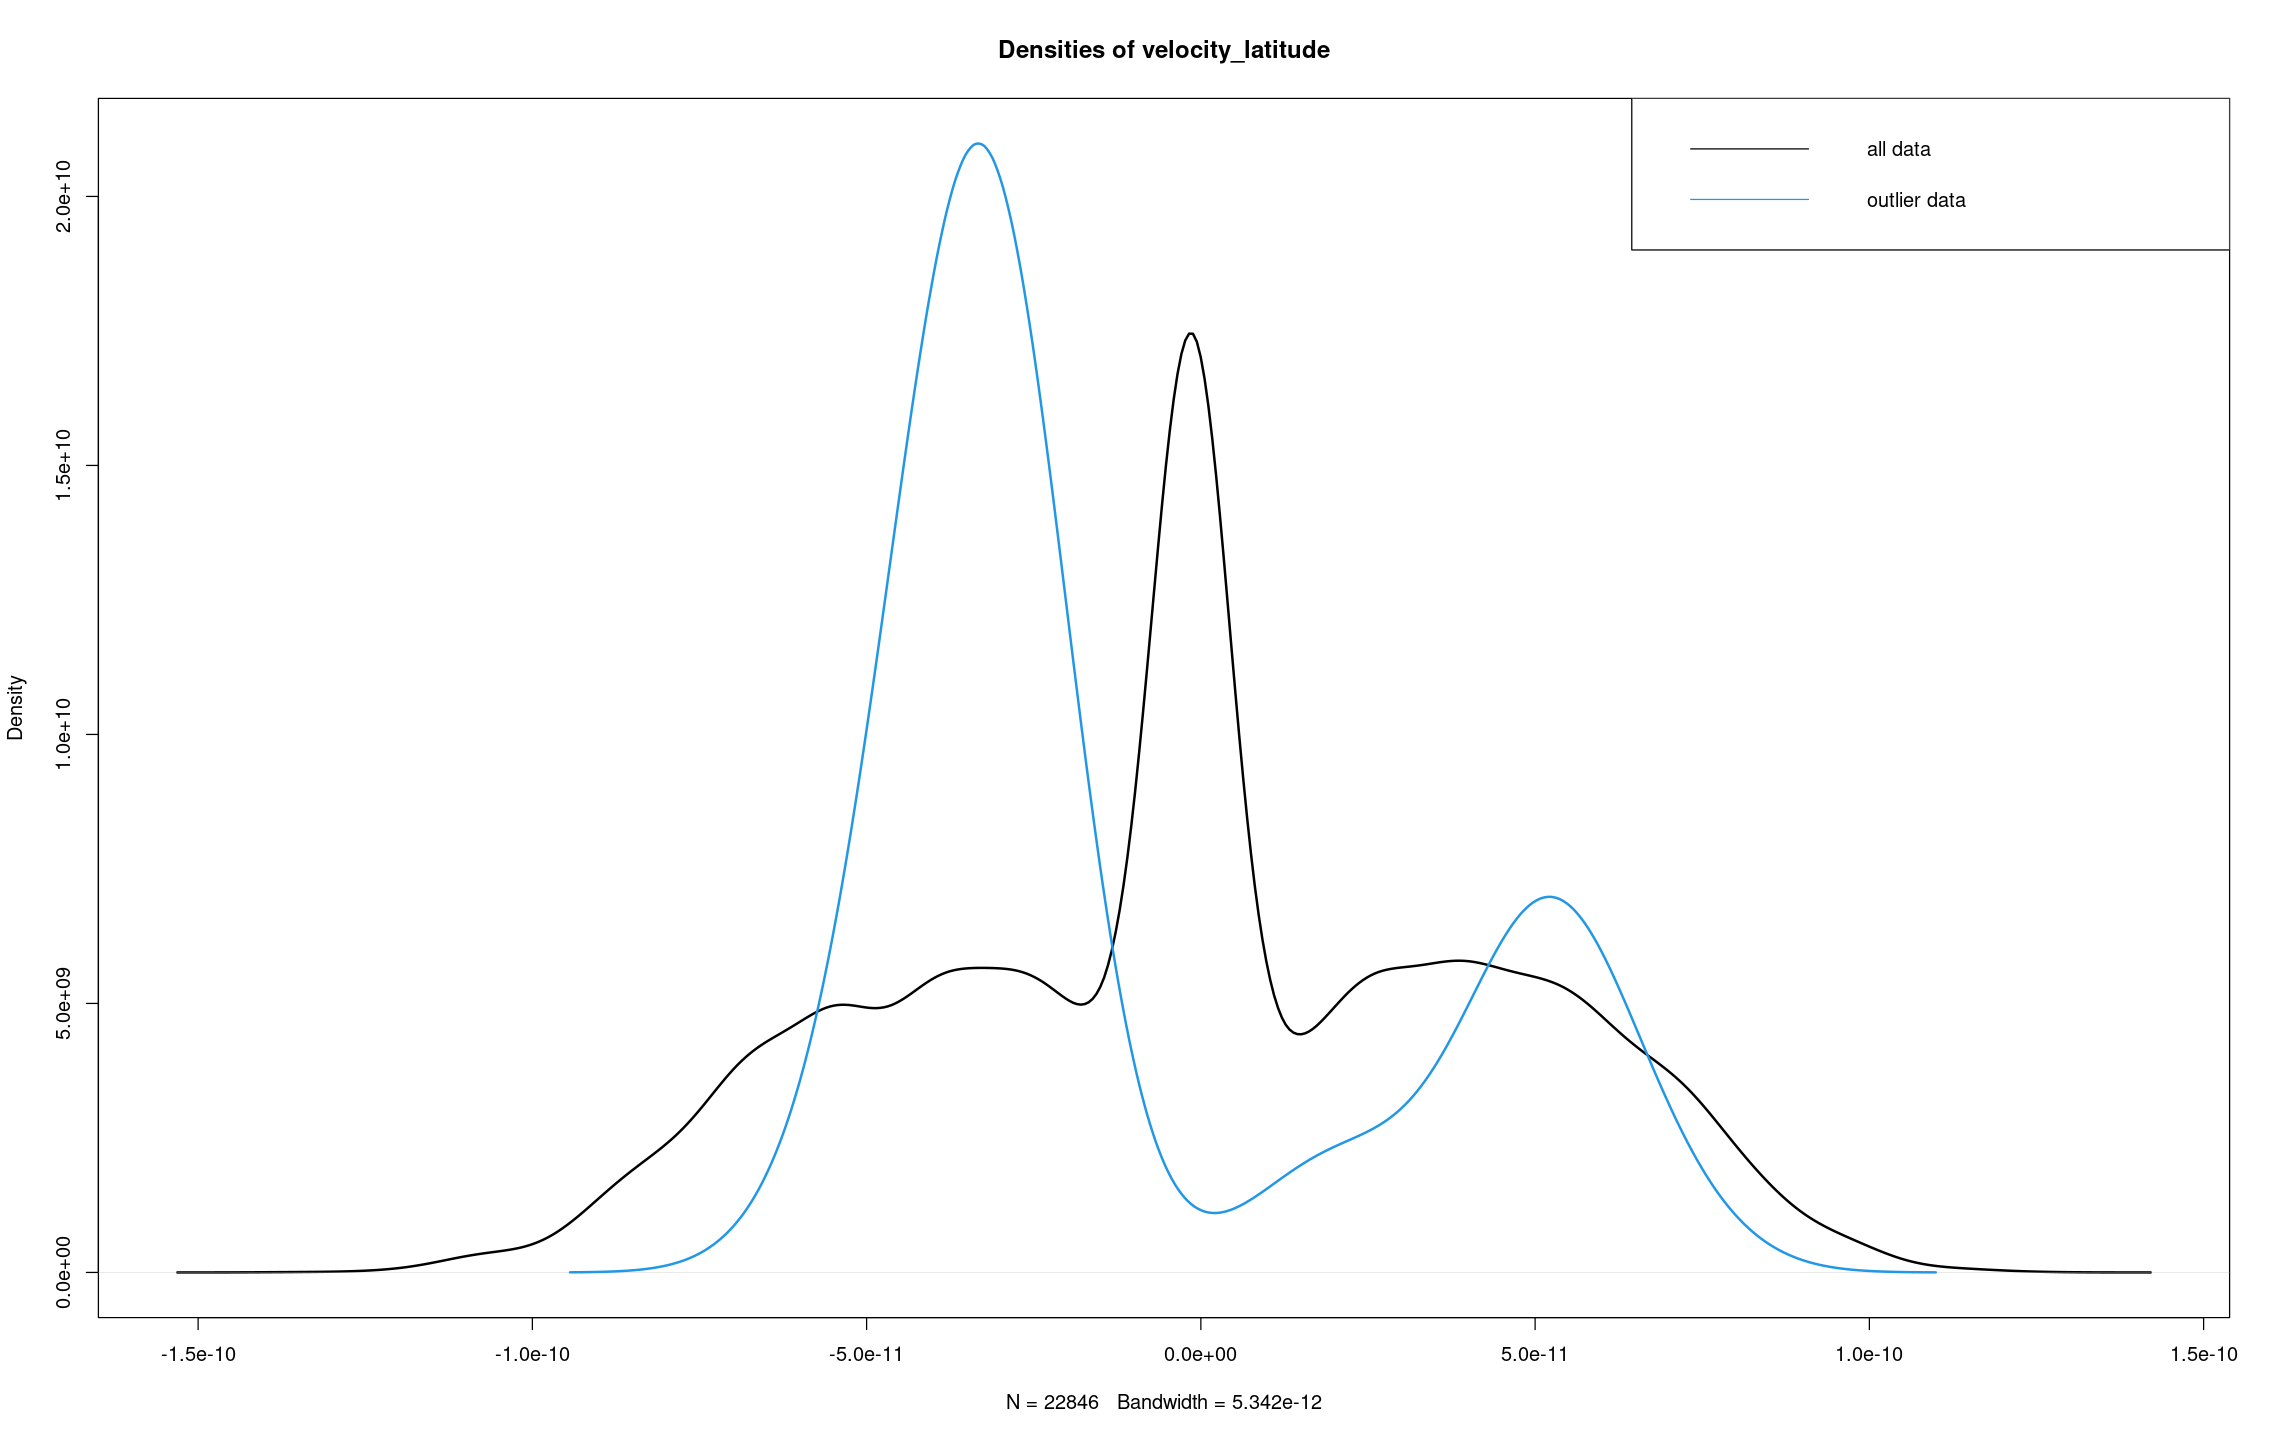

In [66]:
density_outliers <- density(covariates_outliers$velocity_latitude)
density_all <- density(covariates_all$velocity_latitude)

support <- c(density_outliers$x, density_all$x)
values <- c(density_outliers$y, density_all$y)

plot(density_all, col = 1, lwd = 2, main = "Densities of velocity_latitude", 
     xlim = range(support), ylim = range(values))
lines(density_outliers, col = 4, lwd = 2)

legend("topright", legend = c("all data", "outlier data"), 
       lty = 1:1, col = c(1, 4))

## Conditional density of velocity_longitude

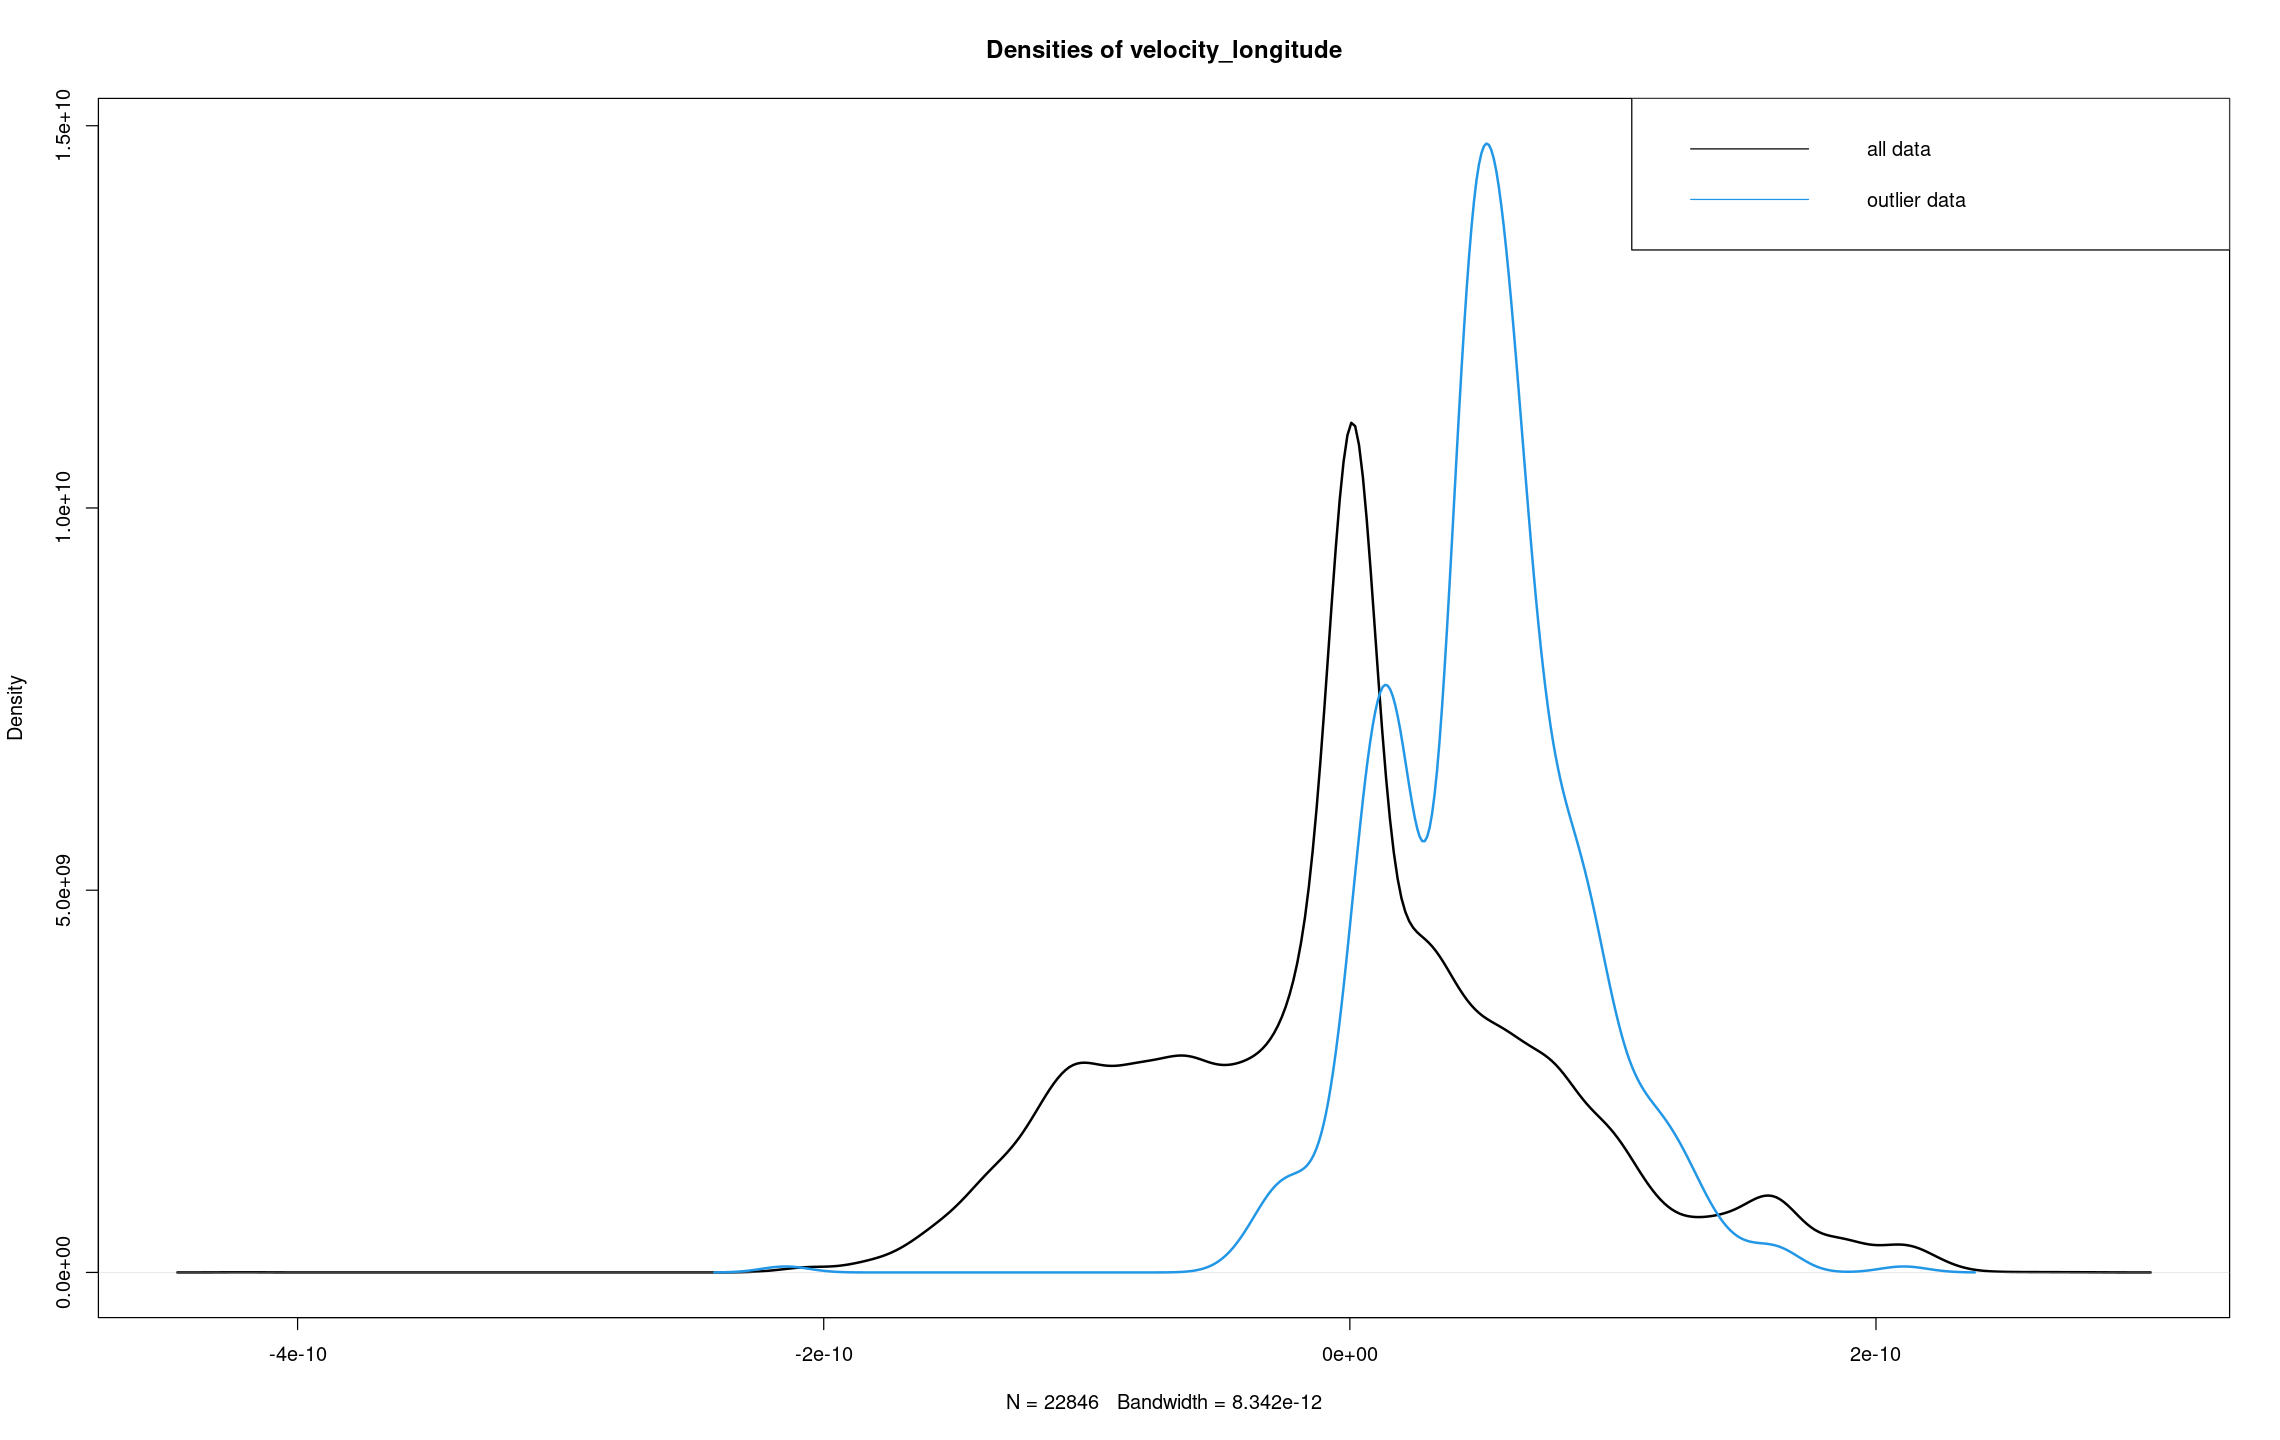

In [67]:
density_outliers <- density(covariates_outliers$velocity_longitude)
density_all <- density(covariates_all$velocity_longitude)

support <- c(density_outliers$x, density_all$x)
values <- c(density_outliers$y, density_all$y)

plot(density_all, col = 1, lwd = 2, main = "Densities of velocity_longitude", 
     xlim = range(support), ylim = range(values))
lines(density_outliers, col = 4, lwd = 2)

legend("topright", legend = c("all data", "outlier data"), 
       lty = 1:1, col = c(1, 4))

## Conditional density of area

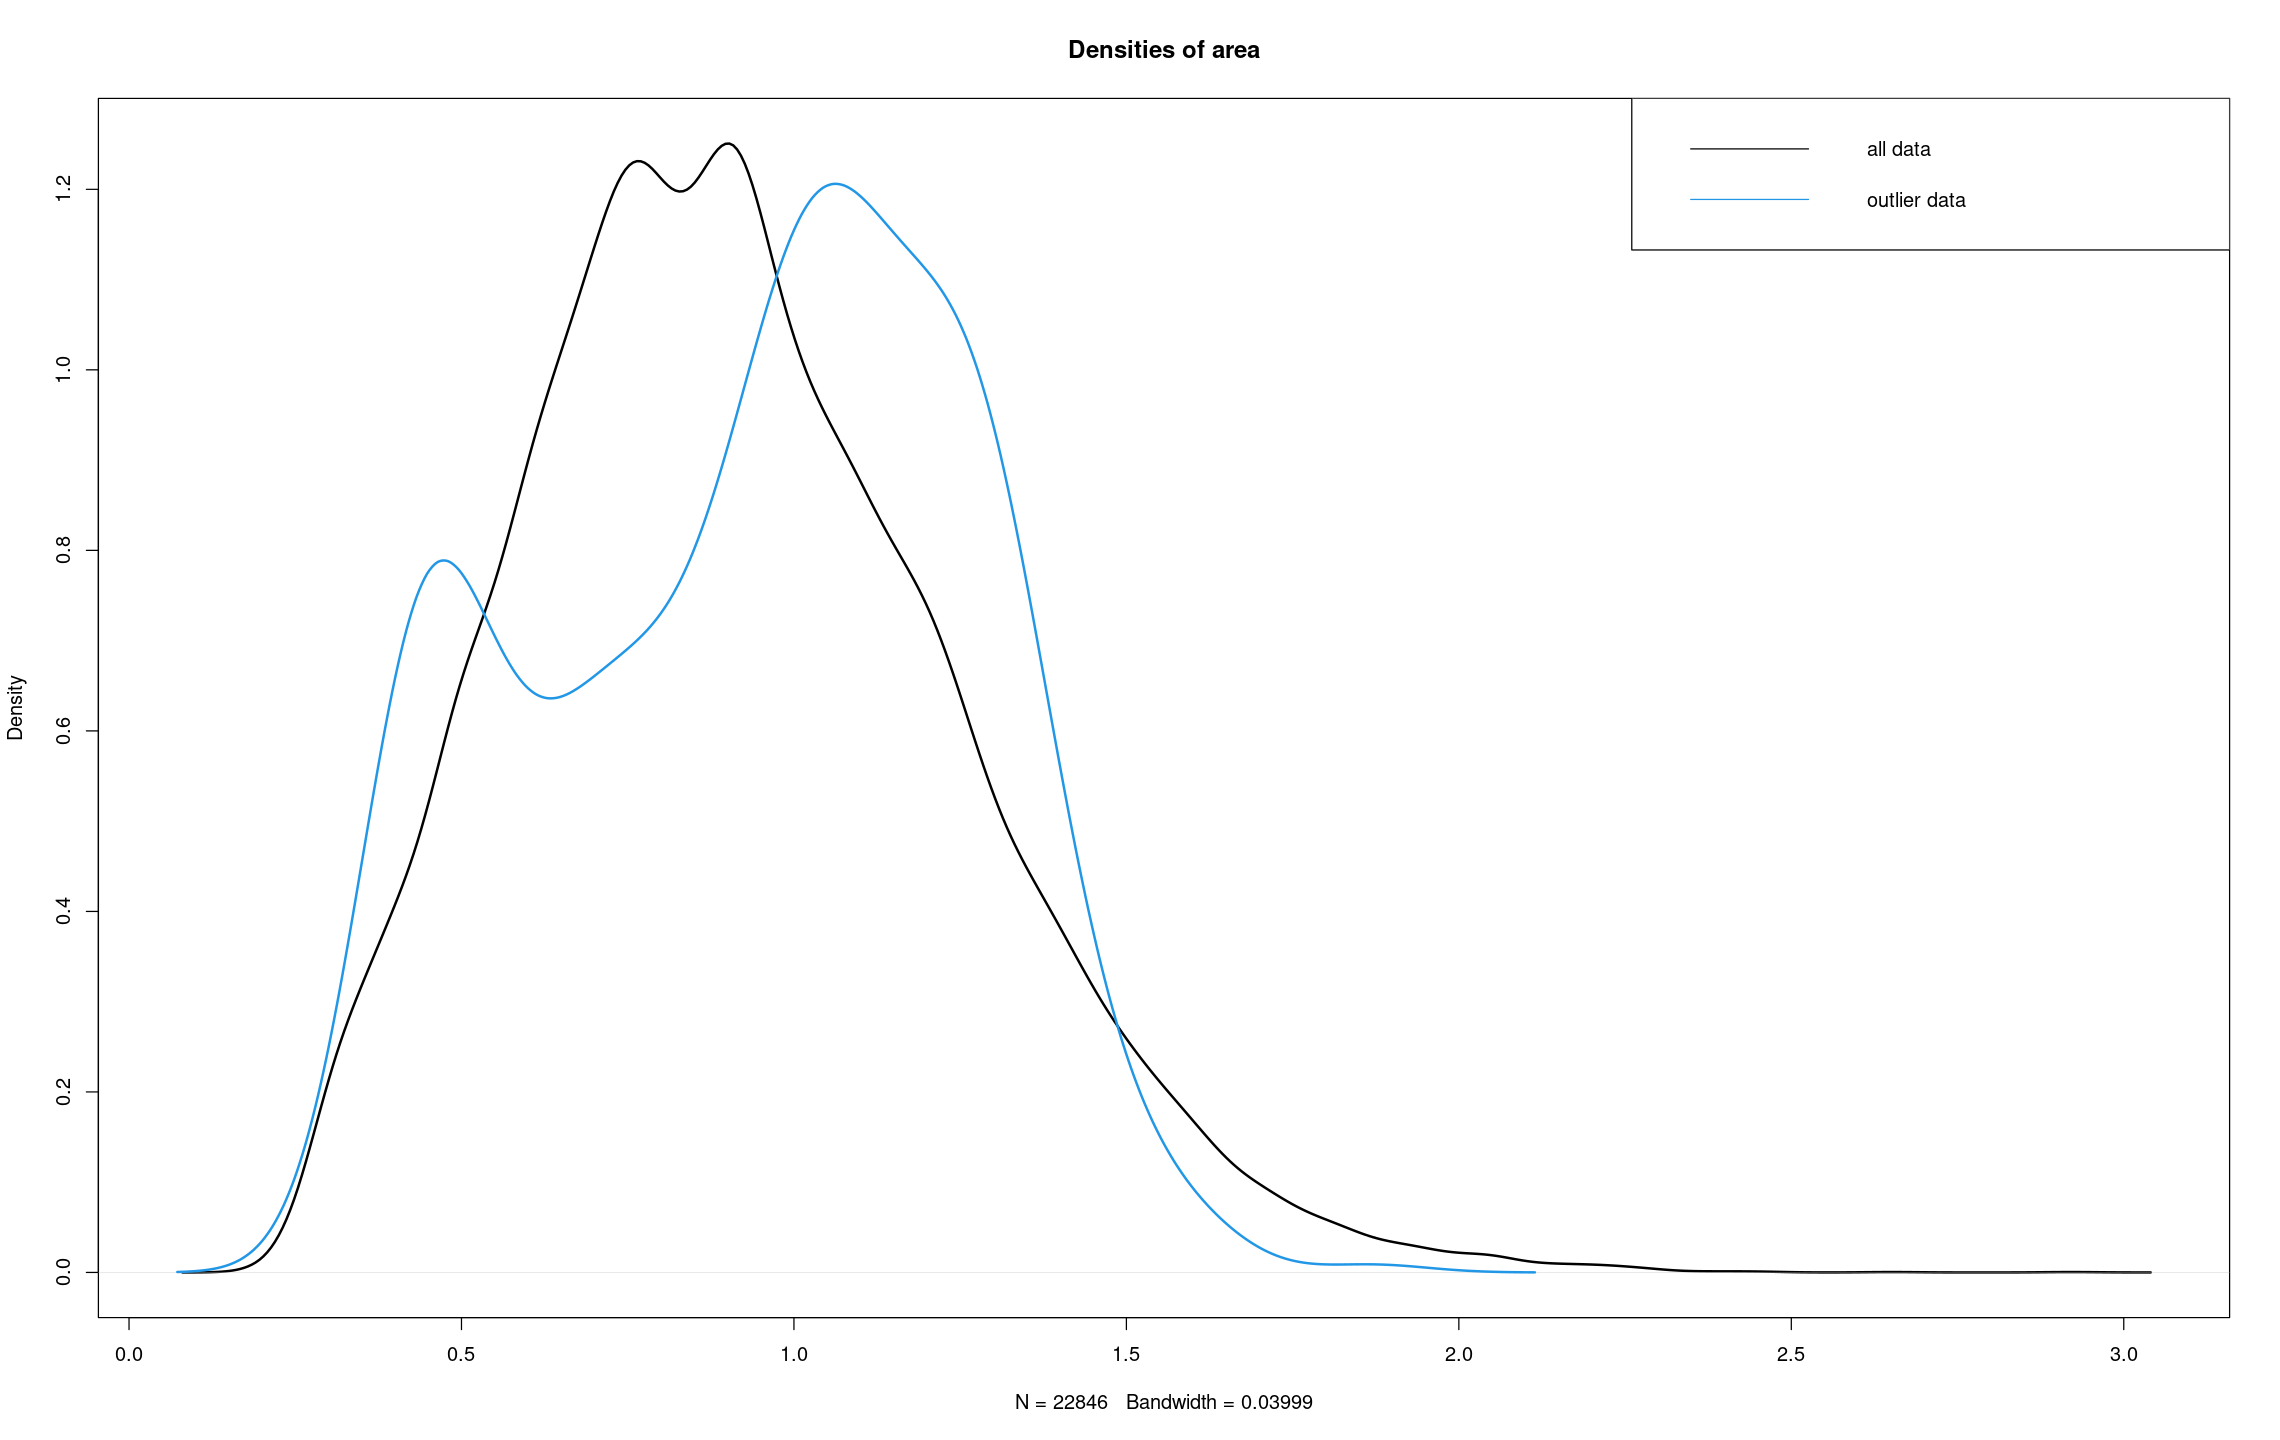

In [68]:
density_outliers <- density(covariates_outliers$area)
density_all <- density(covariates_all$area)

support <- c(density_outliers$x, density_all$x)
values <- c(density_outliers$y, density_all$y)

plot(density_all, col = 1, lwd = 2, main = "Densities of area", 
     xlim = range(support), ylim = range(values))
lines(density_outliers, col = 4, lwd = 2)

legend("topright", legend = c("all data", "outlier data"), 
       lty = 1:1, col = c(1, 4))

## Conditional density of object

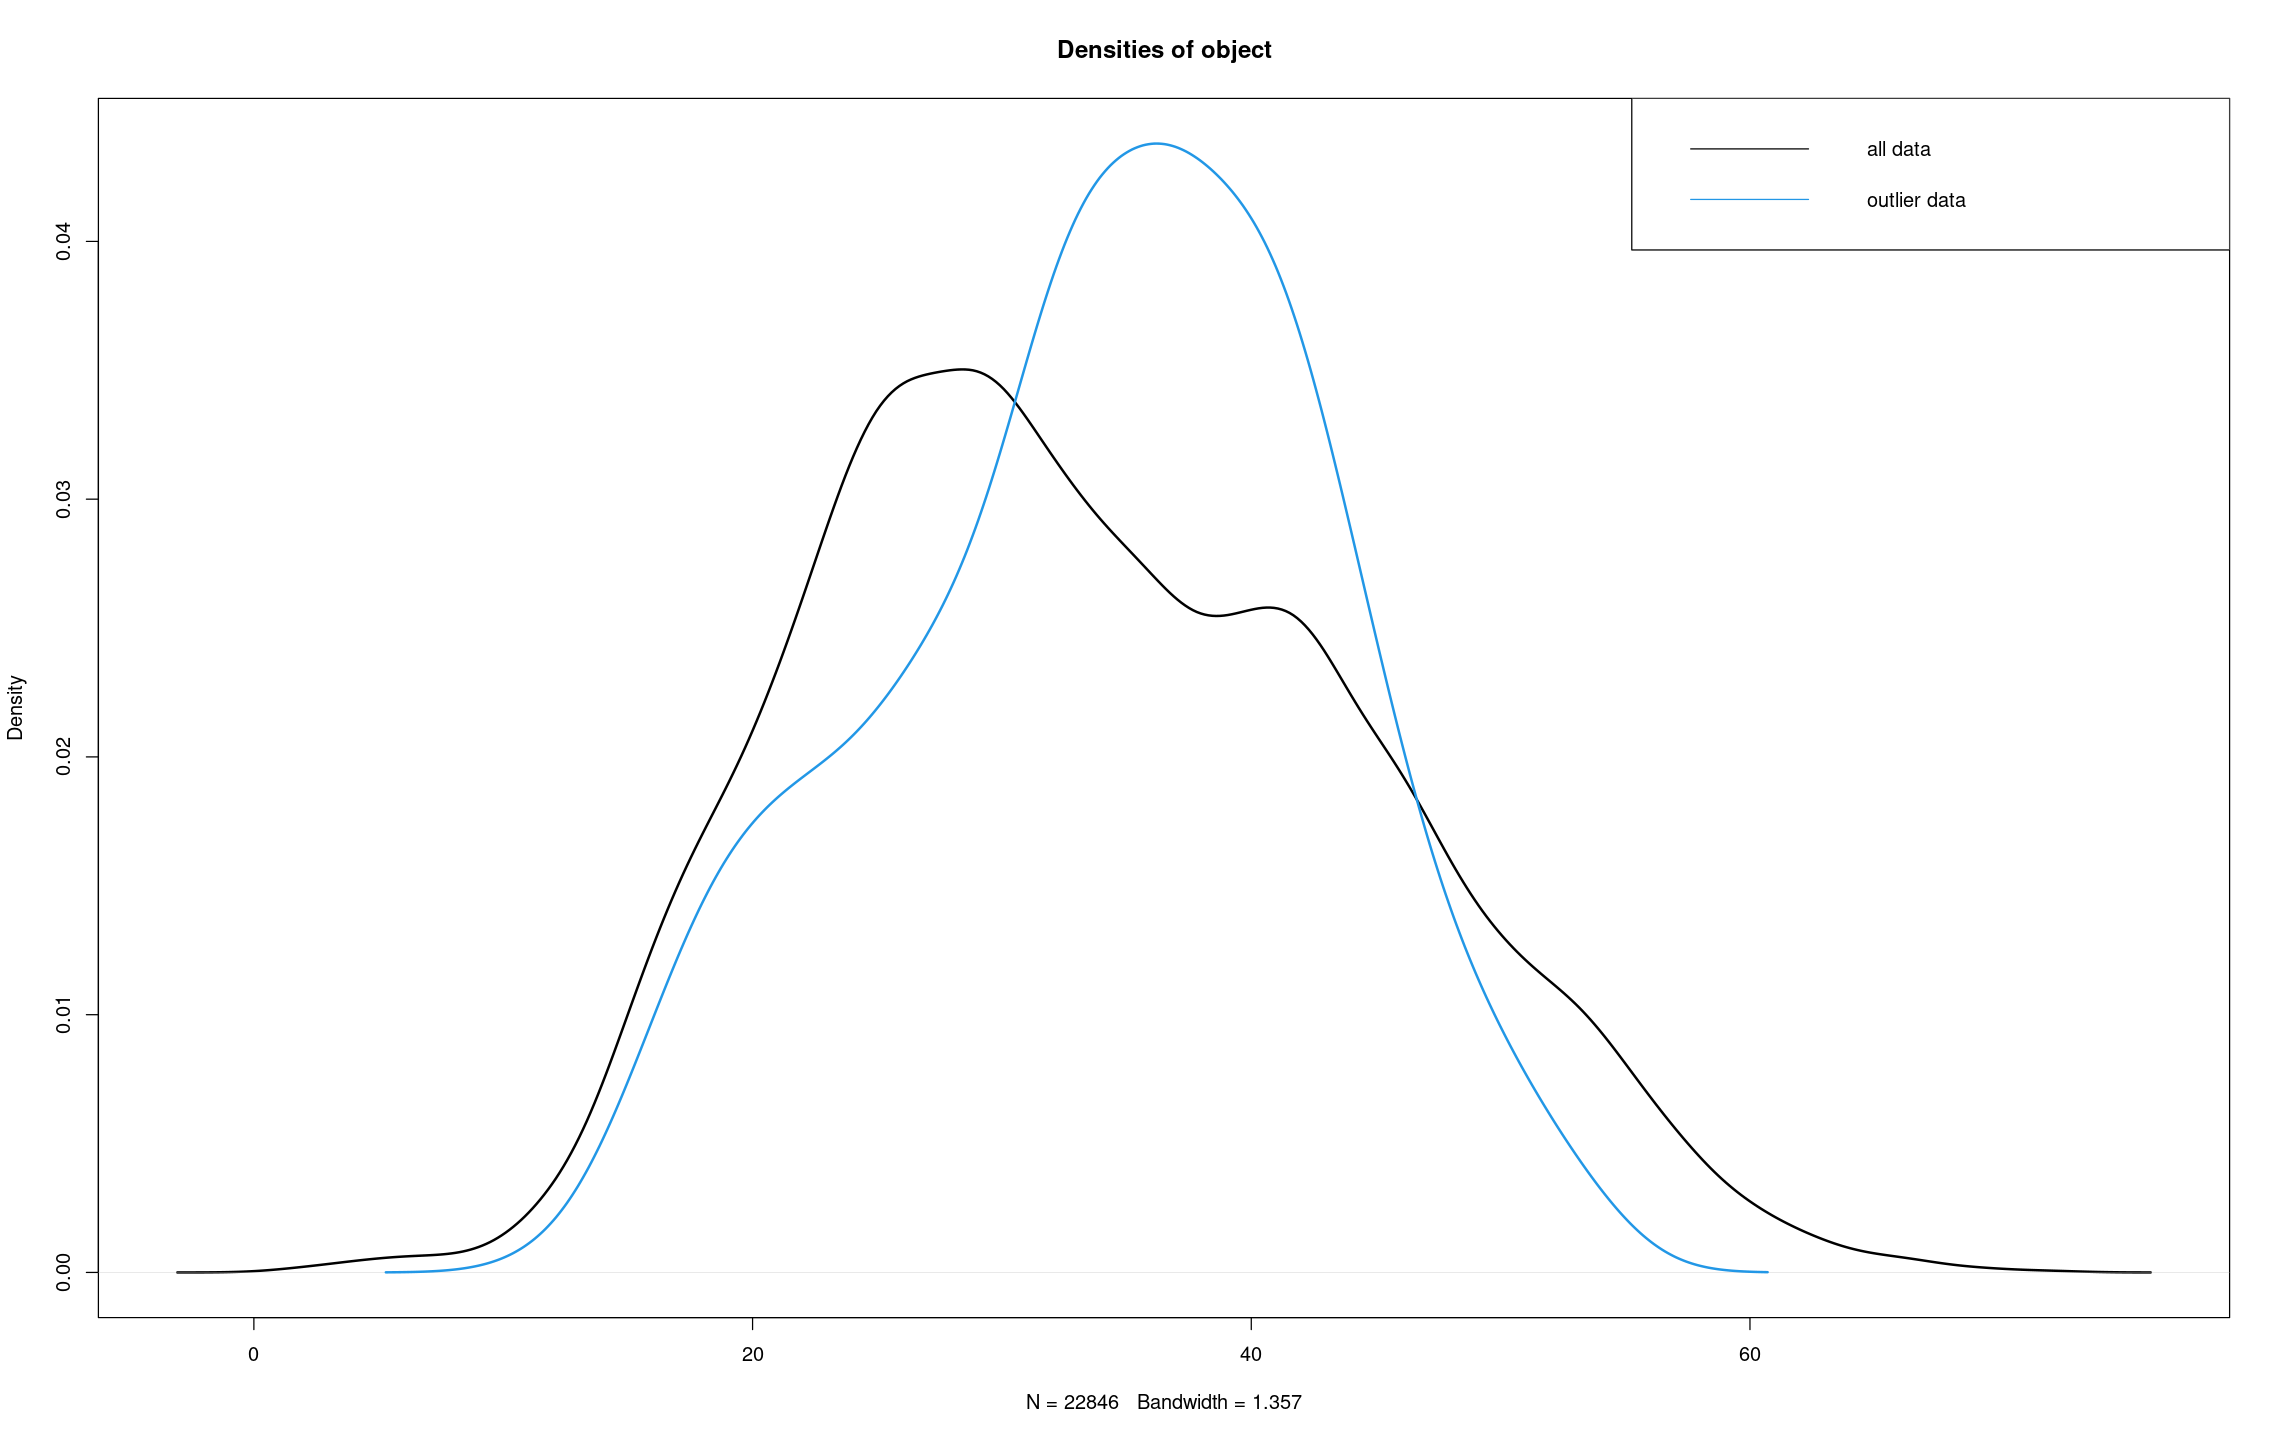

In [69]:
density_outliers <- density(covariates_outliers$object)
density_all <- density(covariates_all$object)

support <- c(density_outliers$x, density_all$x)
values <- c(density_outliers$y, density_all$y)

plot(density_all, col = 1, lwd = 2, main = "Densities of object", 
     xlim = range(support), ylim = range(values))
lines(density_outliers, col = 4, lwd = 2)

legend("topright", legend = c("all data", "outlier data"), 
       lty = 1:1, col = c(1, 4))